# **Internship on Data Science and Analytics| Project 2** -Week 4

# **Customer Segmentation for Marketing Strategy**

**Objective: Aim to predict with precision whether bank customers will subscribe to term deposits after the marketing campaigns**

**Provide actionable insights to help the bank make informed decisions and reinvigorate its revenue streams**

**Problem: To help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?**

In [1]:
# Read the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import yeojohnson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Dataset contains details of marketing campaigns done via phone with various
details for customers such as demographics, last campaign details etc.

We are provided with train and test dataset.

In [2]:
# read both train and test dataset to the environment
dtrain=pd.read_csv('/content/Train.csv')
dtest=pd.read_csv('/content/Test.csv')

Display the data in both train and test dataset

In [3]:
# to display top 5 rows of train dataset
dtrain.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [4]:
dtrain.shape

(31647, 18)

In [5]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

The Train dataset has 31647 rows and 18 columns. There are 10 features of object datatype, 3 features of integer and 5 features of float datatype.

Target Variable ( dependent feature ) - Term Deposit Subscribed

In [6]:
# to display the first 5 rows of test dataset
dtest.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                               NaN                           0   
2                               NaN                           0   
3                               NaN                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [7]:
dtest.shape

(13564, 17)

In [8]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

The Test dataset has 13564 rows, 17 columns with 10 object datatype features, 2 integer datatype features and 5 features of float datatype

In [9]:
# to check for any duplicates in train set
dtrain.duplicated().sum()

0

In [10]:
# to check for any duplicates in test set
dtest.duplicated().sum()

0

There are no duplicates in train and test dataset

In [11]:
# to check for unique values in train data
dtrain.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [12]:
# to check for unique values in Test dataset
dtest.nunique()

id                                  13564
customer_age                           73
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              4414
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1186
num_contacts_in_campaign               38
days_since_prev_campaign_contact      417
num_contacts_prev_campaign             30
prev_campaign_outcome                   4
dtype: int64

'id' is the only feature with all unique values. The 'id' column can either be dropped or set as index. Before that, will check for any common values in 'id' for both datasets

To check if there is any matching 'id' in both columns.

In [13]:
if dtrain['id'].equals(dtest['id']):
    print('same')
else:
    print('not same')

not same


there are no matching 'id' in train and test hence will drop the id column

In [14]:
dtrain.drop('id',axis=1,inplace=True)
dtest.drop('id',axis=1,inplace=True)

Statistical Summary

In [15]:
dtrain.describe().T

count         mean          std     min  \
customer_age                      31028.0    40.439216    10.751392    18.0   
balance                           31248.0  1368.112615  3085.342417 -8020.0   
day_of_month                      31647.0    15.818561     8.322970     1.0   
last_contact_duration             31336.0   256.184038   256.181479     0.0   
num_contacts_in_campaign          31535.0     2.776629     3.153293     1.0   
days_since_prev_campaign_contact   5816.0   224.995186   114.991828     1.0   
num_contacts_prev_campaign        31647.0     0.591620     2.499675     0.0   
term_deposit_subscribed           31647.0     0.107246     0.309430     0.0   

                                    25%    50%      75%       max  
customer_age                       32.0   39.0    48.00      97.0  
balance                            72.0  449.0  1413.00  102128.0  
day_of_month                        8.0   16.0    21.00      31.0  
last_contact_duration             103.0  179.0   315.25    4900.0  
num_contacts_in_campaign            1.0    2.0     3.00      63.0  
days_since_prev_campaign_contact  133.0  195.0   329.00     871.0  
num_contacts_prev_campaign          0.0    0.0     0.00     275.0  
term_deposit_subscribed             0.0    0.0     0.00       1.0

Standard deviation is high for **balance**

1. Customer Age ranges from 18 years to 97 years
2. Balance from -8020 to 102128
3. Day of the month from 1st to 31st of the month
4. Last contact duration 0 secs to 4900 secs ie.1.36 hours
5. Number of contacts in campaign ranging from 1 contact to 63 contacts made during the campaign.
6. Days since previous campaign contact ranging from 1 day to 871 days since last contact ie.28 months (2.3years).
7. Number of contacts in previous campaign from 0 to 275 contacts made.
8. Term Deposit subscribed is 0 and 1. ( 0 for not subscribed and 1 for subscribed)



In [16]:
# summary for object datatype
dtrain.describe(include='object')

job_type  marital  education default housing_loan personal_loan  \
count         31647    31497      31647   31647        31647         31498   
unique           12        3          4       2            2             2   
top     blue-collar  married  secondary      no          yes            no   
freq           6816    18945      16247   31094        17700         26463   

       communication_type  month prev_campaign_outcome  
count               31647  31647                 31647  
unique                  3     12                     4  
top              cellular    may               unknown  
freq                20480   9685                 25833

High frequency of unknown outcomes from previous campaign.

In [17]:
dtest.describe().T

count         mean          std     min  \
customer_age                      13294.0    40.450429    10.747881    18.0   
balance                           13383.0  1341.405514  2839.670990 -6849.0   
day_of_month                      13564.0    15.778089     8.321562     1.0   
last_contact_duration             13442.0   261.171031   261.195560     0.0   
num_contacts_in_campaign          13519.0     2.730971     2.941338     1.0   
days_since_prev_campaign_contact   2441.0   223.582958   116.196526     1.0   
num_contacts_prev_campaign        13564.0     0.553966     1.762402     0.0   

                                    25%    50%     75%      max  
customer_age                       32.0   39.0    48.0     94.0  
balance                            70.5  447.0  1466.0  71187.0  
day_of_month                        8.0   16.0    21.0     31.0  
last_contact_duration             102.0  182.0   325.0   3863.0  
num_contacts_in_campaign            1.0    2.0     3.0     50.0  
days_since_prev_campaign_contact  131.0  194.0   323.0    842.0  
num_contacts_prev_campaign          0.0    0.0     0.0     38.0

In [18]:
dtest.describe(include='object')

job_type  marital  education default housing_loan personal_loan  \
count         13564    13483      13564   13564        13564         13490   
unique           12        3          4       2            2             2   
top     blue-collar  married  secondary      no          yes            no   
freq           2916     8123       6955   13302         7430         11314   

       communication_type  month prev_campaign_outcome  
count               13564  13564                 13564  
unique                  3     12                     4  
top              cellular    may               unknown  
freq                 8805   4081                 11126

The mean for both train and test dataset are similar. Min and Max values for the features are also of similar range.

Check for missing values in dataset

In [19]:
# to display the percentage of missing values
for i in dtrain.columns:
  if dtrain[i].isna().sum() > 0:
    print(i,':',"{0:.2f}".format(dtrain[i].isna().sum()/len(dtrain)*100))

customer_age : 1.96
marital : 0.47
balance : 1.26
personal_loan : 0.47
last_contact_duration : 0.98
num_contacts_in_campaign : 0.35
days_since_prev_campaign_contact : 81.62


Features with missing values are Age, Marital, Balance, Personal Loan, Last Contact Duration, Number of contacts in campaign, Days since previous campaign contact.

81% values are missing in Days since previous campaign contact and that column can be dropped later after EDA.

In [20]:
# to display the percentage of missing values
for i in dtest.columns:
  if dtest[i].isna().sum() > 0:
    print(i,':',"{0:.2f}".format(dtest[i].isna().sum()/len(dtest)*100))

customer_age : 1.99
marital : 0.60
balance : 1.33
personal_loan : 0.55
last_contact_duration : 0.90
num_contacts_in_campaign : 0.33
days_since_prev_campaign_contact : 82.00


Similarly the test data features with missing values are Age, Marital, Balance, Personal Loan, Last Contact Duration, Number of contacts in campaign, Days since previous campaign contact.

82% values are missing in Days since previous campaign contact and that column can be dropped later.

### **EDA of Numerical and Categorical Features and handling missing values and outliers in Train Dataset**

Display numerical and categorical features in train dataset

In [21]:
numerical=dtrain.select_dtypes(include=['int64','float64'])
categorical=dtrain.select_dtypes(include=['object'])

In [22]:
numerical.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

Numerical Features:

1. Age of customer
2. Balance in the bank account
3. Day of month the customer was contacted
4. Duration of last contact in seconds
5. Number of contacts made during the campaign
6. Number of days since contacted during previous campaign
7. Number of contacts made during previous campaign
8. Term deposit subscribed

percentage of value counts in dependent variable- Term Deposits Subscribed

In [23]:
dtrain['term_deposit_subscribed'].value_counts()/len(dtrain)*100

term_deposit_subscribed
0    89.275445
1    10.724555
Name: count, dtype: float64

89% of the customers have not subscribed to term deposits. After cluster analysis it can give us an opportunity to tap into the unsubscribers and target them for campaign.

In [24]:
categorical.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

Categorical Features:

1. Type of Job of the customer
2. Marital status of customer
3. Education level of customer
4. Default status of any credit
5. Any Housing loan taken
6. Any personal loan taken
7. Mode of communication
8. Month in which customer was contacted
9. Outcome of previous campaign

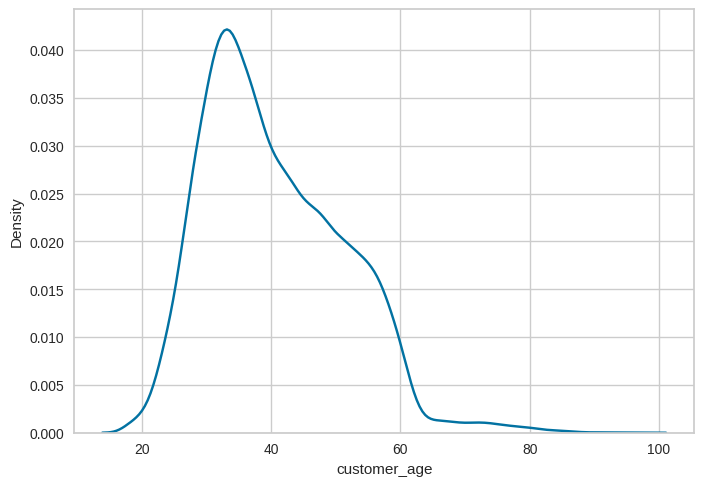

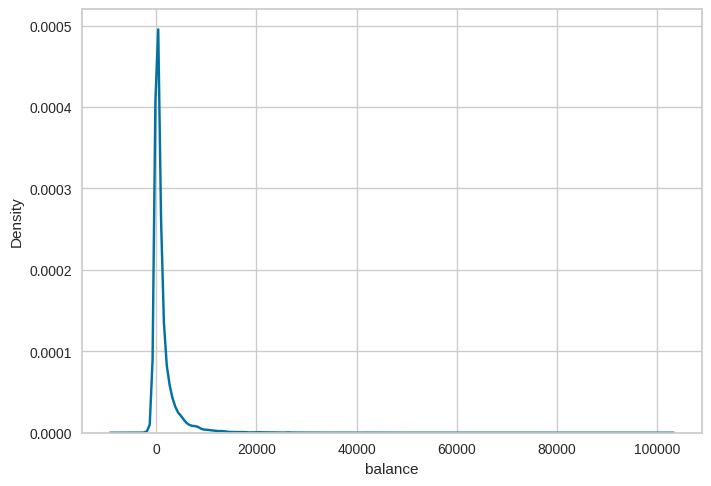

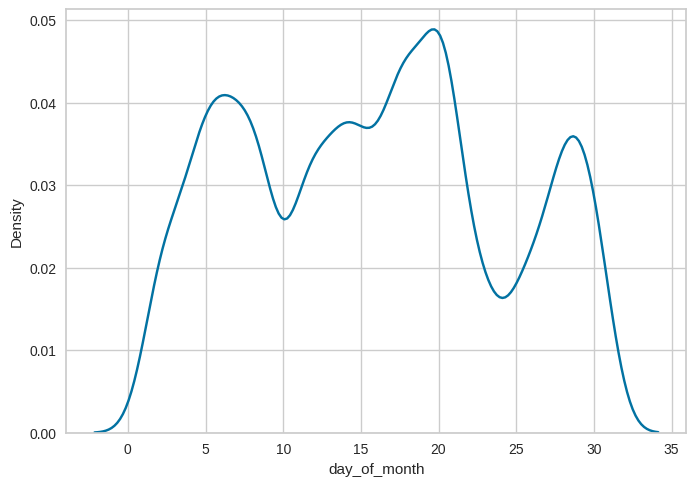

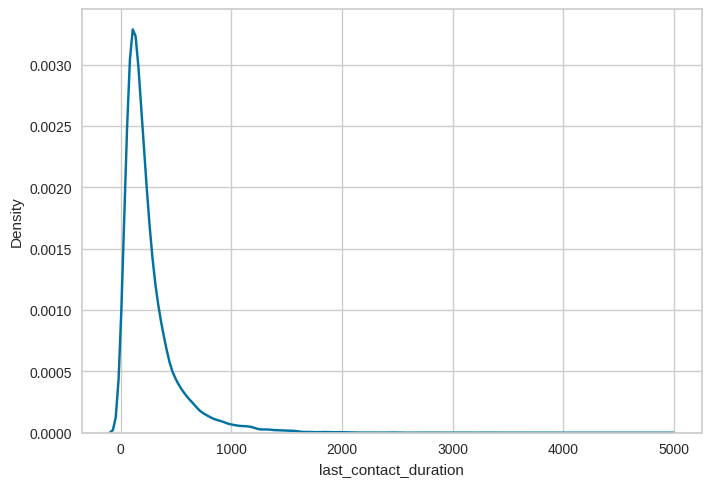

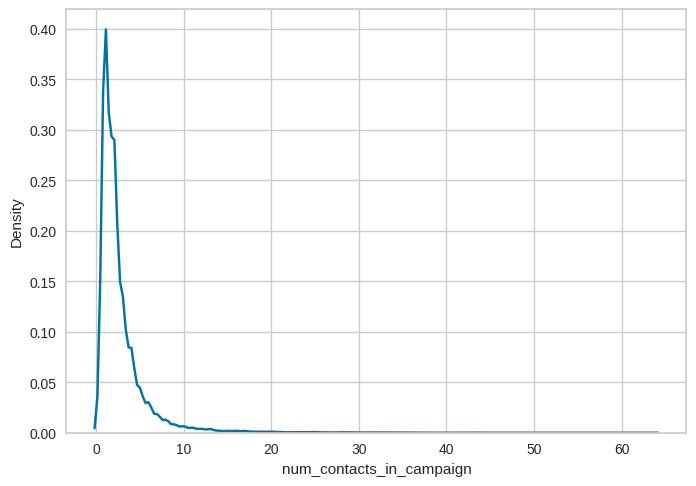

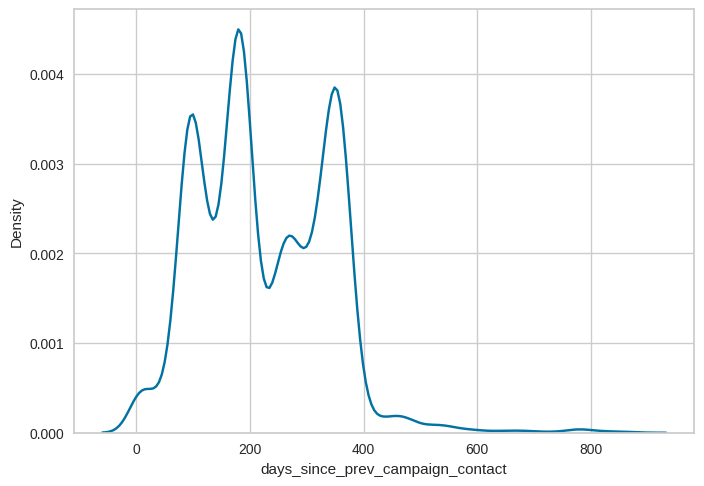

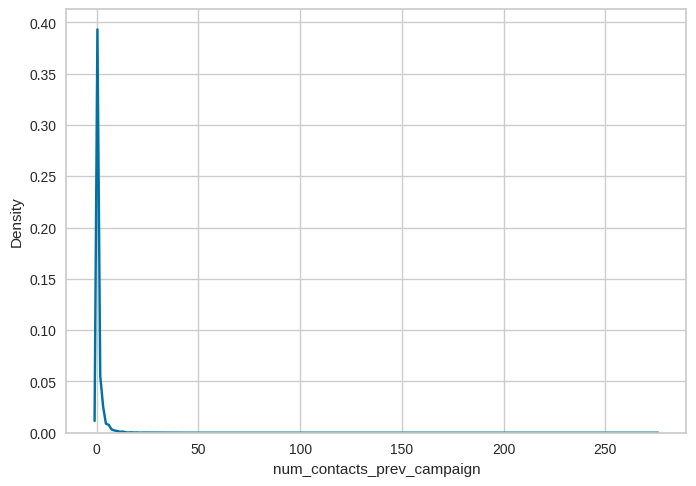

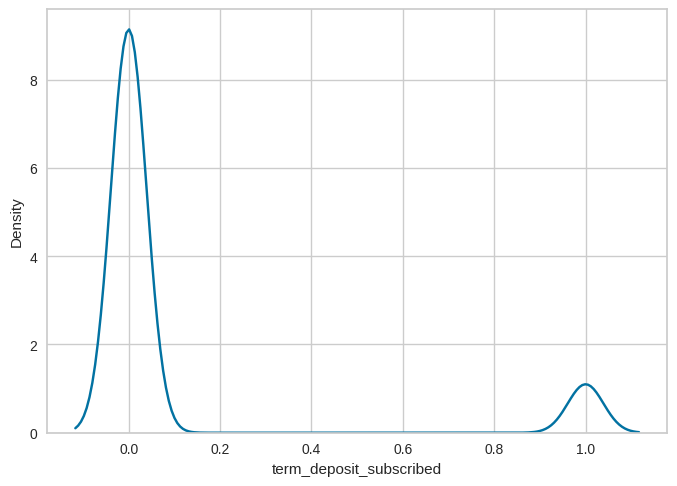

customer_age                         0.661953
balance                              8.505127
day_of_month                         0.091909
last_contact_duration                3.165869
num_contacts_in_campaign             5.000172
days_since_prev_campaign_contact     0.649478
num_contacts_prev_campaign          45.833007
term_deposit_subscribed              2.538727
dtype: float64


In [25]:
# kde plot - kernel density estimate plot
for i in numerical:
  sns.kdeplot(data=numerical, x=i)
  plt.show()

print(numerical.skew())


The kde plot shows the distribution of numerical features and skewness values are also displayed. Few features are moderately skewed and others are highly skewed.


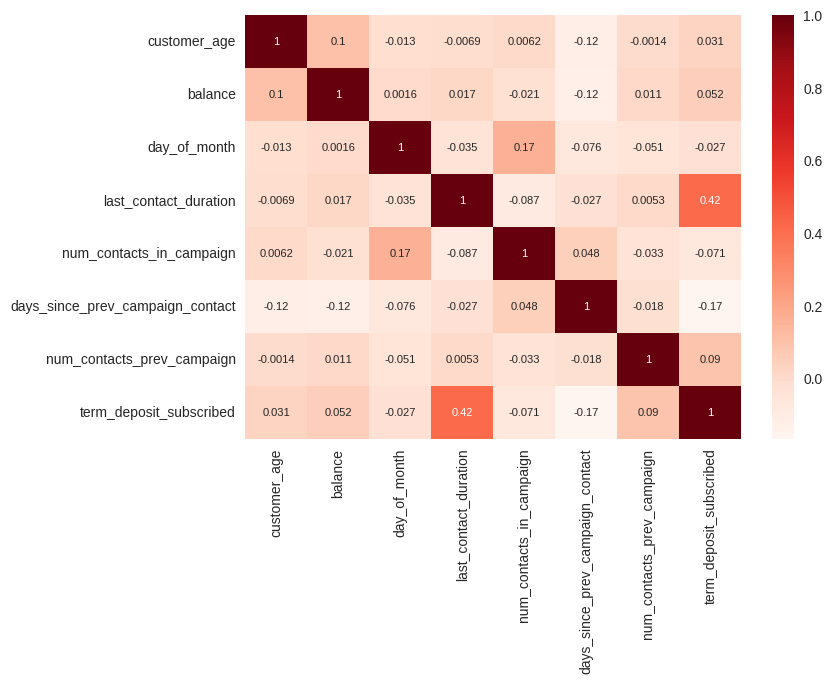

In [26]:
# display correlation of numerical features
sns.heatmap(numerical.corr(),annot=True, cmap='Reds',annot_kws={'size':8})
plt.show()

Fairly poor correlation among the features. Positive correlation is among the following:
1. Customer Age and Balance
2. Day of month and number of contacts in campaign
3. Last contact duration and term deposit subcribed shows a correlation coefficient of 0.42

**Univariant Analysis**

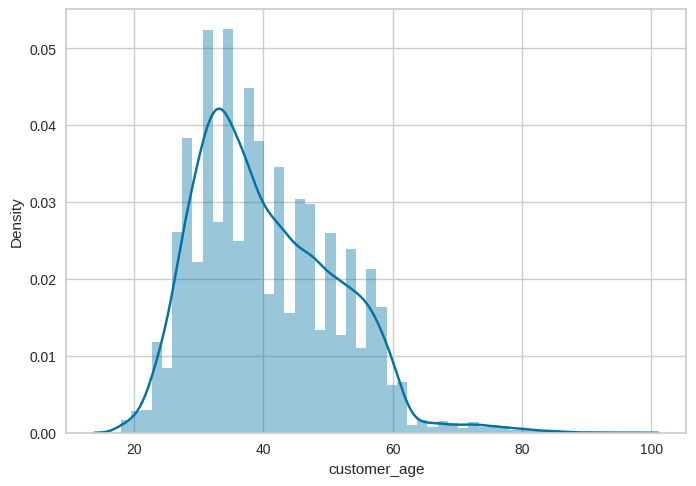

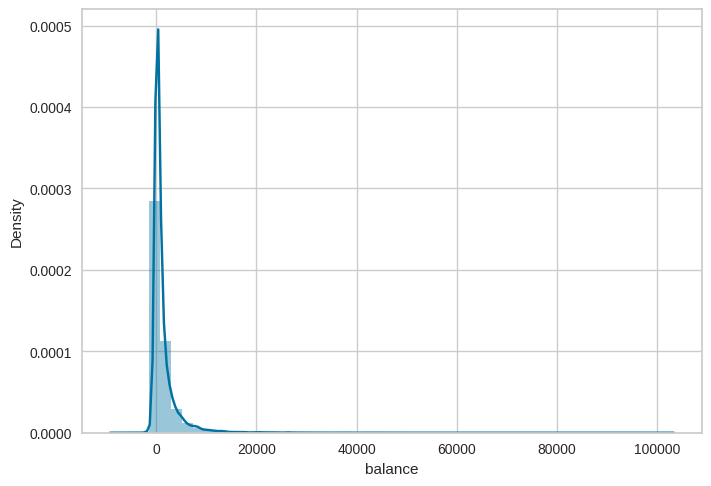

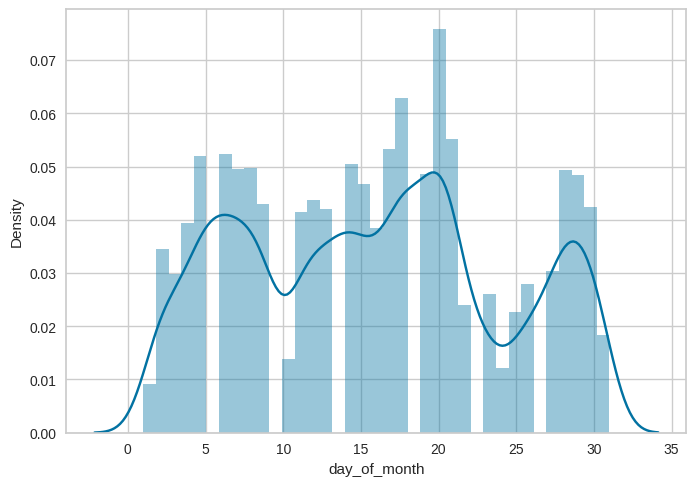

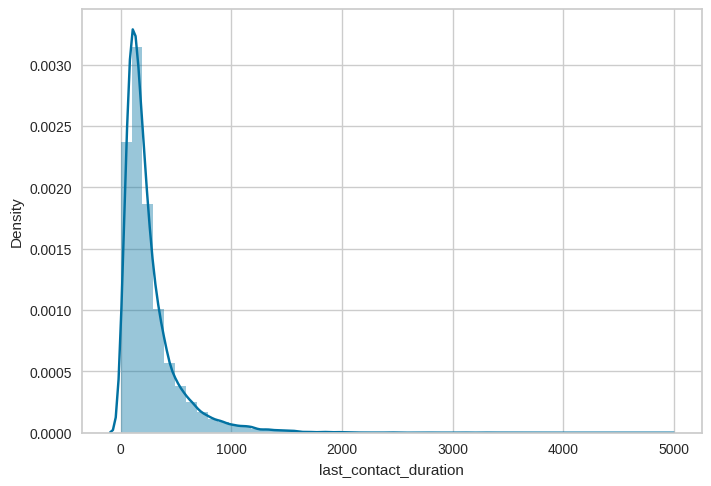

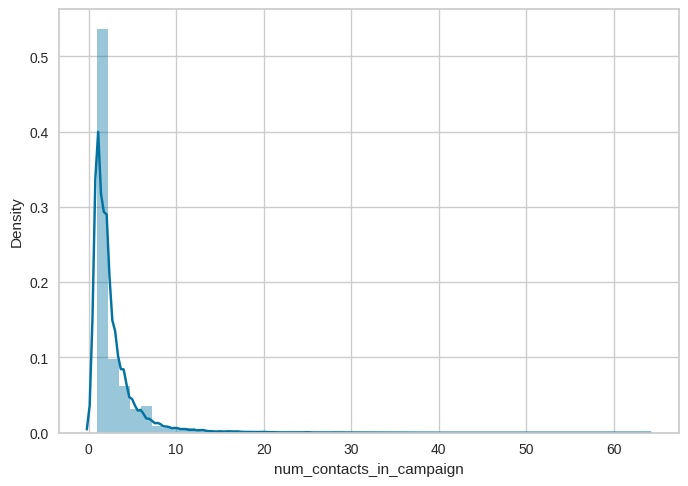

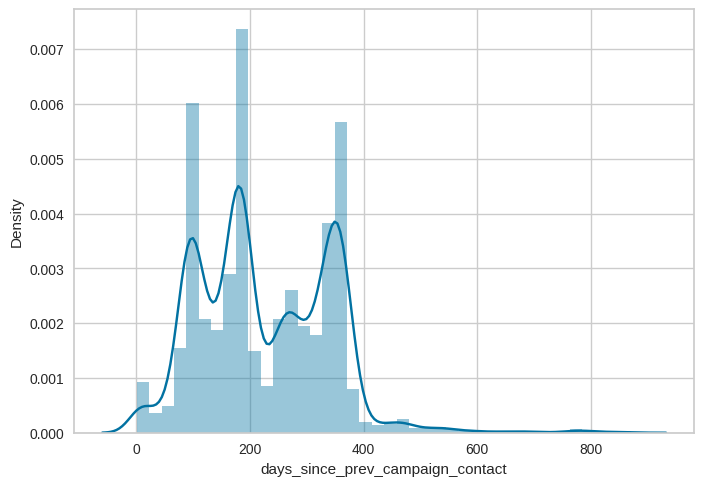

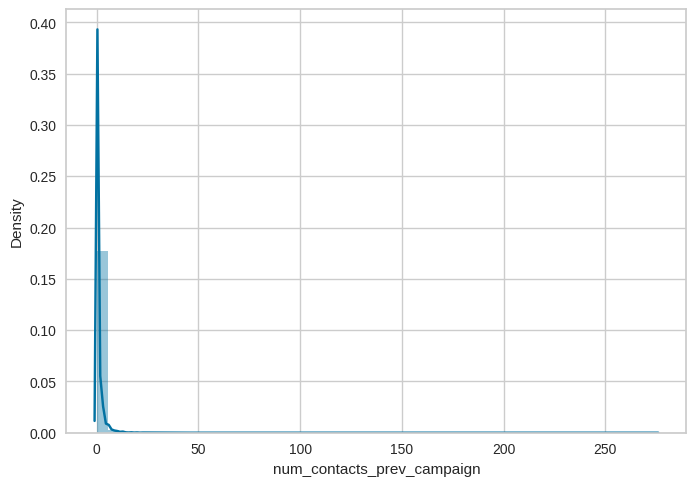

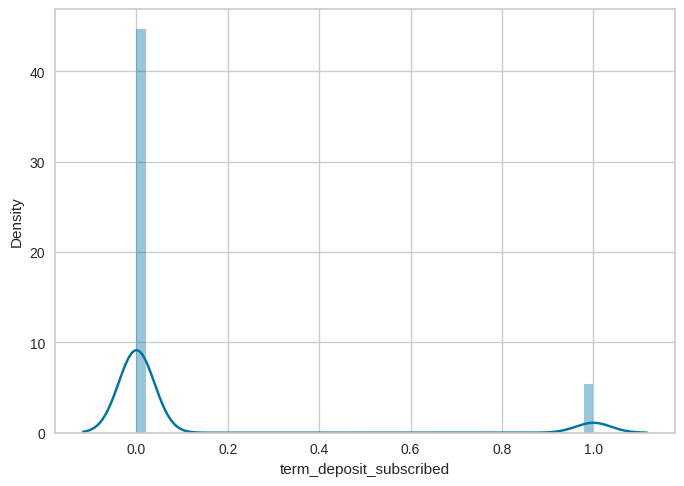

In [27]:
for i in numerical:
  sns.distplot(numerical[i])
  plt.show()


Seaborn histogram plot shows a clearer picture of the distribution for the numerical features.

Most of the customers are:
1. in the age group of 30-40
2. Have Balances below 20000
3. Contacted around 20th of the month
4. Call duration less than 1000 secs
5. Contacted upto 10 times
6. Around 200 days ie. 7 months since previous campaign contact
7. Number of contacts in previous campaign is less than 50
8. Majority have not subscribed to term deposits

**Bivariant Analysis**

show distribution of Customer Age vs other numerical features

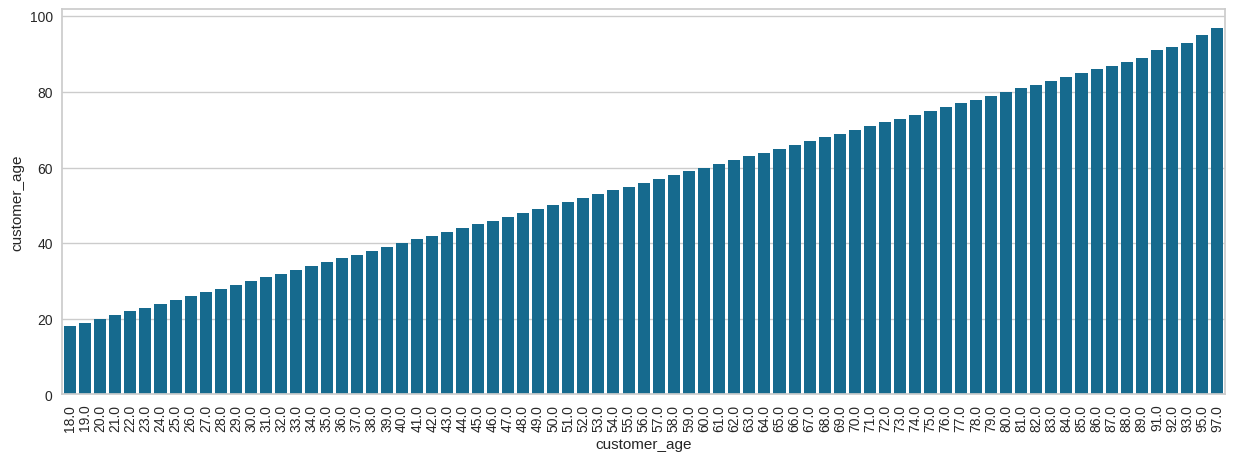

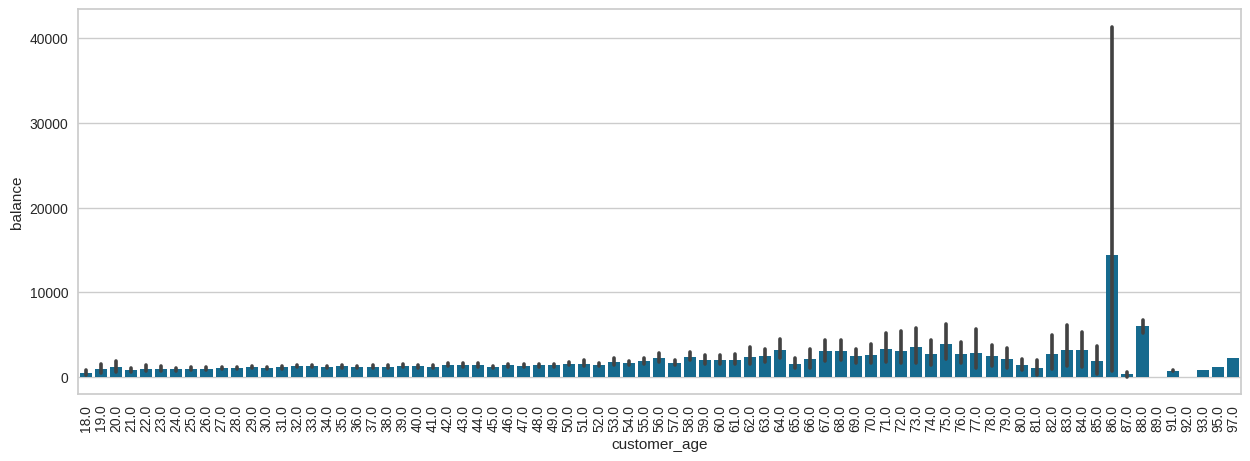

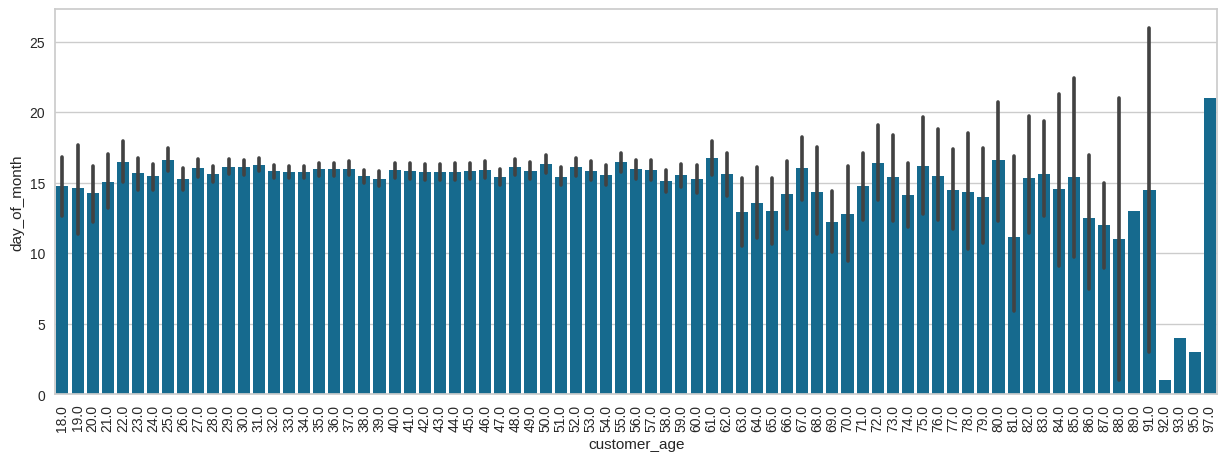

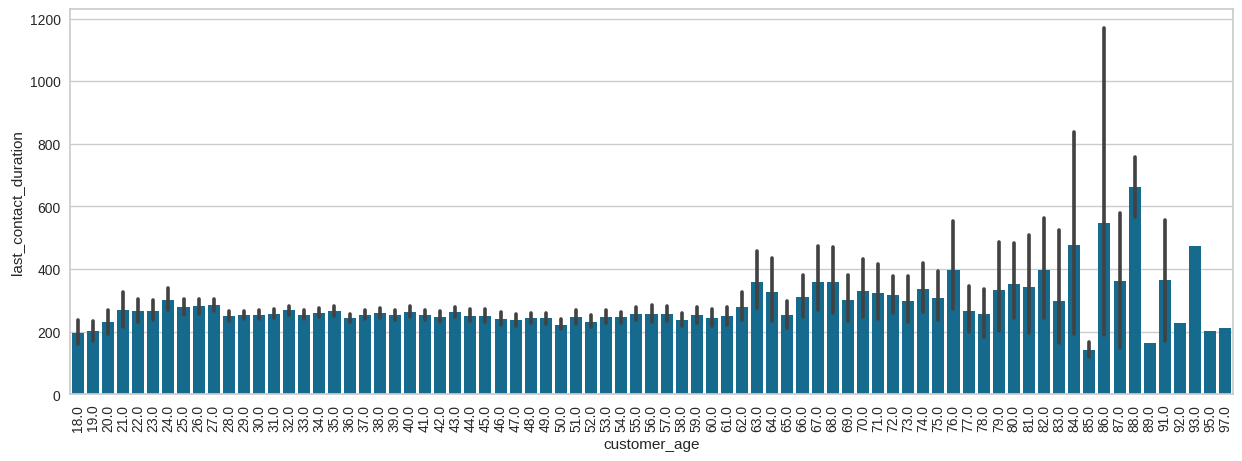

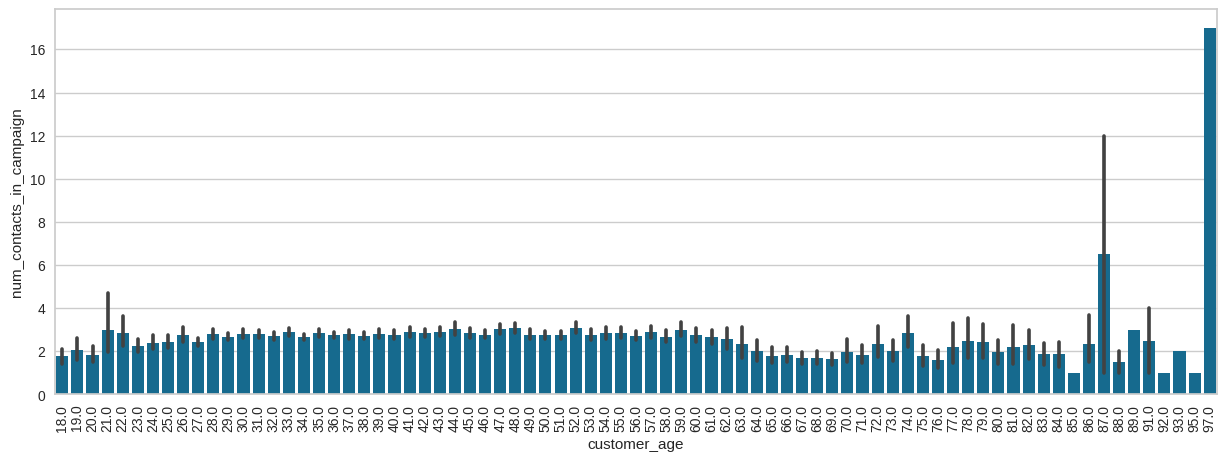

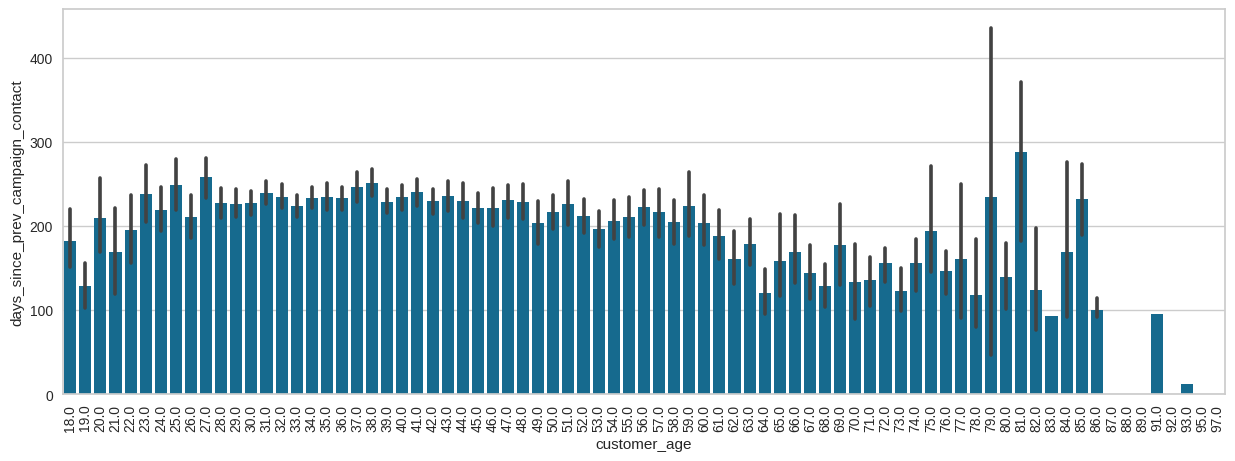

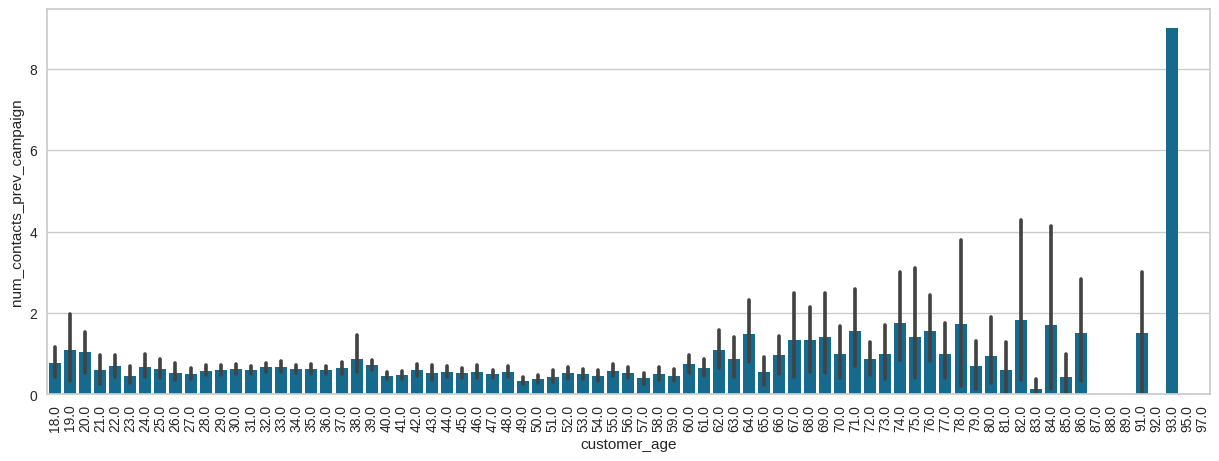

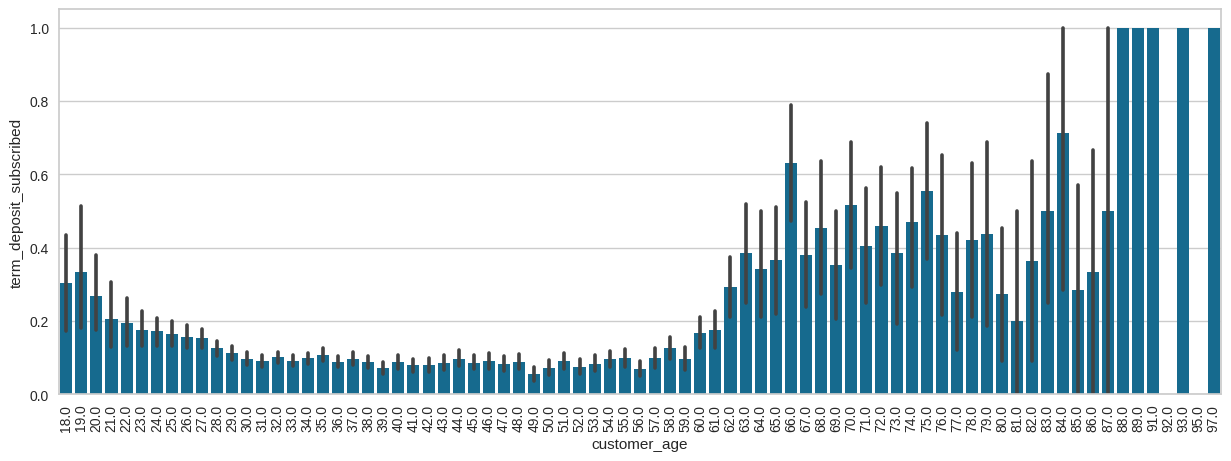

In [28]:
for i in numerical:
  plt.figure(figsize=(15,5))
  sns.barplot(x=numerical['customer_age'],y=numerical[i],data=numerical)
  plt.xticks(rotation=90)
  plt.show()

1. On an average 50+ Age group holds higher balances than below 50 , 86 yr customer has highest balance.
2. Almost all age groups were contacted after 15th of the month - (could be after 1st biweekly salary credit)
3. 70+ have engaged in longer call duration ie.beyond 600secs
4. most age groups were contacted 2-5 times during the campaign, 85+ were contacted more
5. all ages have subscribed expect for 92 and 95 yr old.




Relation of numerical features with Term deposit Subscribed using boxplot

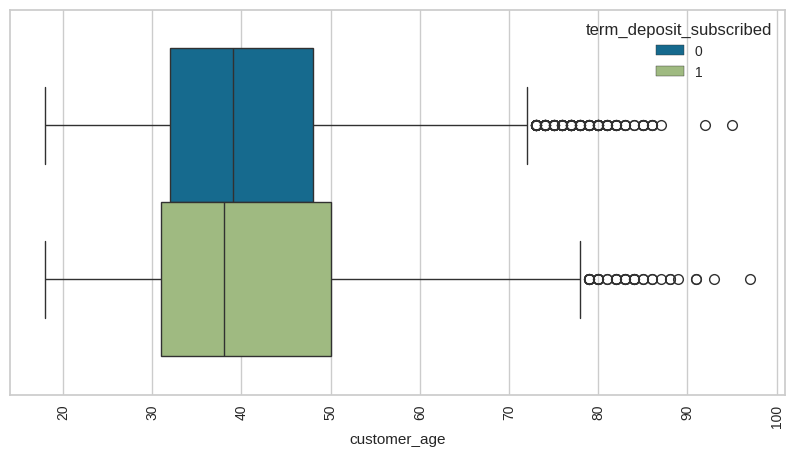

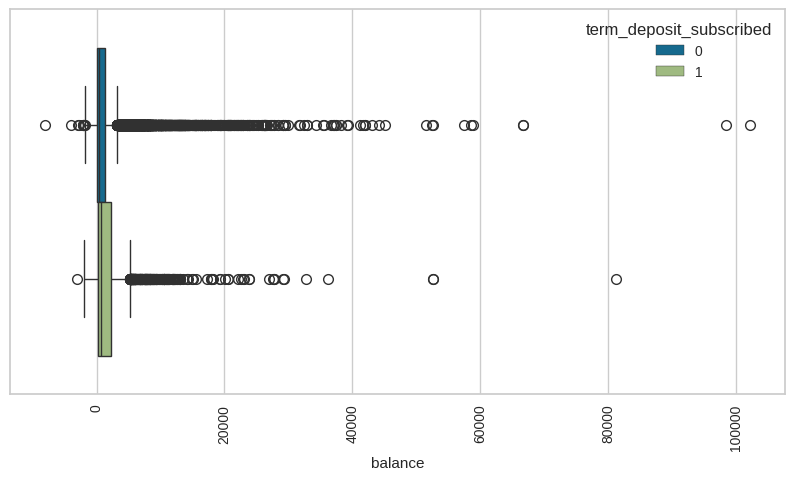

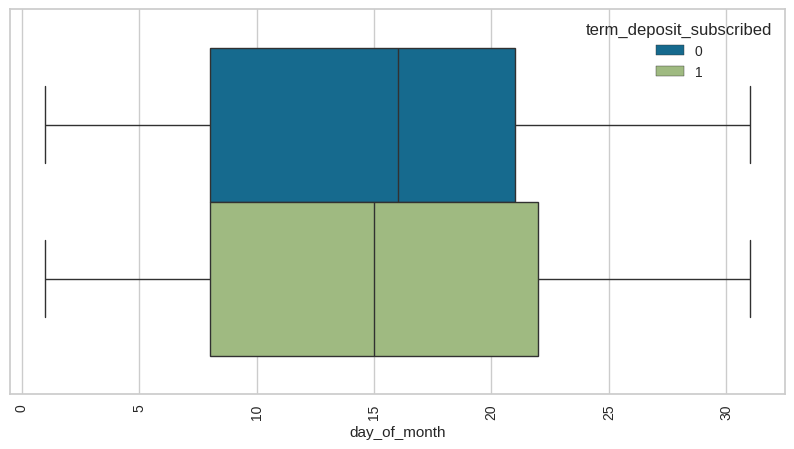

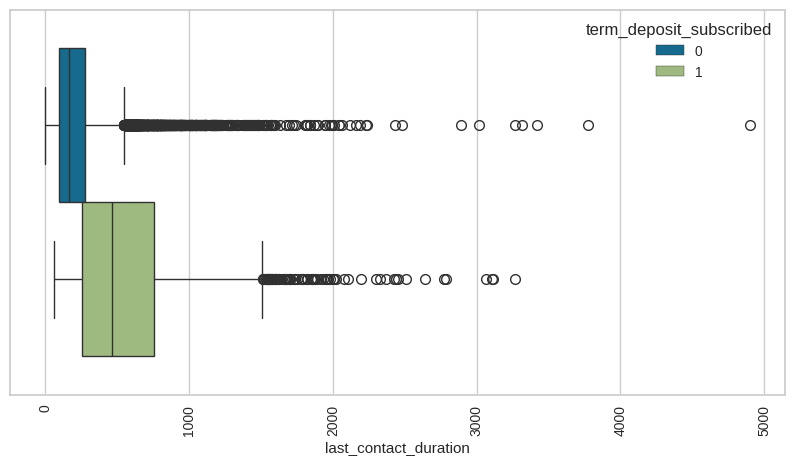

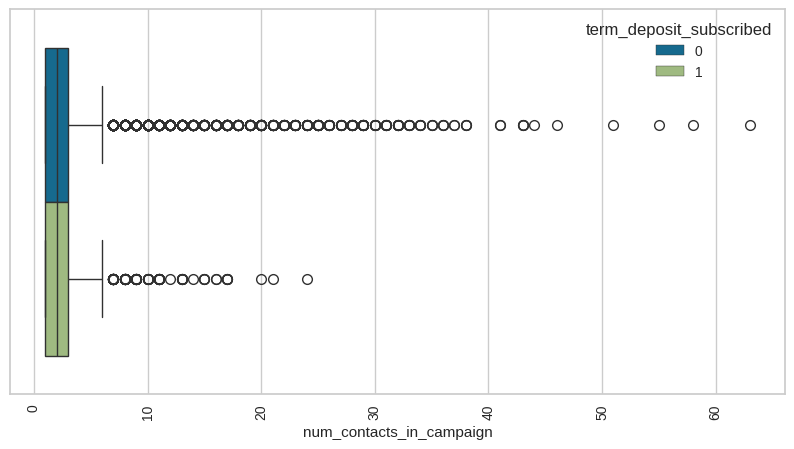

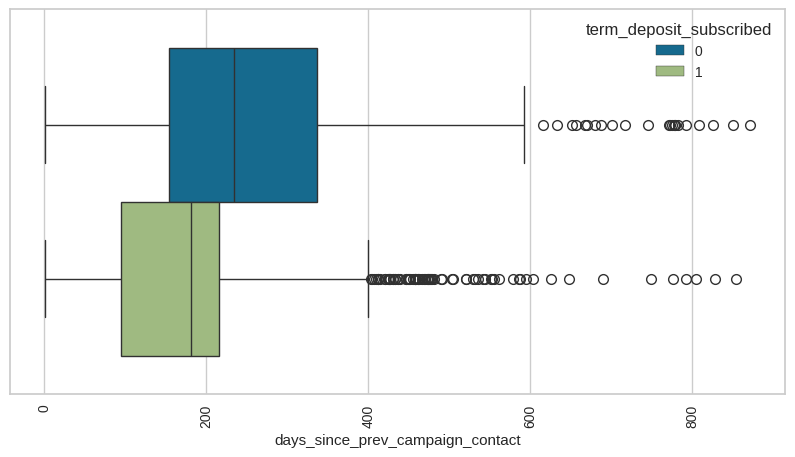

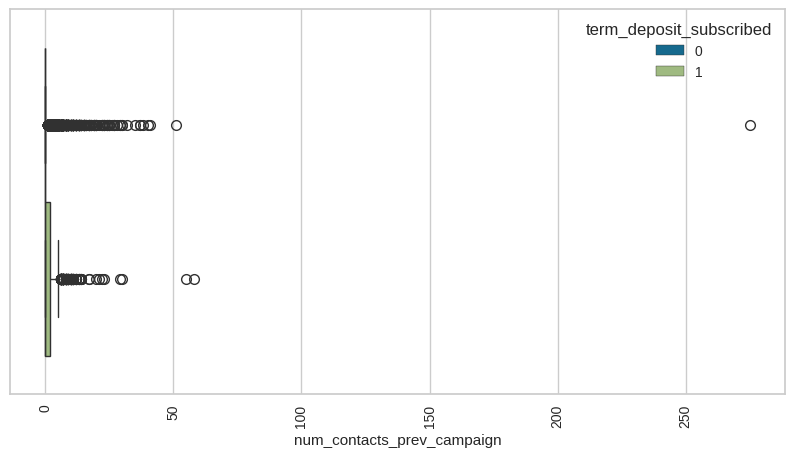

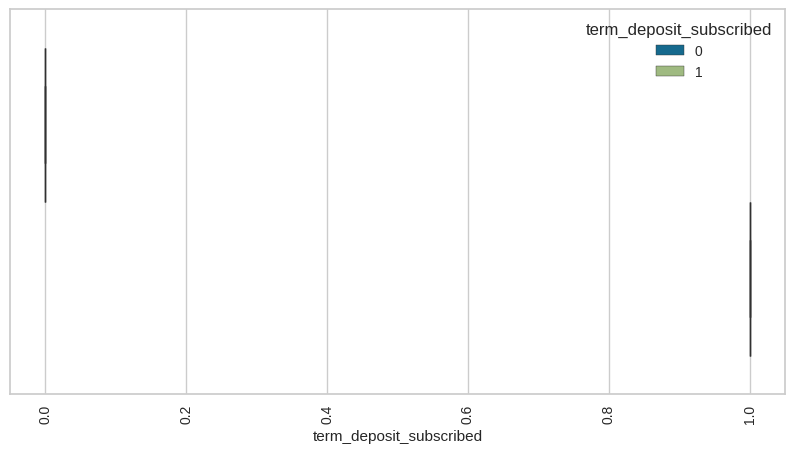

In [29]:
for i in numerical:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=i, data = numerical ,hue='term_deposit_subscribed')
  plt.xticks(rotation=90)
  plt.show()

All numerical features expect day of month have outliers present which will be treated using IQR.

1. Age ranging from 30-50 have subscribed to term deposits
2. Those contacted between 7th and 22nd of month subscribed to term deposits
3. More contact duration have subscribed to term deposits
4. More days since previous campaign contact had lesser subscription

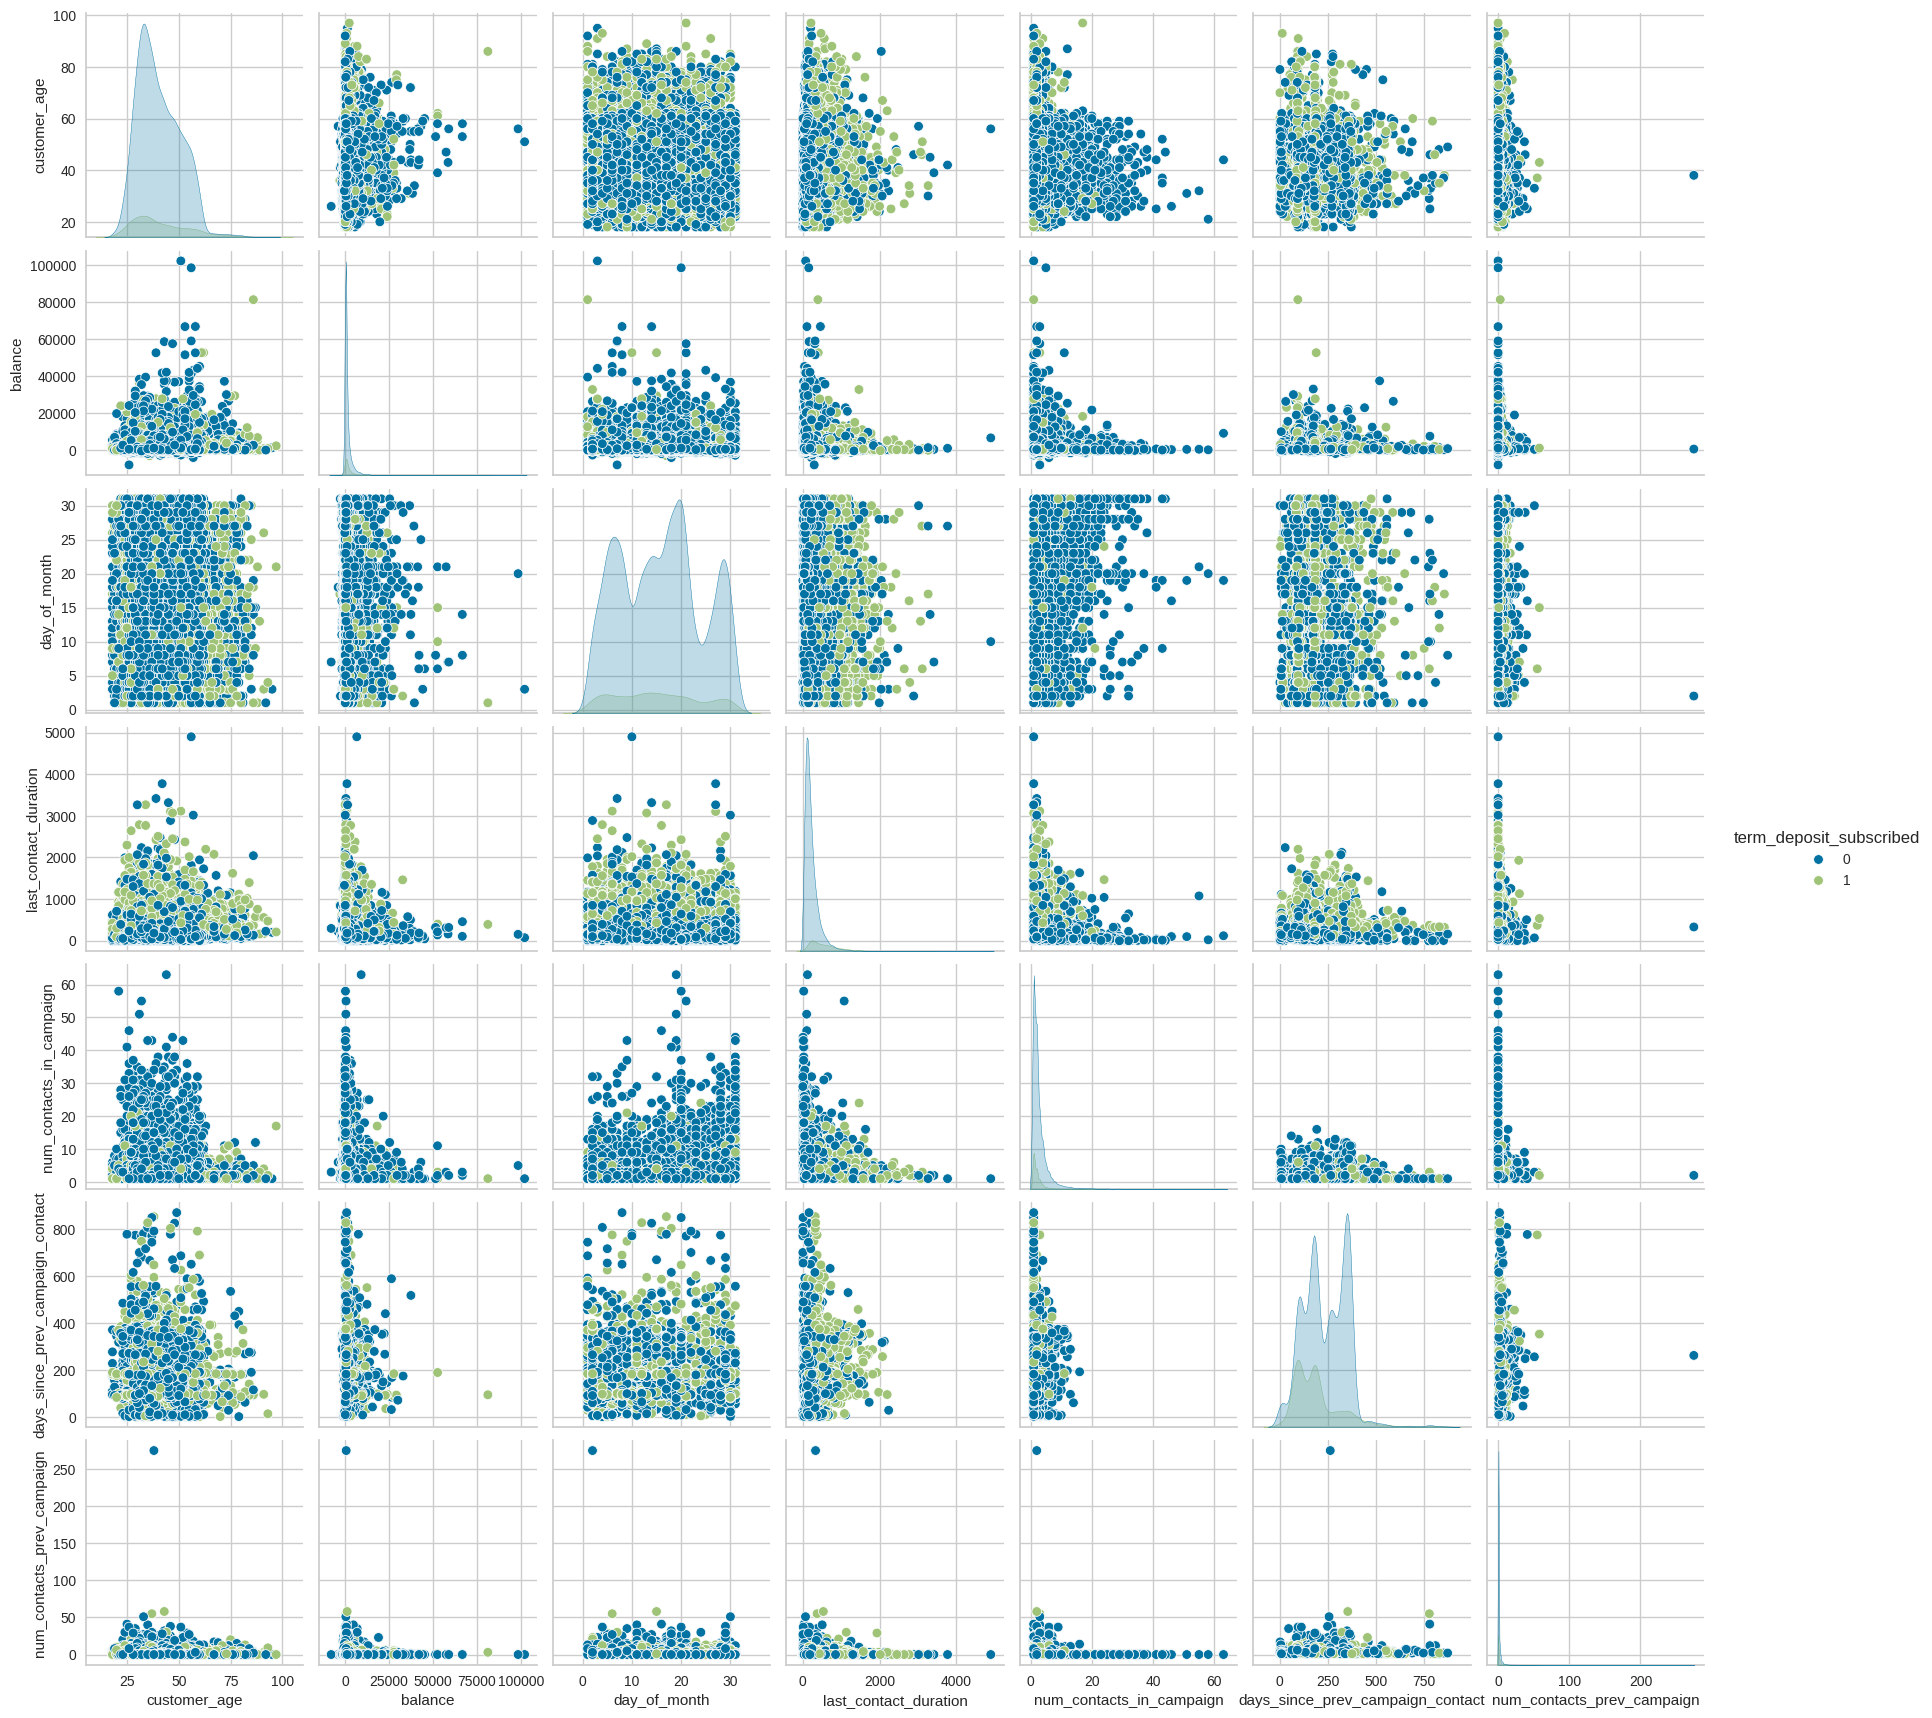

In [30]:
sns.pairplot(numerical,hue='term_deposit_subscribed')
plt.show()

### **EDA of categorical variables**

Univariate using Piecharts

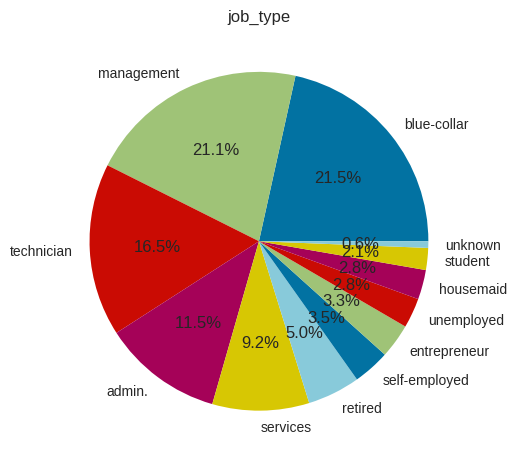

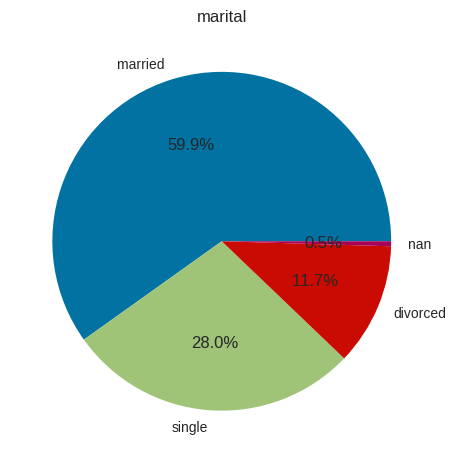

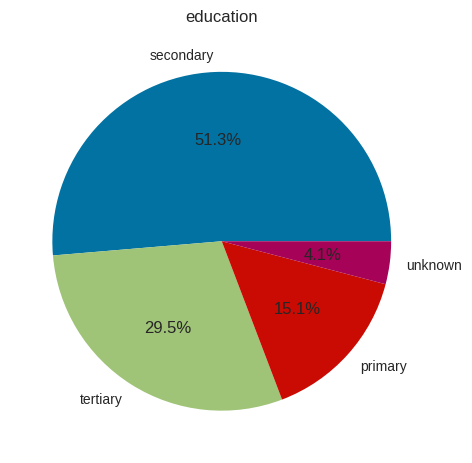

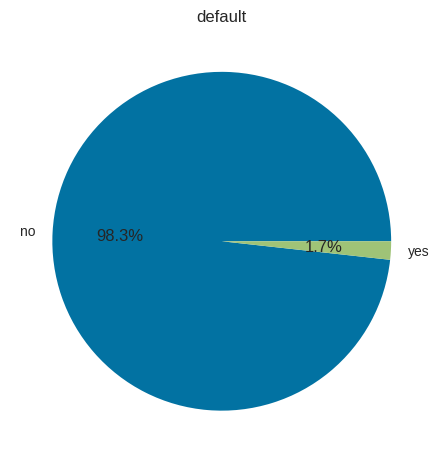

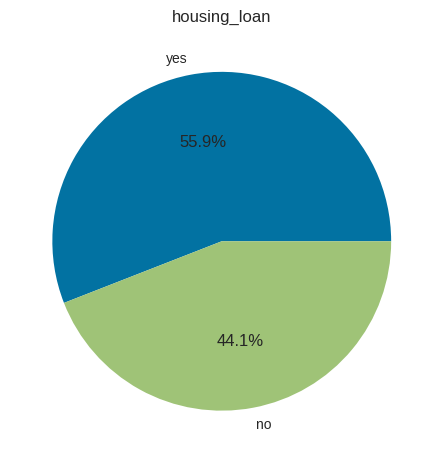

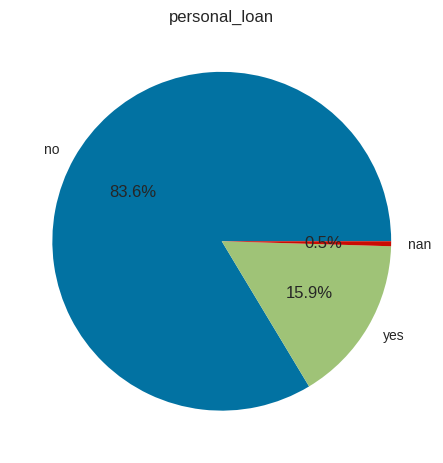

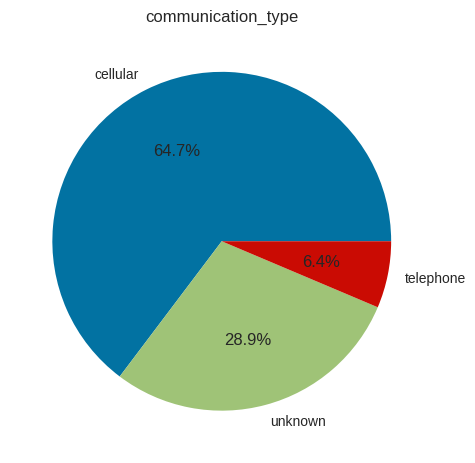

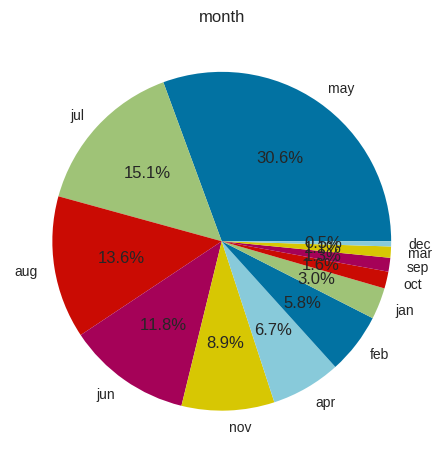

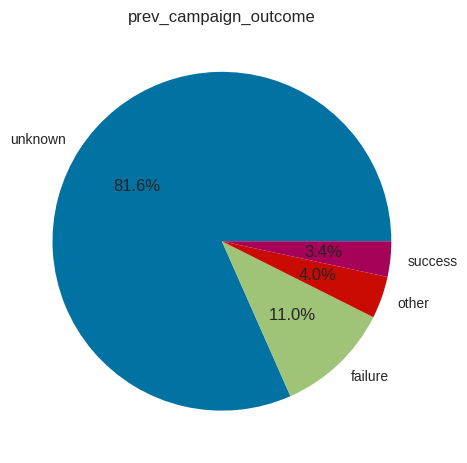

In [31]:
for i in categorical:
  plt.pie(x=categorical[i].value_counts(dropna=False),labels=categorical[i].value_counts(dropna=False).index,autopct='%1.1f%%')
  plt.title(i)
  plt.show()

Above piecharts show:

21.5% of customers have a blue-collar job, 21% are management professionals and 16% are technicians.

60% customers are married, 28% are single and 11% are divorced.

51% customers have had secondary level of education, 29.5% with tertiary level of education

98% customers have not defaulted

55% of customers have housing loan and 84% have not taken personal loan

64.7 % were contacted via cellular mode, 29% unknown

30% of customers were contacted in the month of May and 15% in July and least in December

Only 3.4 % success rate outcome of previous campaign, 11% failed outcomes and 81 % are unknown outcomes

Bivariate Analysis- categorical features vs target variable

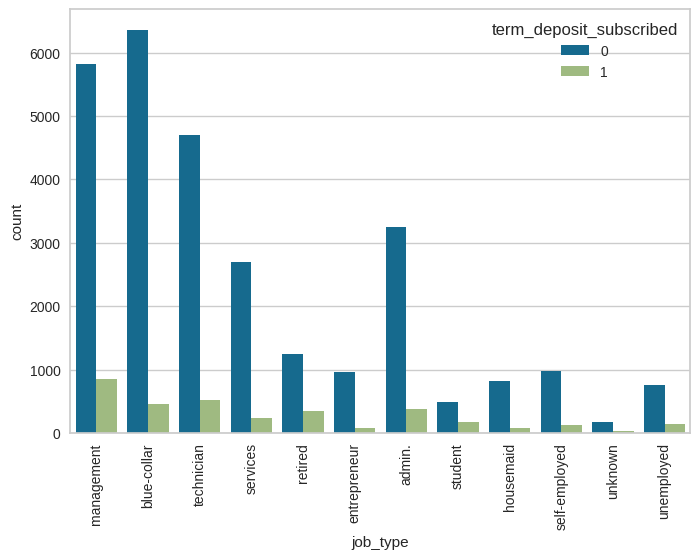

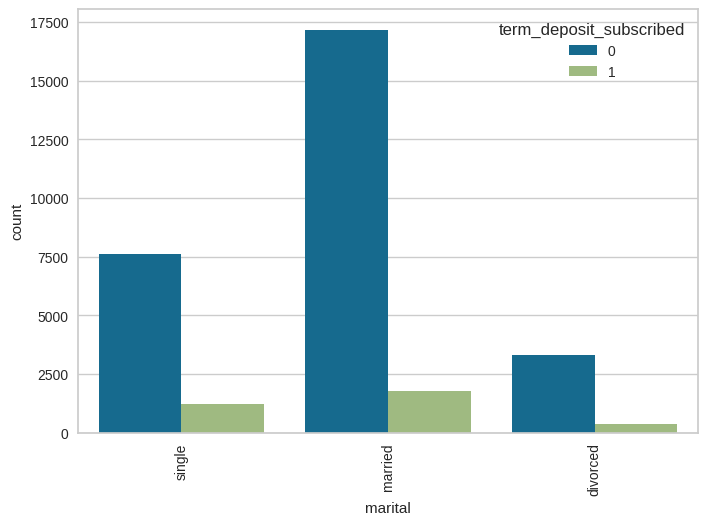

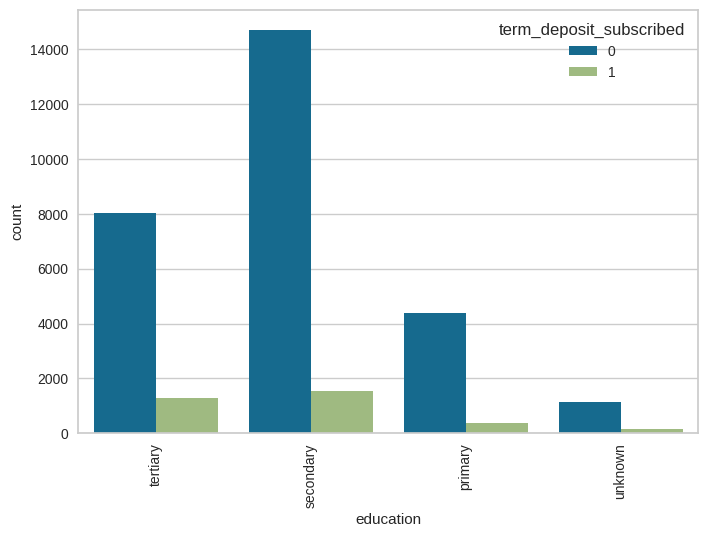

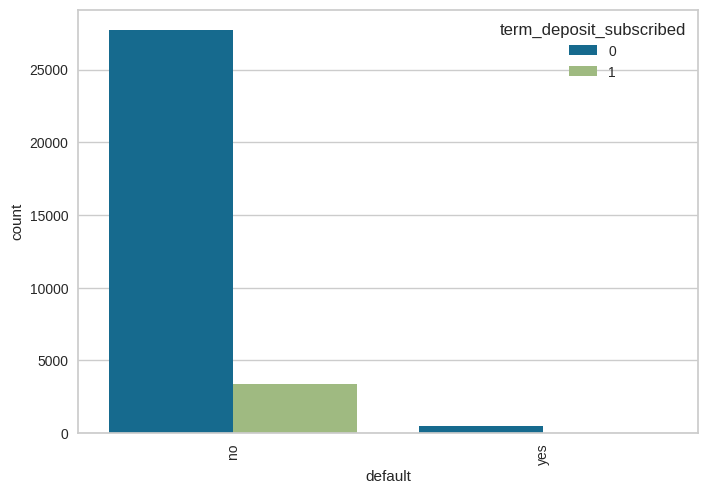

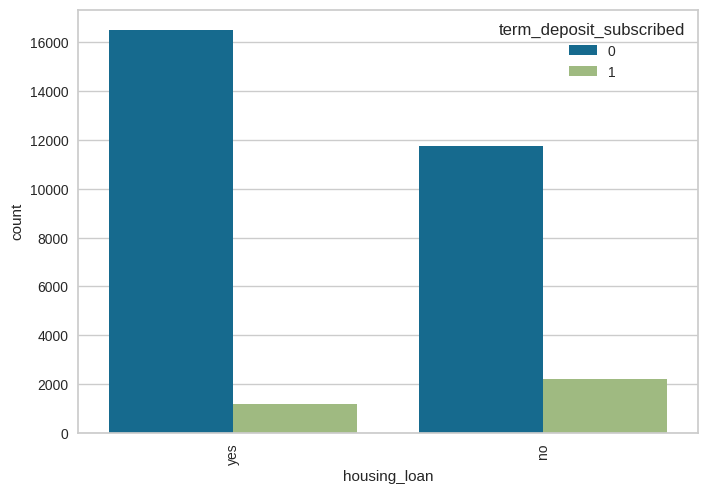

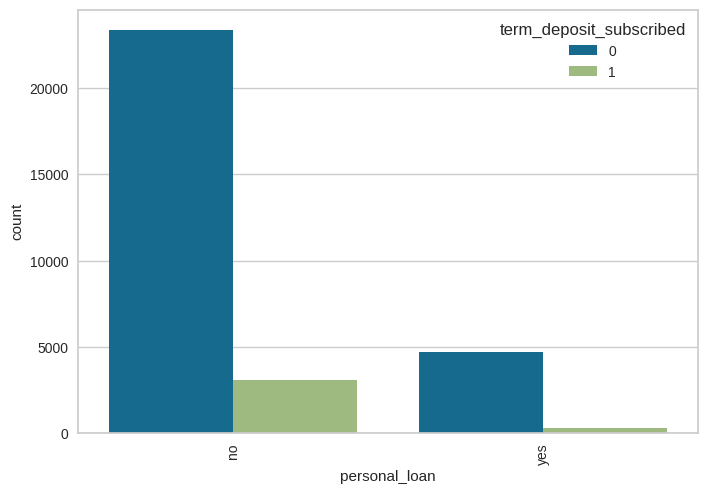

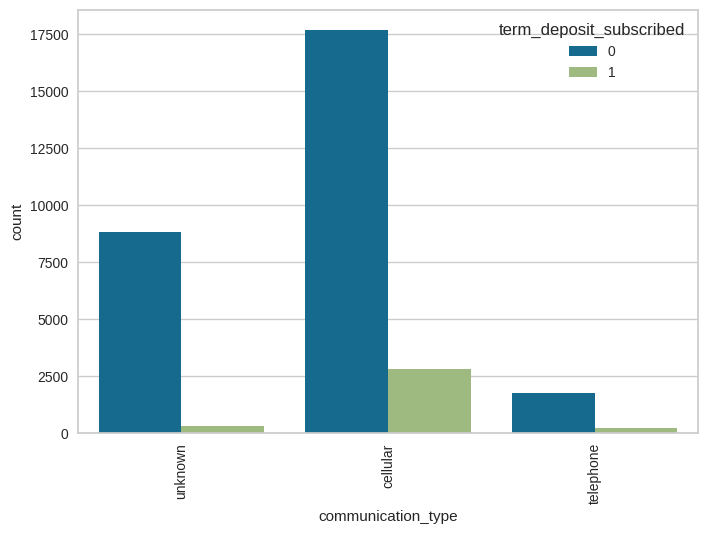

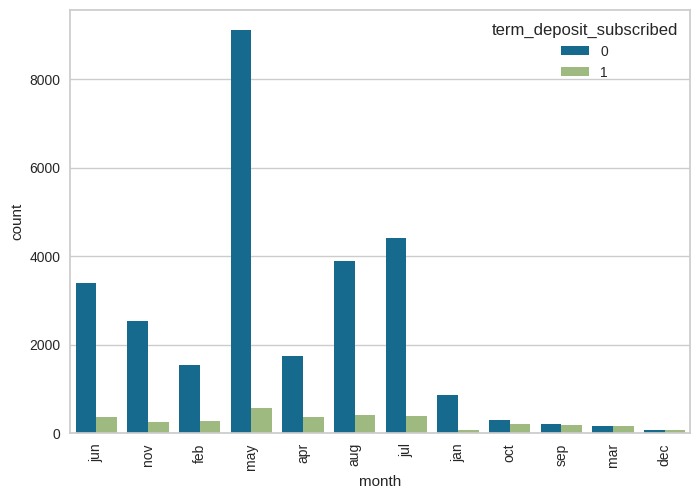

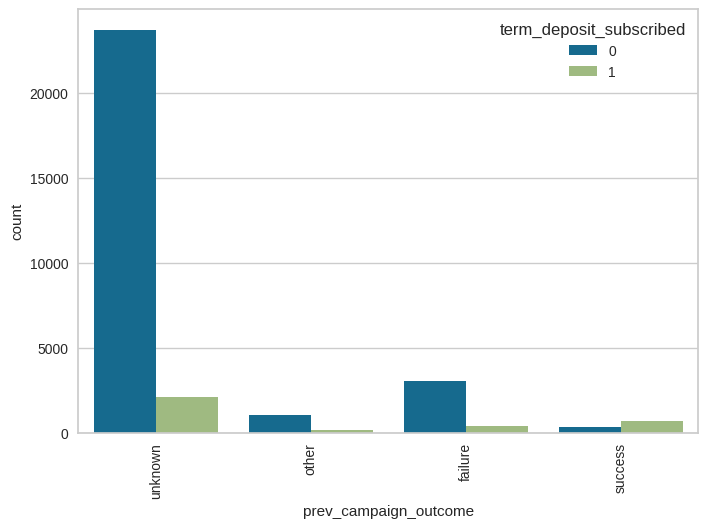

In [32]:
for i in categorical:
  sns.countplot(data=categorical, x=i, hue=dtrain['term_deposit_subscribed'])
  plt.xticks(rotation=90)
  plt.show()

Countplot of categorical features vs term deposit subscribed show:

Customers who opted more term deposits were management professionals, were married, hold secondary education level, no default, those who didnt have housing loan and personal loan.

Customers who were contacted via cellular communication, contacted in the month of May and unknown outcome of previous campaign.

In [33]:
dtrain.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

**After EDA - next is data preprocessing - handling missing and outliers**

In [34]:
# saving a copy before handling for missing and outliers
train=dtrain.copy()

### **Handling missing values in numerical and categorical features**

5 numerical features and 2 categorical features with missing values. Dropping 'days since prev campaign contact' from Train dataset since 80% are missing.

In [35]:
train.drop('days_since_prev_campaign_contact', axis=1,inplace=True)

remaining missing values will be filled with median and mode inorder to retain the data

In [36]:
train['customer_age'].fillna(train['customer_age'].median(),inplace=True)
train['balance'].fillna(train['balance'].median(),inplace=True)
train['last_contact_duration'].fillna(train['last_contact_duration'].median(),inplace=True)
train['num_contacts_in_campaign'].fillna(train['num_contacts_in_campaign'].median(),inplace=True)
train['personal_loan'].fillna(train['personal_loan'].mode()[0],inplace=True)
train['marital'].fillna(train['marital'].mode()[0],inplace=True)

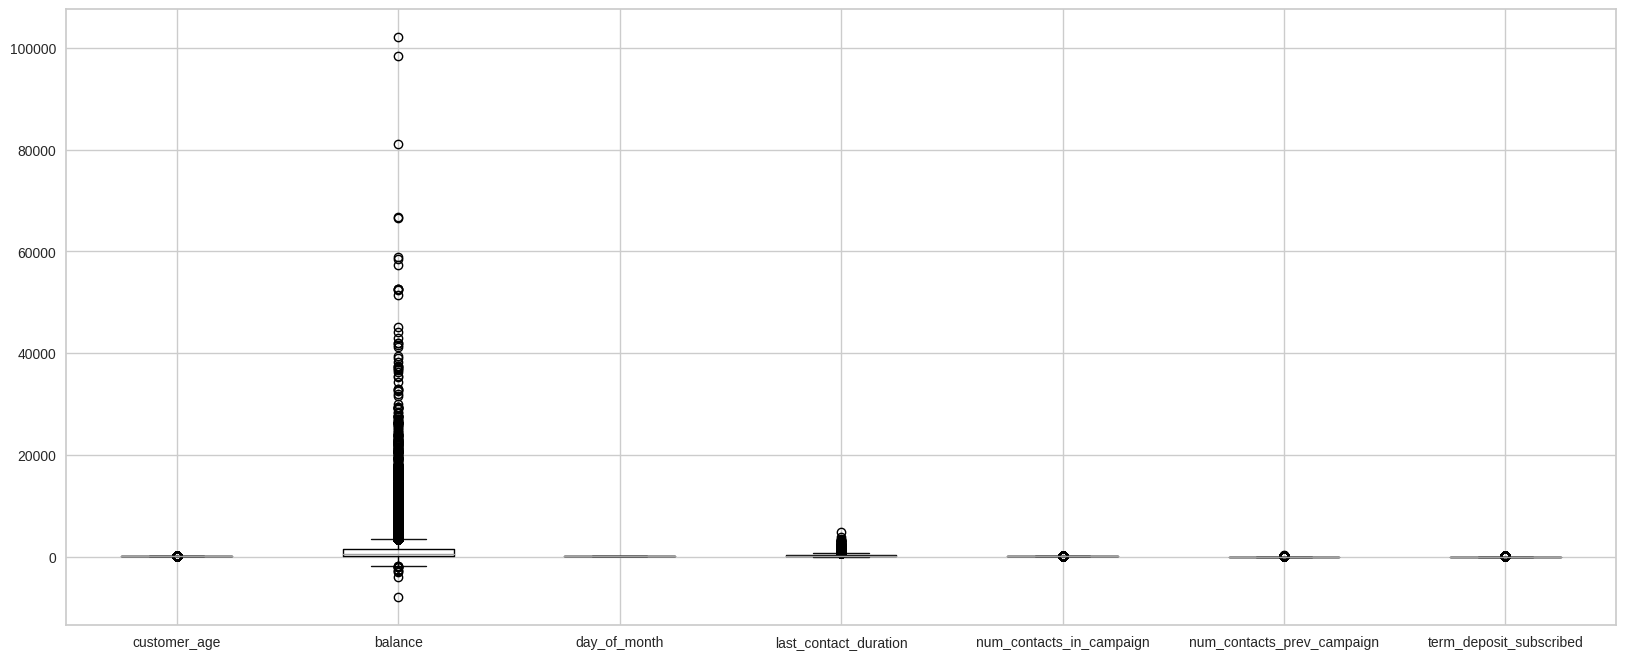

In [37]:
train.boxplot(figsize=(20,8))
plt.show()

In [38]:
dtrain_out=train.copy()   # saving a copy for later

In [39]:
dtrain_out['num_contacts']=dtrain_out['num_contacts_in_campaign']+dtrain_out['num_contacts_prev_campaign']

In [40]:
dtrain_out.drop('num_contacts_in_campaign',axis=1,inplace=True)
dtrain_out.drop('num_contacts_prev_campaign',axis=1,inplace=True)

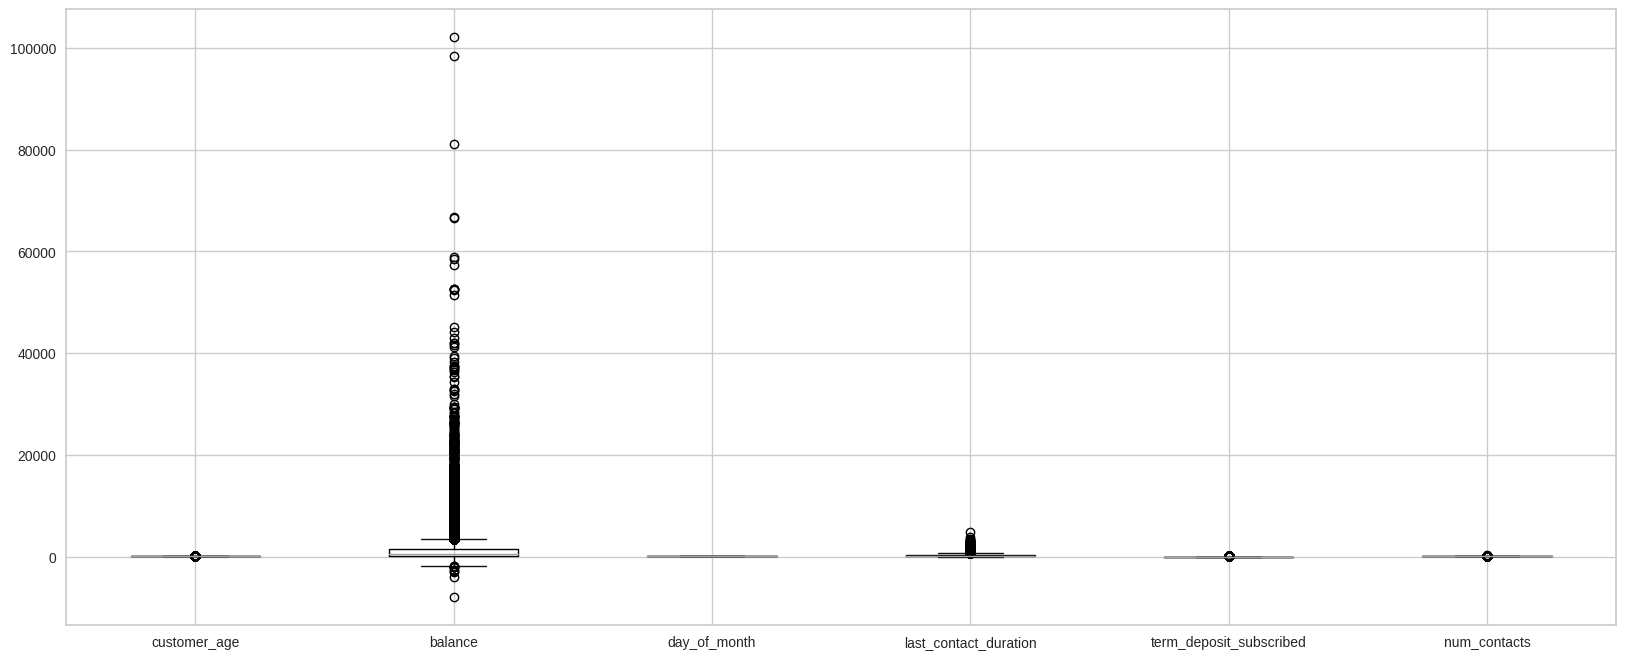

In [41]:
dtrain_out.boxplot(figsize=(20,8))
plt.show()

Clustering Algorithms are sensitive to outliers and hence will treat these outliers using the IQR method

treating outliers only for balance

In [42]:
numerical_out=dtrain_out[['balance']]

[5212.0, 4873.0, 10390.0, 4136.0, 3380.0, 4113.0, 5141.0, 3428.0, 5800.0, 4608.0, 4569.0, 29122.0, 5879.0, 5116.0, 6909.0, 7124.0, 6348.0, 14442.0, 4127.0, 6568.0, 6387.0, 3739.0, 3772.0, 7902.0, 7096.0, 4658.0, 7890.0, 5697.0, 8303.0, 9958.0, 3879.0, 5793.0, 5767.0, 12729.0, 20599.0, 11492.0, 16427.0, 11820.0, 16869.0, 5297.0, 5863.0, 4353.0, 26231.0, 15837.0, 4332.0, 3813.0, 7003.0, 5252.0, 5325.0, 4439.0, 4341.0, 4575.0, 3663.0, 8940.0, 3738.0, 4695.0, 4512.0, 3823.0, 5351.0, 4837.0, 9332.0, 6916.0, 7558.0, 5560.0, 12326.0, 4396.0, 5235.0, 5991.0, 4580.0, 8973.0, 5267.0, 8044.0, 4851.0, 4185.0, 3709.0, 16125.0, 12128.0, 5905.0, 5689.0, 5288.0, 3767.0, 5979.0, 7954.0, 8490.0, 4966.0, 3478.0, 7707.0, 5001.0, 3733.0, 3651.0, 10286.0, 4514.0, 4639.0, 3854.0, 4972.0, 4792.0, 8322.0, 4039.0, 6672.0, 5883.0, 3402.0, 9011.0, 5301.0, 13041.0, 4048.0, 3542.0, 10661.0, 8425.0, 5822.0, 3632.0, 6211.0, 3629.0, 26572.0, 15476.0, 4368.0, 3376.0, 5258.0, 29337.0, 3593.0, 4435.0, 3476.0, 15263.0, 51

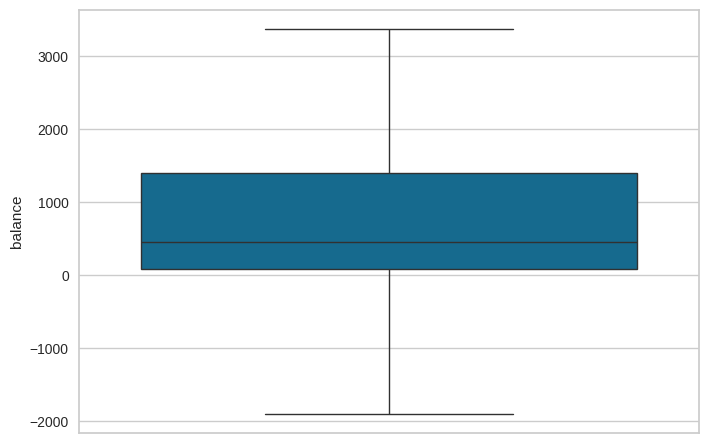

1.0913153890165883




In [43]:
for i in numerical_out:
  q1=dtrain_out[i].quantile(0.25)
  q3=dtrain_out[i].quantile(0.75)
  iqr=q3-q1
  low_lim=q1-(1.5*iqr)
  up_lim=q3+(1.5*iqr)
  outliers = []

  for h in dtrain_out[i]:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
      dtrain_out[i]=dtrain_out[i].clip(lower=low_lim,upper=up_lim)

  print(outliers)
  sns.boxplot(dtrain_out[i])
  plt.show()
  print(dtrain_out[i].skew())
  print('\n')

although outliers are clipped with IQR, the outliers seem to be relevant in terms of likelihood of subscribing to term deposits.  

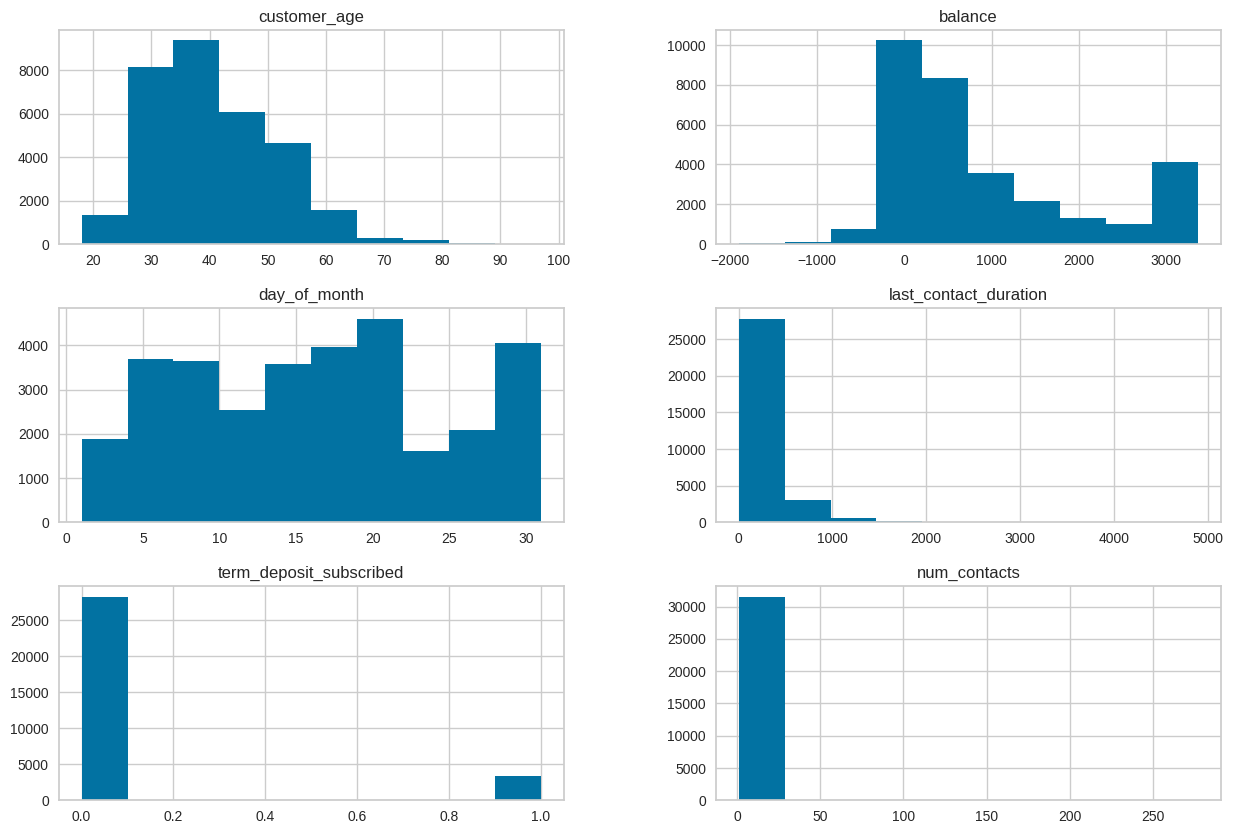

In [44]:
dtrain_out.hist(figsize=(15,10))
plt.show()

**Checking for Statistical Significance**

In [45]:
num_cols=['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts','term_deposit_subscribed']

In [46]:
#Statistical Tests (Chi Square and Anova)
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
p_val = []
sig = []
for i in dtrain_out.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(dtrain_out[dtrain_out['term_deposit_subscribed'] == 0][i], dtrain_out[dtrain_out['term_deposit_subscribed'] == 1][i])
    else:
        ct = pd.crosstab(dtrain_out[i], dtrain_out['term_deposit_subscribed'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    elif p > 0.001:
        sig.append("significant")
    else:
        sig.append('Insignificant')

stats_df = pd.DataFrame({"columns" : dtrain_out.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

columns        p_value significance
10                    month   0.000000e+00  Significant
11    last_contact_duration   0.000000e+00  Significant
12    prev_campaign_outcome   0.000000e+00  Significant
13  term_deposit_subscribed   0.000000e+00  Significant
8        communication_type  6.267977e-150  Significant
6              housing_loan  7.997538e-146  Significant
1                  job_type  9.976017e-121  Significant
5                   balance   2.418741e-64  Significant
3                 education   4.678150e-36  Significant
7             personal_loan   1.339737e-31  Significant
2                   marital   3.022306e-29  Significant
0              customer_age   3.316293e-08  Significant
9              day_of_month   1.703741e-06  Significant
4                   default   5.830453e-04  Significant
14             num_contacts   9.104165e-01  significant

In [47]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(sig_cols)
print('Statiscally insignificant features are :','\n')
print(insig_cols)

Statiscally significant features are : 

0                customer_age
1                    job_type
2                     marital
3                   education
4                     default
5                     balance
6                housing_loan
7               personal_loan
8          communication_type
9                day_of_month
10                      month
11      last_contact_duration
12      prev_campaign_outcome
13    term_deposit_subscribed
Name: columns, dtype: object
Statiscally insignificant features are : 

Series([], Name: columns, dtype: object)


Statistical significance shows all 15 features are significant

## **Analyse the Test Dataset**

In [48]:
num=dtest.select_dtypes(include=['int64','float64'])
cat=dtest.select_dtypes(include=['object'])

In [49]:
num.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign'],
      dtype='object')

In [50]:
cat.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

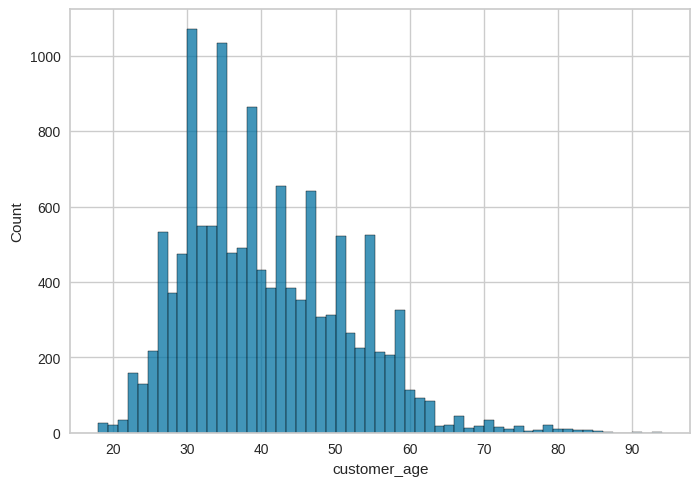

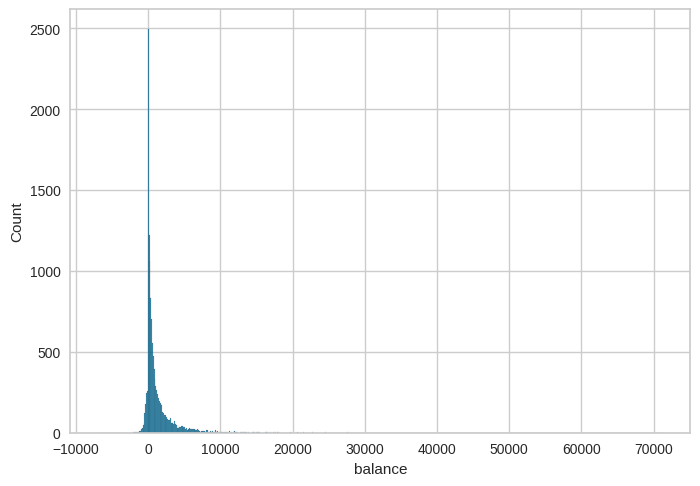

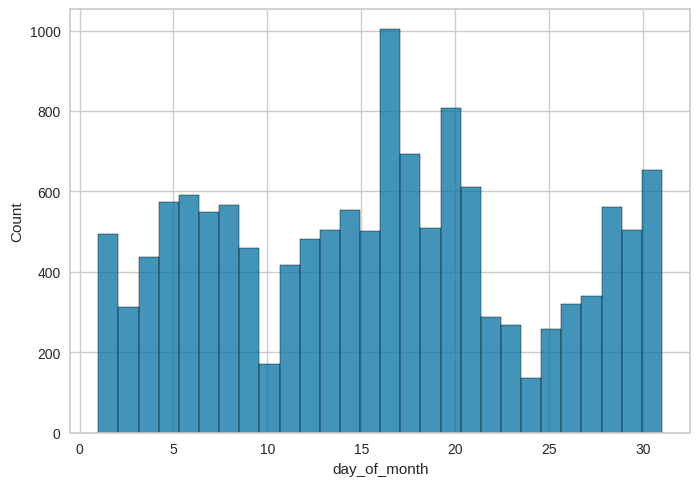

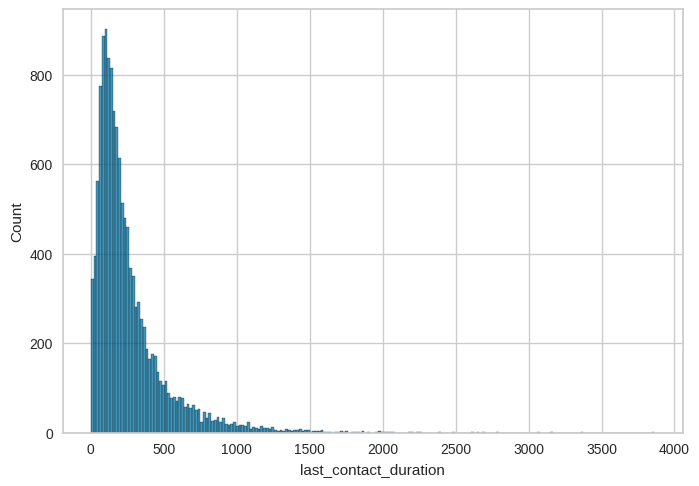

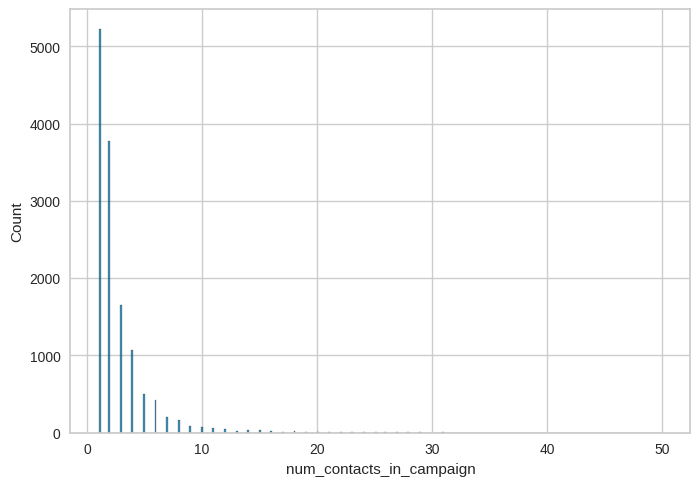

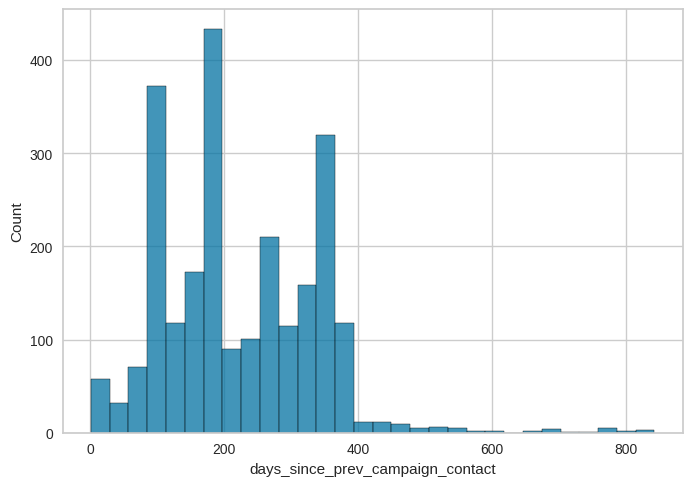

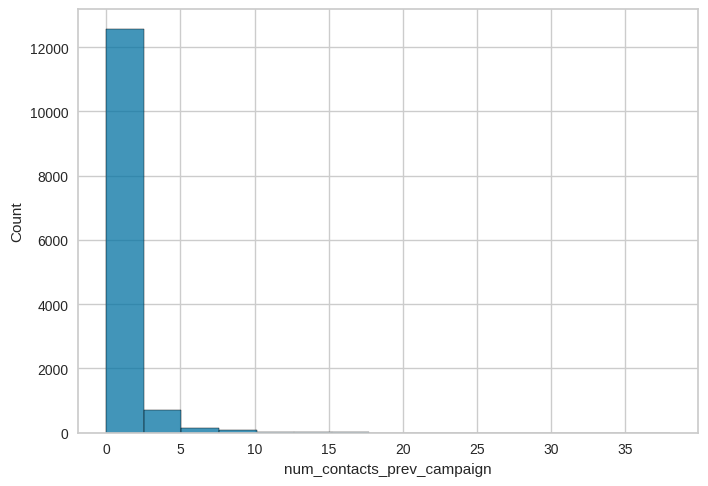

In [51]:
for i in num:
  sns.histplot(data=num, x=i)
  plt.show()

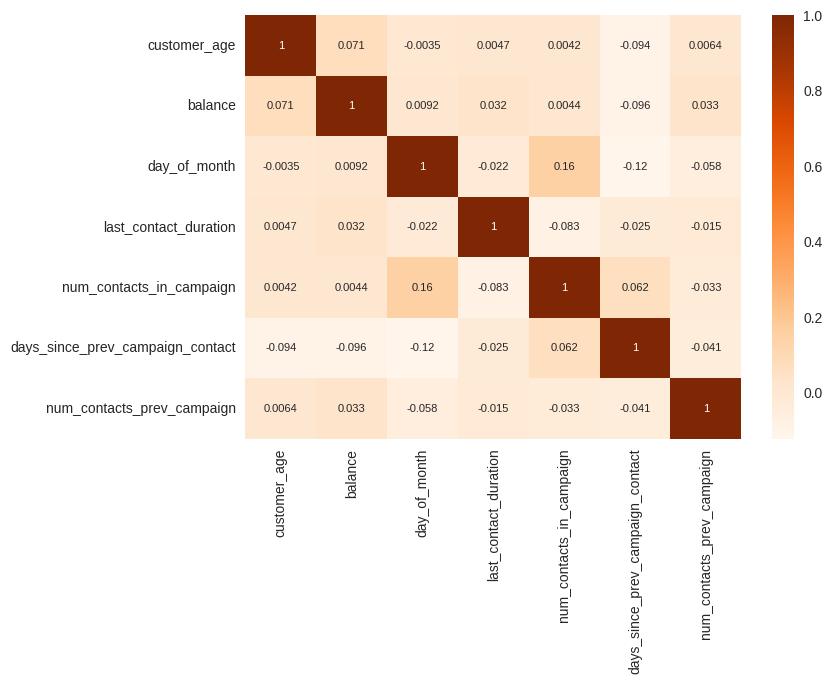

In [52]:
sns.heatmap(num.corr(),annot=True, cmap='Oranges',annot_kws={'size':8})
plt.show()

low correlation among numerical features

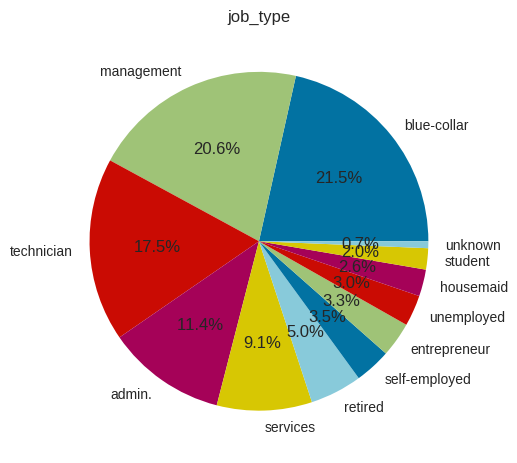

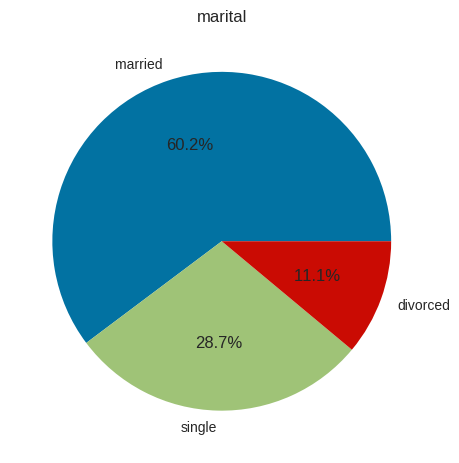

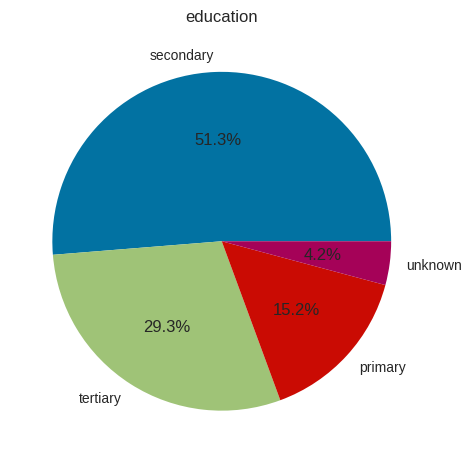

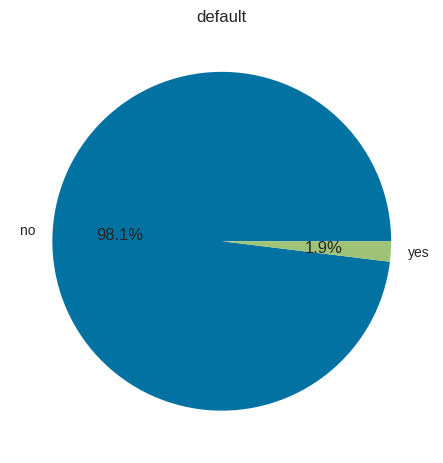

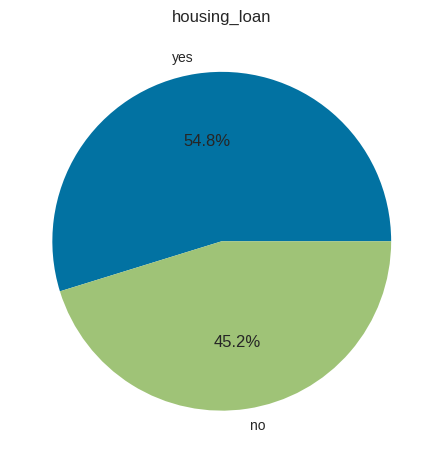

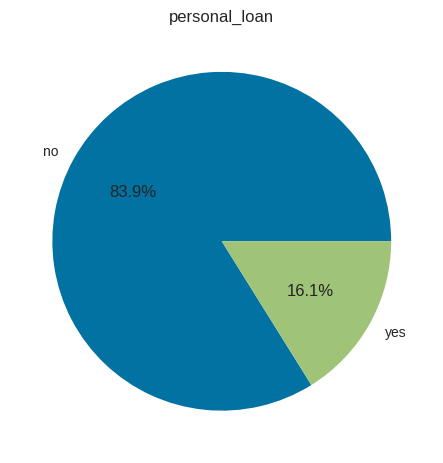

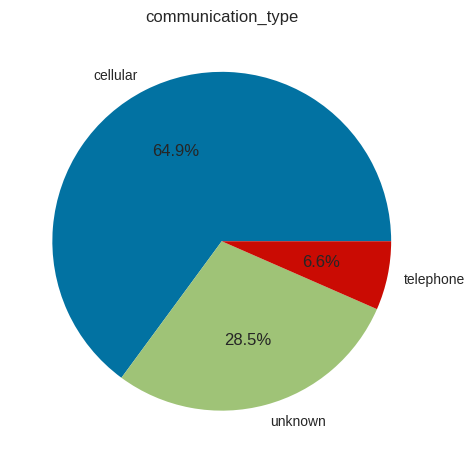

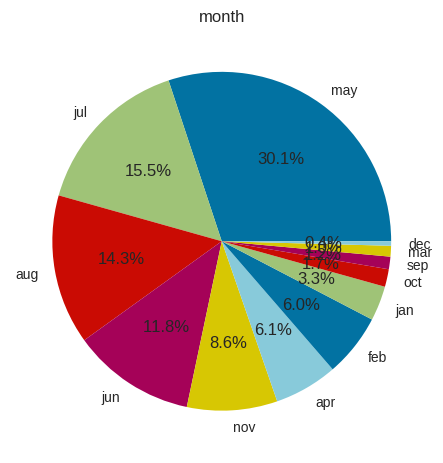

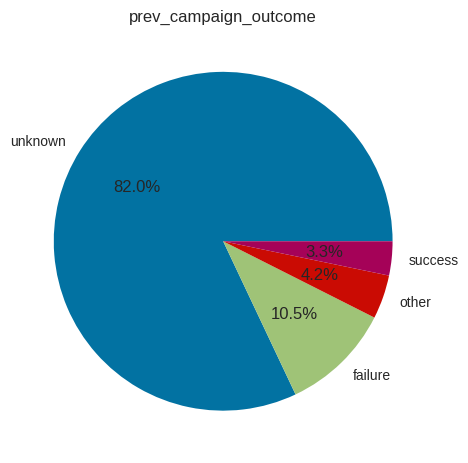

In [53]:
for i in cat:
  plt.pie(x=cat[i].value_counts(),labels=cat[i].value_counts().index,autopct='%1.1f%%')
  plt.title(i)
  plt.show()

categorical variables are showing a similar relation like train dataset

Check for missing values

In [54]:
num.isna().sum()

customer_age                          270
balance                               181
day_of_month                            0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
dtype: int64

lot of missing values in 'days since prev campaign contact' and hence will drop the column from Test data

In [55]:
test=dtest.copy()

In [56]:
test.drop('days_since_prev_campaign_contact', axis=1,inplace=True)

In [57]:
cat.isna().sum()

job_type                  0
marital                  81
education                 0
default                   0
housing_loan              0
personal_loan            74
communication_type        0
month                     0
prev_campaign_outcome     0
dtype: int64

Impute missing features using median and mode

In [58]:
test.head()

customer_age     job_type   marital  education default  balance  \
0          55.0      retired   married   tertiary      no   7136.0   
1          24.0  blue-collar    single  secondary      no    179.0   
2          46.0   technician  divorced  secondary      no    143.0   
3          56.0    housemaid    single    unknown      no   6023.0   
4          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   num_contacts_prev_campaign prev_campaign_outcome  
0                           0               unknown  
1                           0               unknown  
2                           0               unknown  
3                           0               unknown  
4                           1               success

In [59]:
dtest_new=test.copy()

In [60]:
dtest_new['customer_age'].fillna(dtest_new['customer_age'].median(),inplace=True)
dtest_new['balance'].fillna(dtest_new['balance'].median(),inplace=True)
dtest_new['last_contact_duration'].fillna(dtest_new['last_contact_duration'].median(),inplace=True)
dtest_new['num_contacts_in_campaign'].fillna(dtest_new['num_contacts_in_campaign'].median(),inplace=True)
dtest_new['marital'].fillna(dtest_new['marital'].mode()[0],inplace=True)
dtest_new['personal_loan'].fillna(dtest_new['personal_loan'].mode()[0],inplace=True)

In [61]:
dtest_new['num_contacts']=dtest_new['num_contacts_in_campaign']+dtest_new['num_contacts_prev_campaign']

In [62]:
dtest_new.drop('num_contacts_in_campaign',axis=1,inplace=True)
dtest_new.drop('num_contacts_prev_campaign',axis=1,inplace=True)

In [65]:
numerical_out=dtest_new[['balance']]

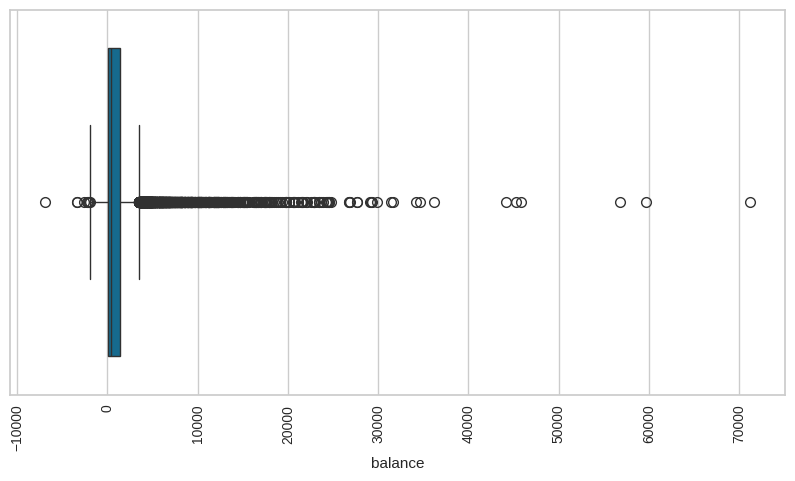

In [66]:
for i in numerical_out:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=i, data = dtest_new)
  plt.xticks(rotation=90)
  plt.show()

Handle outliers using IQR method

[7136.0, 6023.0, 3815.0, 5240.0, 3492.0, 10758.0, 6731.0, 4408.0, 19099.0, 5769.0, 6824.0, 3930.0, 5087.0, 5540.0, 6133.0, 16398.0, 5005.0, 7388.0, 6487.0, 5132.0, 4394.0, 4595.0, 8898.0, 3706.0, 4054.0, 5339.0, 4146.0, 3514.0, 5612.0, 7387.0, 3972.0, 6991.0, 6202.0, 7036.0, 9727.0, 4081.0, 15299.0, 4908.0, 3730.0, 8143.0, 26834.0, 3574.0, 7102.0, 6750.0, 3951.0, 4045.0, 16486.0, 10253.0, 3776.0, 3715.0, 5690.0, 45245.0, 3778.0, 5743.0, 10393.0, 8107.0, 8096.0, 9717.0, 7050.0, 4366.0, 4513.0, 5203.0, 5150.0, 5674.0, 4916.0, 9709.0, 3744.0, 8777.0, 3776.0, 5130.0, 6239.0, 26721.0, 6163.0, 14461.0, 4452.0, 7555.0, 3581.0, 10879.0, 11382.0, 14111.0, 17457.0, 5387.0, 8489.0, 12280.0, 3718.0, 3824.0, 3927.0, 6562.0, 5207.0, 8904.0, 4330.0, 5056.0, 6276.0, 6104.0, 3813.0, 4036.0, 5217.0, 3667.0, 4449.0, 4575.0, 4381.0, 3622.0, 10374.0, 15343.0, 5161.0, 6947.0, 5110.0, 4149.0, 7459.0, 4049.0, 4126.0, 7788.0, 4720.0, 4189.0, 5356.0, 3758.0, 4887.0, 4283.0, 3645.0, 20175.0, 5038.0, 5225.0, 4789

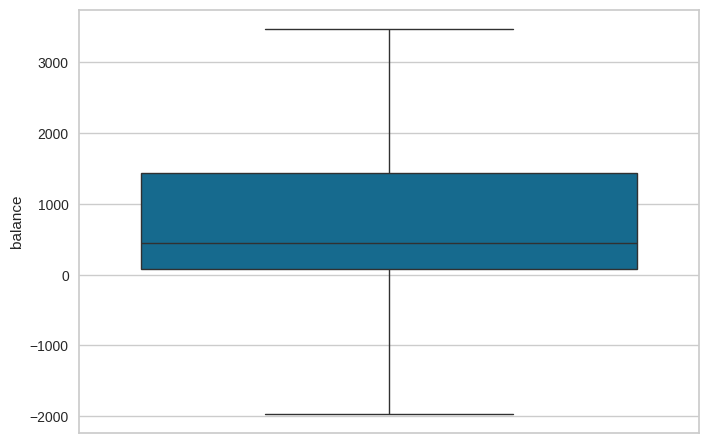

1.1037359119899657




In [67]:
for i in numerical_out:
  q1=dtest_new[i].quantile(0.25)
  q3=dtest_new[i].quantile(0.75)
  iqr=q3-q1
  low_lim=q1-(1.5*iqr)
  up_lim=q3+(1.5*iqr)
  outliers = []
  for h in dtest_new[i]:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
      dtest_new[i]=dtest_new[i].clip(lower=low_lim,upper=up_lim)
  sns.boxplot(dtest_new[i])
  print(outliers)
  plt.show()
  print(dtest_new[i].skew())
  print('\n')

In [68]:
dtrain_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             31647 non-null  float64
 1   job_type                 31647 non-null  object 
 2   marital                  31647 non-null  object 
 3   education                31647 non-null  object 
 4   default                  31647 non-null  object 
 5   balance                  31647 non-null  float64
 6   housing_loan             31647 non-null  object 
 7   personal_loan            31647 non-null  object 
 8   communication_type       31647 non-null  object 
 9   day_of_month             31647 non-null  int64  
 10  month                    31647 non-null  object 
 11  last_contact_duration    31647 non-null  float64
 12  prev_campaign_outcome    31647 non-null  object 
 13  term_deposit_subscribed  31647 non-null  int64  
 14  num_contacts          

In [69]:
dtest_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_age           13564 non-null  float64
 1   job_type               13564 non-null  object 
 2   marital                13564 non-null  object 
 3   education              13564 non-null  object 
 4   default                13564 non-null  object 
 5   balance                13564 non-null  float64
 6   housing_loan           13564 non-null  object 
 7   personal_loan          13564 non-null  object 
 8   communication_type     13564 non-null  object 
 9   day_of_month           13564 non-null  int64  
 10  month                  13564 non-null  object 
 11  last_contact_duration  13564 non-null  float64
 12  prev_campaign_outcome  13564 non-null  object 
 13  num_contacts           13564 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.4+ 

In [70]:
dtrain1=dtrain_out.copy()
dtest1=dtest_new.copy()

### **Encode all categorical variables in Train and Test Dataset**

Reducing the number of categories in job type and month

In [71]:
dtrain1['job_type'].nunique()

12

In [72]:
dtrain1['job_type']=dtrain1['job_type'].replace({'blue-collar':'professional','management':'professional','technician':'service','admin.':'service','services':'service',
                                 'self-employed':'entrepreneur','housemaid':'unemployed','student':'unemployed','retired':'unemployed','unknown':'unemployed'})


In [73]:
dtrain1['job_type'].value_counts()

job_type
professional    13482
service         11770
unemployed       4247
entrepreneur     2148
Name: count, dtype: int64

In [74]:
dtrain1['month']=dtrain1['month'].replace({'jan':'Q1','feb':'Q1','mar':'Q1','apr':'Q2','may':'Q2','jun':'Q2','jul':'Q3','aug':'Q3','sep':'Q3','oct':'Q4','nov':'Q4','dec':'Q4'})


In [75]:
dtrain1['month'].value_counts()

month
Q2    15542
Q3     9511
Q4     3467
Q1     3127
Name: count, dtype: int64

doing the same for Test data as well

In [76]:
dtest1['job_type']=dtest1['job_type'].replace({'blue-collar':'professional','management':'professional','technician':'service','admin.':'service','services':'service',
                                 'self-employed':'entrepreneur','housemaid':'unemployed','student':'unemployed','retired':'unemployed','unknown':'unemployed'})

In [77]:
dtest1['month']=dtest1['month'].replace({'jan':'Q1','feb':'Q1','mar':'Q1','apr':'Q2','may':'Q2','jun':'Q2','jul':'Q3','aug':'Q3','sep':'Q3','oct':'Q4','nov':'Q4','dec':'Q4'})

Will use One hot Encoding for the categorical features

In [78]:
X=pd.get_dummies(dtrain1,dtype=int)

In [79]:
X.head()

customer_age  balance  day_of_month  last_contact_duration  \
0          28.0    285.0            26                  303.0   
1          34.0    934.0            18                  143.0   
2          46.0    656.0             5                  101.0   
3          34.0      2.0            20                  127.0   
4          41.0   1352.0            13                   49.0   

   term_deposit_subscribed  num_contacts  job_type_entrepreneur  \
0                        0           4.0                      0   
1                        0           3.0                      0   
2                        0           4.0                      0   
3                        0           3.0                      0   
4                        0           2.0                      0   

   job_type_professional  job_type_service  job_type_unemployed  ...  \
0                      1                 0                    0  ...   
1                      1                 0                    0  ...   
2                      0                 1                    0  ...   
3                      0                 1                    0  ...   
4                      1                 0                    0  ...   

   communication_type_telephone  communication_type_unknown  month_Q1  \
0                             0                           1         0   
1                             0                           0         0   
2                             0                           0         1   
3                             0                           1         0   
4                             0                           0         0   

   month_Q2  month_Q3  month_Q4  prev_campaign_outcome_failure  \
0         1         0         0                              0   
1         0         0         1                              0   
2         0         0         0                              0   
3         1         0         0                              0   
4         1         0         0                              0   

   prev_campaign_outcome_other  prev_campaign_outcome_success  \
0                            0                              0   
1                            1                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   

   prev_campaign_outcome_unknown  
0                              1  
1                              0  
2                              1  
3                              1  
4                              1  

[5 rows x 34 columns]

In [80]:
Xtest=pd.get_dummies(dtest1,dtype=int)

In [81]:
Xtest.head()

customer_age   balance  day_of_month  last_contact_duration  num_contacts  \
0          55.0  3475.625            13                   90.0           2.0   
1          24.0   179.000            18                   63.0           2.0   
2          46.0   143.000             8                  208.0           1.0   
3          56.0  3475.625             6                   34.0           1.0   
4          62.0  2913.000            12                  127.0           2.0   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                      0                      0                 0   
1                      0                      1                 0   
2                      0                      0                 1   
3                      0                      0                 0   
4                      0                      0                 0   

   job_type_unemployed  marital_divorced  ...  communication_type_telephone  \
0                    1                 0  ...                             0   
1                    0                 0  ...                             0   
2                    0                 1  ...                             0   
3                    1                 0  ...                             0   
4                    1                 0  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           0         0         0         1         0   
1                           0         0         1         0         0   
2                           0         0         0         1         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              1  
2                              0                              1  
3                              0                              1  
4                              1                              0  

[5 rows x 33 columns]

Categorical Data is encoded and before scaling, target variable 'term_deposit_subscribed' to be omitted.

In [82]:
Xtrain=X.drop('term_deposit_subscribed',axis=1)

In [83]:
Xtrain.head()

customer_age  balance  day_of_month  last_contact_duration  num_contacts  \
0          28.0    285.0            26                  303.0           4.0   
1          34.0    934.0            18                  143.0           3.0   
2          46.0    656.0             5                  101.0           4.0   
3          34.0      2.0            20                  127.0           3.0   
4          41.0   1352.0            13                   49.0           2.0   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                      0                      1                 0   
1                      0                      1                 0   
2                      0                      0                 1   
3                      0                      0                 1   
4                      0                      1                 0   

   job_type_unemployed  marital_divorced  ...  communication_type_telephone  \
0                    0                 0  ...                             0   
1                    0                 0  ...                             0   
2                    0                 0  ...                             0   
3                    0                 0  ...                             0   
4                    0                 0  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           1         0         1         0         0   
1                           0         0         0         0         1   
2                           0         1         0         0         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              0  
2                              0                              1  
3                              0                              1  
4                              0                              1  

[5 rows x 33 columns]

In [84]:
Xtest.head()

customer_age   balance  day_of_month  last_contact_duration  num_contacts  \
0          55.0  3475.625            13                   90.0           2.0   
1          24.0   179.000            18                   63.0           2.0   
2          46.0   143.000             8                  208.0           1.0   
3          56.0  3475.625             6                   34.0           1.0   
4          62.0  2913.000            12                  127.0           2.0   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                      0                      0                 0   
1                      0                      1                 0   
2                      0                      0                 1   
3                      0                      0                 0   
4                      0                      0                 0   

   job_type_unemployed  marital_divorced  ...  communication_type_telephone  \
0                    1                 0  ...                             0   
1                    0                 0  ...                             0   
2                    0                 1  ...                             0   
3                    1                 0  ...                             0   
4                    1                 0  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           0         0         0         1         0   
1                           0         0         1         0         0   
2                           0         0         0         1         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              1  
2                              0                              1  
3                              0                              1  
4                              1                              0  

[5 rows x 33 columns]

Normalize the data using Standard Scaler

In [85]:
sc=StandardScaler()
train_sc=sc.fit_transform(Xtrain)
test_sc=sc.transform(Xtest)

In [86]:
train_sc=pd.DataFrame(train_sc, columns=Xtrain.columns)
test_sc=pd.DataFrame(test_sc, columns=Xtest.columns)

In [87]:
train_sc.head()

customer_age   balance  day_of_month  last_contact_duration  num_contacts  \
0     -1.165641 -0.549689      1.223313               0.186545      0.160462   
1     -0.602124  0.014888      0.262103              -0.440834     -0.092434   
2      0.524910 -0.226949     -1.299864              -0.605521      0.160462   
3     -0.602124 -0.795875      0.502405              -0.503572     -0.092434   
4      0.055312  0.378514     -0.338654              -0.809419     -0.345329   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0              -0.269844               1.160755         -0.769507   
1              -0.269844               1.160755         -0.769507   
2              -0.269844              -0.861508          1.299533   
3              -0.269844              -0.861508          1.299533   
4              -0.269844               1.160755         -0.769507   

   job_type_unemployed  marital_divorced  ...  communication_type_telephone  \
0              -0.3937         -0.363581  ...                     -0.260839   
1              -0.3937         -0.363581  ...                     -0.260839   
2              -0.3937         -0.363581  ...                     -0.260839   
3              -0.3937         -0.363581  ...                     -0.260839   
4              -0.3937         -0.363581  ...                     -0.260839   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                    1.567900 -0.331123  1.017951 -0.655486 -0.350757   
1                   -0.637796 -0.331123 -0.982365 -0.655486  2.850976   
2                   -0.637796  3.020027 -0.982365 -0.655486 -0.350757   
3                    1.567900 -0.331123  1.017951 -0.655486 -0.350757   
4                   -0.637796 -0.331123  1.017951 -0.655486 -0.350757   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                      -0.351041                    -0.204638   
1                      -0.351041                     4.886688   
2                      -0.351041                    -0.204638   
3                      -0.351041                    -0.204638   
4                      -0.351041                    -0.204638   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                      -0.187066                       0.474406  
1                      -0.187066                      -2.107900  
2                      -0.187066                       0.474406  
3                      -0.187066                       0.474406  
4                      -0.187066                       0.474406  

[5 rows x 33 columns]

In [88]:
test_sc.head()

customer_age   balance  day_of_month  last_contact_duration  num_contacts  \
0      1.370185  2.225894     -0.338654              -0.648653     -0.345329   
1     -1.541318 -0.641900      0.262103              -0.754524     -0.345329   
2      0.524910 -0.673217     -0.939410              -0.185961     -0.598225   
3      1.464104  2.225894     -1.179713              -0.868236     -0.598225   
4      2.027621  1.736457     -0.458805              -0.503572     -0.345329   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0              -0.269844              -0.861508         -0.769507   
1              -0.269844               1.160755         -0.769507   
2              -0.269844              -0.861508          1.299533   
3              -0.269844              -0.861508         -0.769507   
4              -0.269844              -0.861508         -0.769507   

   job_type_unemployed  marital_divorced  ...  communication_type_telephone  \
0             2.540003         -0.363581  ...                     -0.260839   
1            -0.393700         -0.363581  ...                     -0.260839   
2            -0.393700          2.750421  ...                     -0.260839   
3             2.540003         -0.363581  ...                     -0.260839   
4             2.540003         -0.363581  ...                     -0.260839   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                   -0.637796 -0.331123 -0.982365  1.525585 -0.350757   
1                   -0.637796 -0.331123  1.017951 -0.655486 -0.350757   
2                   -0.637796 -0.331123 -0.982365  1.525585 -0.350757   
3                    1.567900 -0.331123  1.017951 -0.655486 -0.350757   
4                   -0.637796 -0.331123  1.017951 -0.655486 -0.350757   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                      -0.351041                    -0.204638   
1                      -0.351041                    -0.204638   
2                      -0.351041                    -0.204638   
3                      -0.351041                    -0.204638   
4                      -0.351041                    -0.204638   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                      -0.187066                       0.474406  
1                      -0.187066                       0.474406  
2                      -0.187066                       0.474406  
3                      -0.187066                       0.474406  
4                       5.345712                      -2.107900  

[5 rows x 33 columns]

**Before Cluster Analysis : Will check if test dataset correctly predicts whether a customer will opt for Term deposit or not.**

In [89]:
y=X['term_deposit_subscribed']

In [90]:
X_train,X_test,y_train,y_test=train_test_split(train_sc,y,random_state=42)

will use Logistic Regression

In [91]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

In [92]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [93]:
log_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [94]:
confusion_matrix(y_test,log_pred)

array([[6933,  169],
       [ 504,  306]])

In [95]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='macro'))
print('Recall:',recall_score(y_test,log_pred,average='macro'))
print('F1:',f1_score(y_test,log_pred,average='macro'))

Accuracy: 0.9149393326592518
Precision: 0.7882206322583385
Recall: 0.6769908320035045
F1: 0.7149876502834319


will use the Test Dataset for prediction and check the results



In [96]:
log_pred_test=log_reg.predict(test_sc)
log_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [97]:
numpy.set_printoptions(threshold = False)

In [98]:
dtest_pred=dtest.copy()

In [99]:
dtest_pred['subscription']=log_pred_test

In [100]:
dtest_pred.head()

customer_age     job_type   marital  education default  balance  \
0          55.0      retired   married   tertiary      no   7136.0   
1          24.0  blue-collar    single  secondary      no    179.0   
2          46.0   technician  divorced  secondary      no    143.0   
3          56.0    housemaid    single    unknown      no   6023.0   
4          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                               NaN                           0   
2                               NaN                           0   
3                               NaN                           0   
4                             188.0                           1   

  prev_campaign_outcome  subscription  
0               unknown             0  
1               unknown             0  
2               unknown             0  
3               unknown             0  
4               success             1

In [101]:
dtest_pred['subscription'].value_counts()/len(dtest_new)*100

subscription
0    93.740784
1     6.259216
Name: count, dtype: float64

As per Logistic Regression prediction on test dataset, 93% are not likely to subscribe for Term Deposits and only 6.25 % customers are likely to opt for Term Deposits.

In [102]:
dtest_pred[dtest_pred['subscription']==1].head()

customer_age    job_type  marital  education default  balance  \
4           62.0     retired  married  secondary      no   2913.0   
29          79.0     retired  married    primary      no    154.0   
36          66.0     retired  married   tertiary      no   1969.0   
62          40.0  technician  married  secondary      no   6731.0   
76          27.0     student   single   tertiary      no    252.0   

   housing_loan personal_loan communication_type  day_of_month month  \
4            no            no           cellular            12   apr   
29           no            no          telephone            12   mar   
36           no            no          telephone             2   feb   
62           no            no           cellular            25   nov   
76           no            no           cellular             4   may   

    last_contact_duration  num_contacts_in_campaign  \
4                   127.0                       1.0   
29                  275.0                       1.0   
36                  102.0                       1.0   
62                  235.0                       1.0   
76                  615.0                       1.0   

    days_since_prev_campaign_contact  num_contacts_prev_campaign  \
4                              188.0                           1   
29                              93.0                           2   
36                             287.0                           3   
62                              96.0                           4   
76                               NaN                           0   

   prev_campaign_outcome  subscription  
4                success             1  
29               success             1  
36               success             1  
62               success             1  
76               unknown             1

## **Cluster Analysis**

**Using the scaled train dataset for Kmeans Clustering**

In [103]:
Y=train_sc.values

In [104]:
Y

array([[-1.16564059, -0.54968858,  1.22331334, ..., -0.20463759,
        -0.18706582,  0.47440591],
       [-0.60212384,  0.01488838,  0.26210278, ...,  4.88668773,
        -0.18706582, -2.10789954],
       [ 0.52490968, -0.2269489 , -1.29986439, ..., -0.20463759,
        -0.18706582,  0.47440591],
       ...,
       [ 0.05531238, -0.58709507,  0.86285938, ..., -0.20463759,
        -0.18706582,  0.47440591],
       [ 0.71274859,  1.55029414, -0.57895647, ..., -0.20463759,
        -0.18706582,  0.47440591],
       [-0.226446  ,  0.11144931,  0.26210278, ..., -0.20463759,
        -0.18706582,  0.47440591]])

In [108]:
!pip install yellowbrick

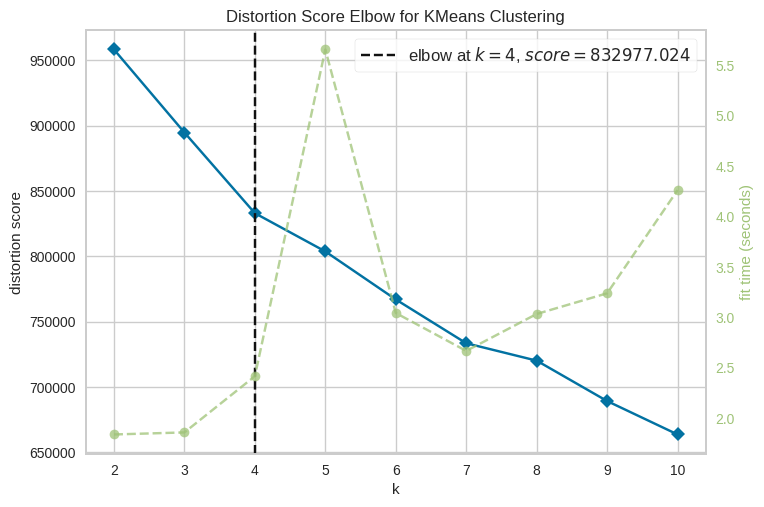

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(Y)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(Y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [110]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(Y)
silhouette_score_avg=silhouette_score(Y,y_kmeans)
silhouette_score_avg

0.10511855078987627

Using all features with label and one hot encoding, with outliers treated, scaled using Standard Scaler, the result from kMeans is not satisfactory. The silhouette score is 0.105

**Using PCA to reduce the dimensions**

In [111]:
from sklearn.decomposition import PCA
pca=PCA().fit(train_sc)

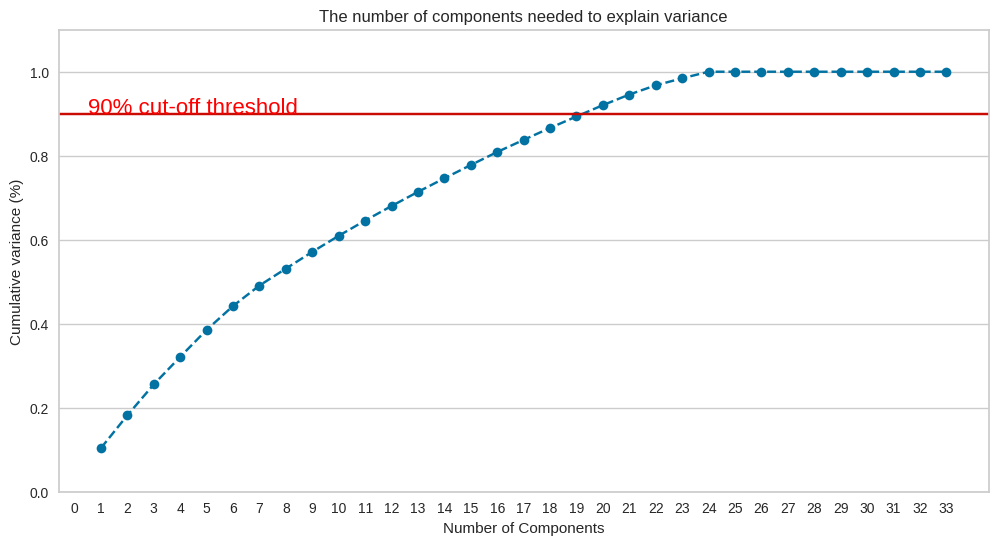

In [113]:
# to find the optimal number of components
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 34, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 34, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [114]:
# optimum components as 18
pca=PCA(n_components=18)
pca.fit(train_sc)
x_pca=pca.transform(train_sc)

In [115]:
x_pca

array([[-2.37713363e+00, -9.44444082e-02, -1.47453882e+00, ...,
         1.18844130e-01, -2.02602415e-01, -4.79803109e-01],
       [ 1.98443699e+00,  1.64532389e+00,  4.79129941e-01, ...,
        -3.64016216e+00,  9.22725090e-01, -3.86816354e-01],
       [ 1.52454366e+00,  4.09500036e-01,  9.44795069e-01, ...,
        -4.37199070e-01, -1.01838554e+00,  1.62692637e-01],
       ...,
       [-2.37277817e+00, -2.31977966e+00, -7.76146951e-01, ...,
        -6.51715221e-01, -1.42168944e+00,  8.89367804e-02],
       [ 1.89762788e+00, -3.12508251e-01,  1.38599802e+00, ...,
        -9.85533452e-02,  4.99547895e-01,  1.02137750e+00],
       [ 2.40960032e+00,  5.53849087e-01,  5.17162152e-01, ...,
        -1.26071475e-03, -1.59767665e-01,  1.51428657e+00]])

In [116]:
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

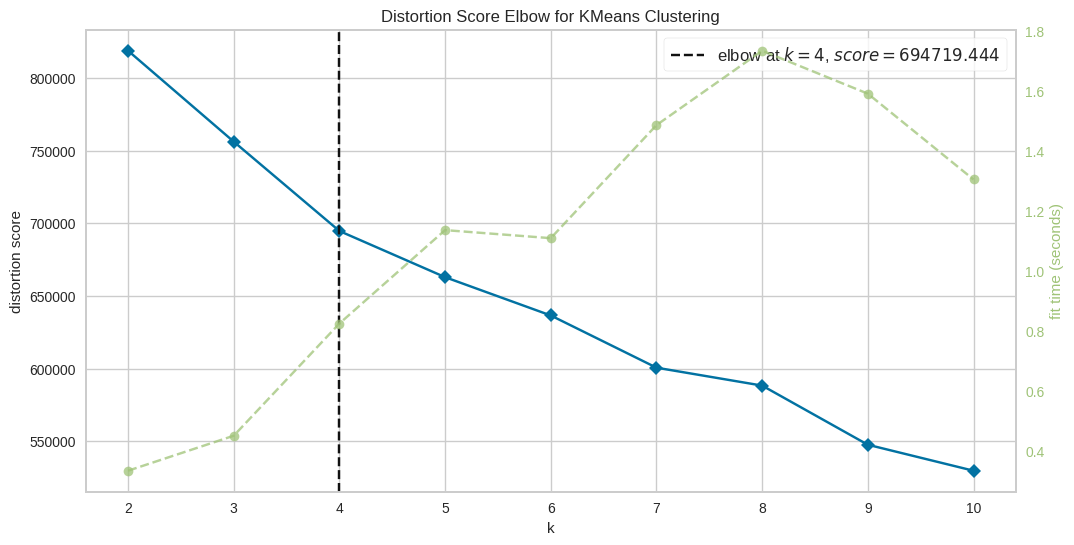

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(x_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [118]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)

In [119]:
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(x_pca,y_kmeans)
silhouette_score_avg

0.1243571250387254

Silhouette score has improved to 0.124

**DBSCAN Clustering**

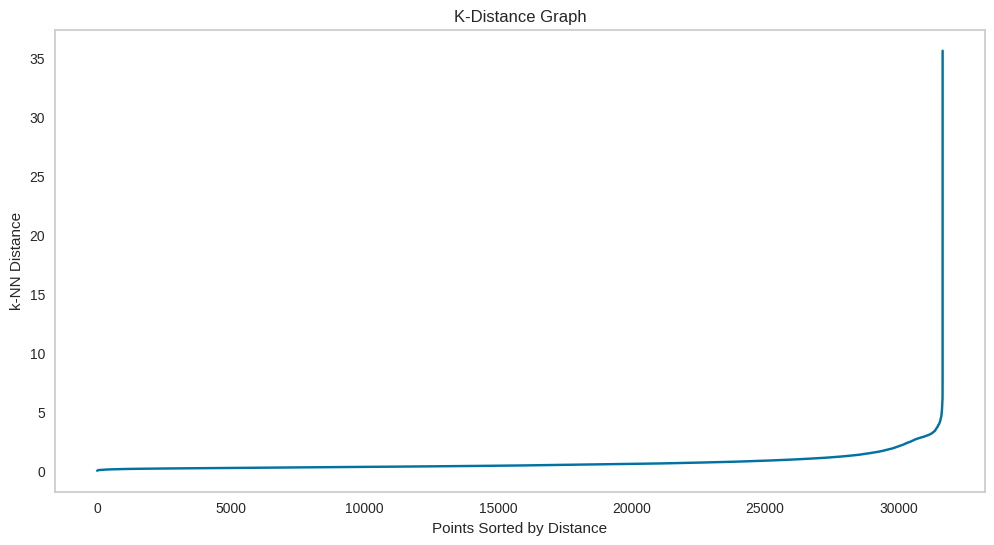

In [120]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=34)
model = knn.fit(x_pca)
distances, indices = knn.kneighbors(x_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(axis='both')
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [126]:
db = DBSCAN(eps=4, min_samples=36).fit(x_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  4
Number of Outliers :  944


In [127]:
score = silhouette_score(x_pca, labels)
print(score)

0.17843687947568831


Using DBSCAN a result of 4 clusters and silhouette score of 0.178 is better than kMeans score but not satisfactory. will use other preprocessing methods to improve the accuracy.

In [128]:
train2=train.copy()

In [129]:
num_train=train2.select_dtypes(include=['int64','float64'])

In [130]:
num_train.skew()

customer_age                   0.676055
balance                        8.555899
day_of_month                   0.091909
last_contact_duration          3.185937
num_contacts_in_campaign       5.009996
num_contacts_prev_campaign    45.833007
term_deposit_subscribed        2.538727
dtype: float64

In [131]:
num_train.drop('term_deposit_subscribed',axis=1,inplace=True)

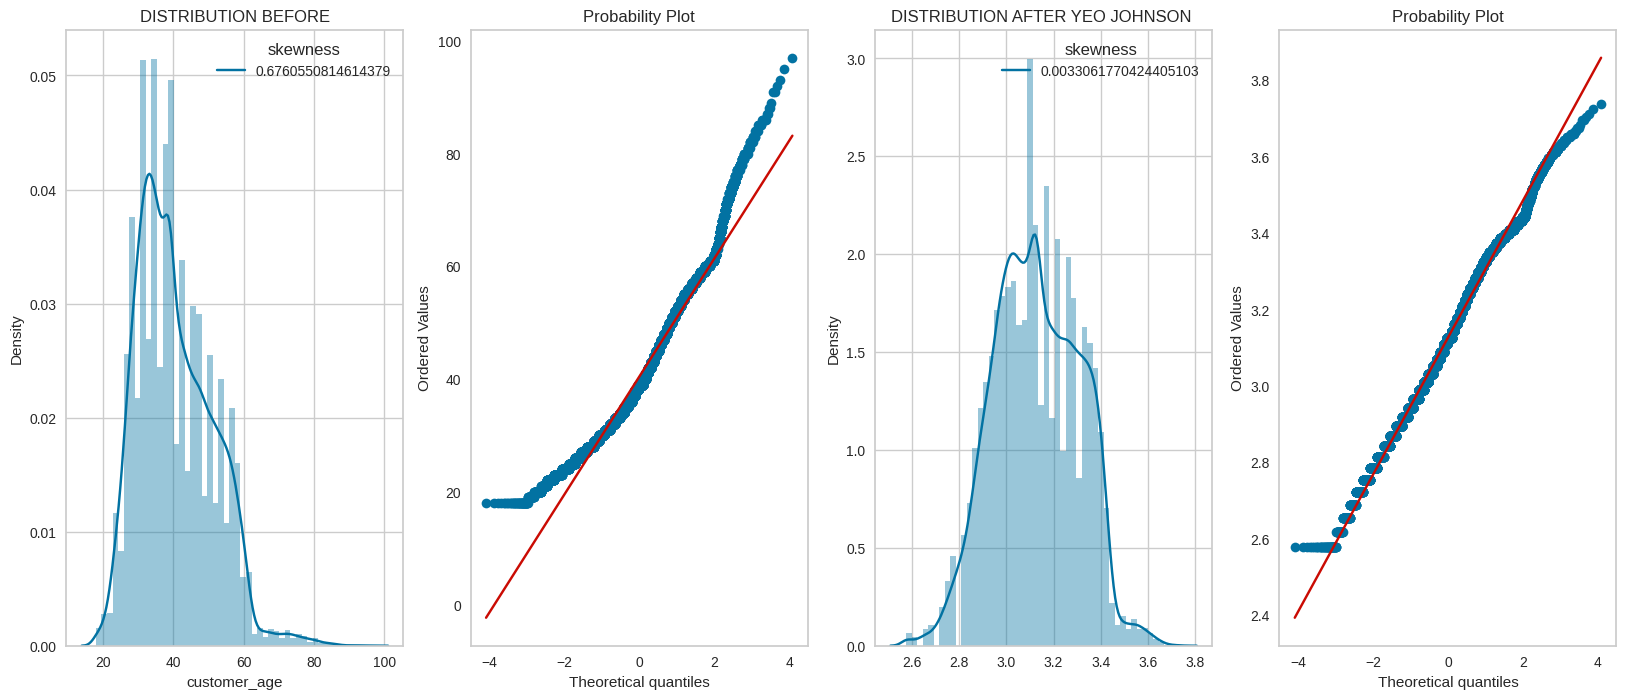

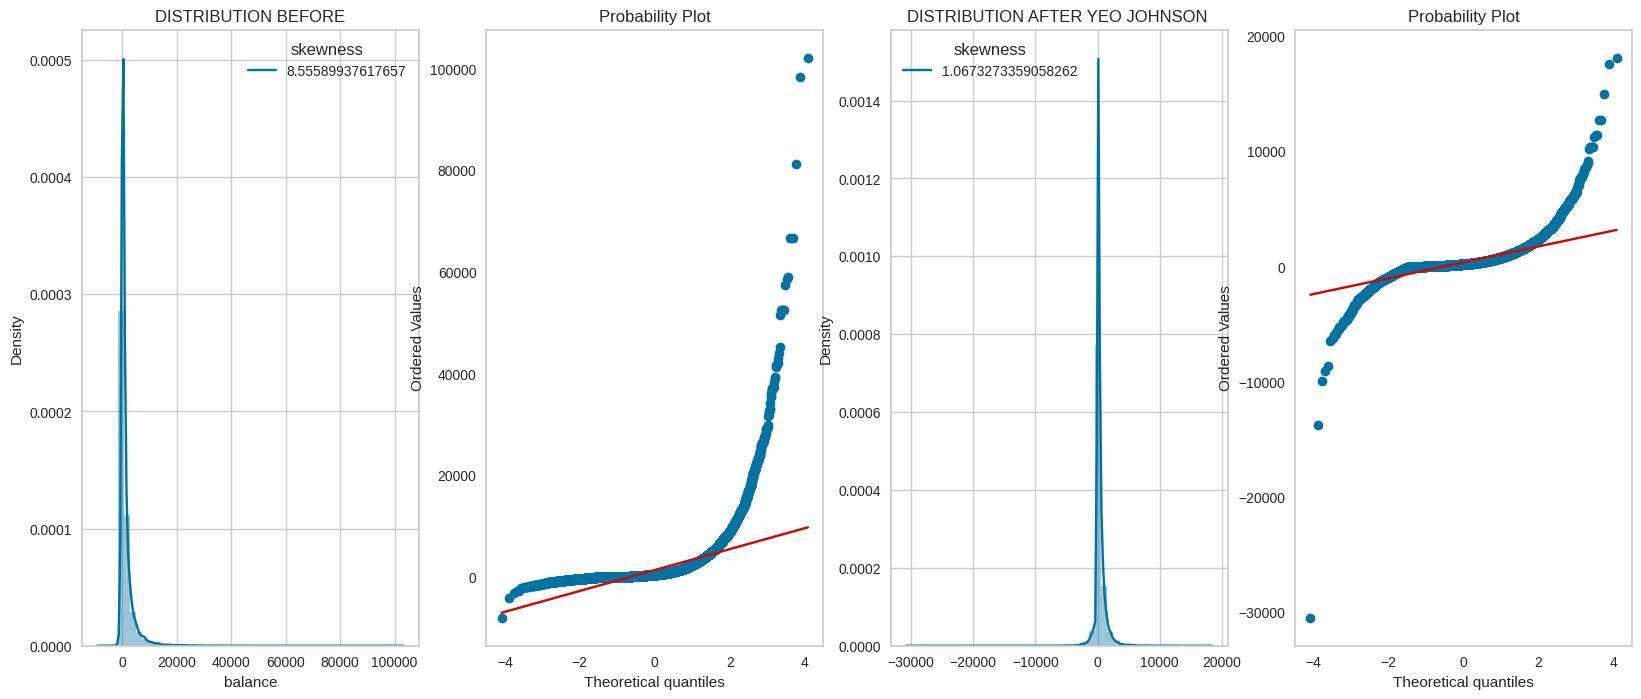

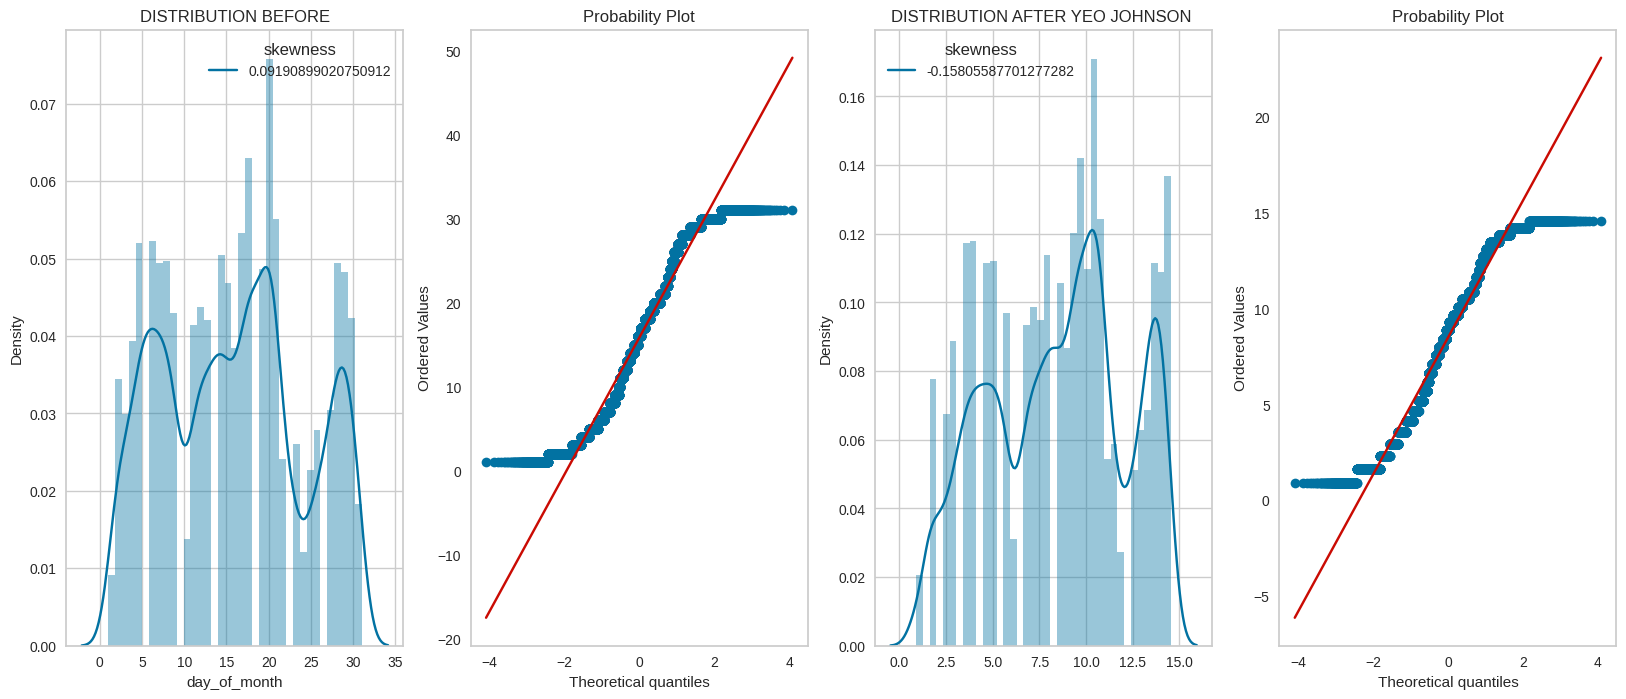

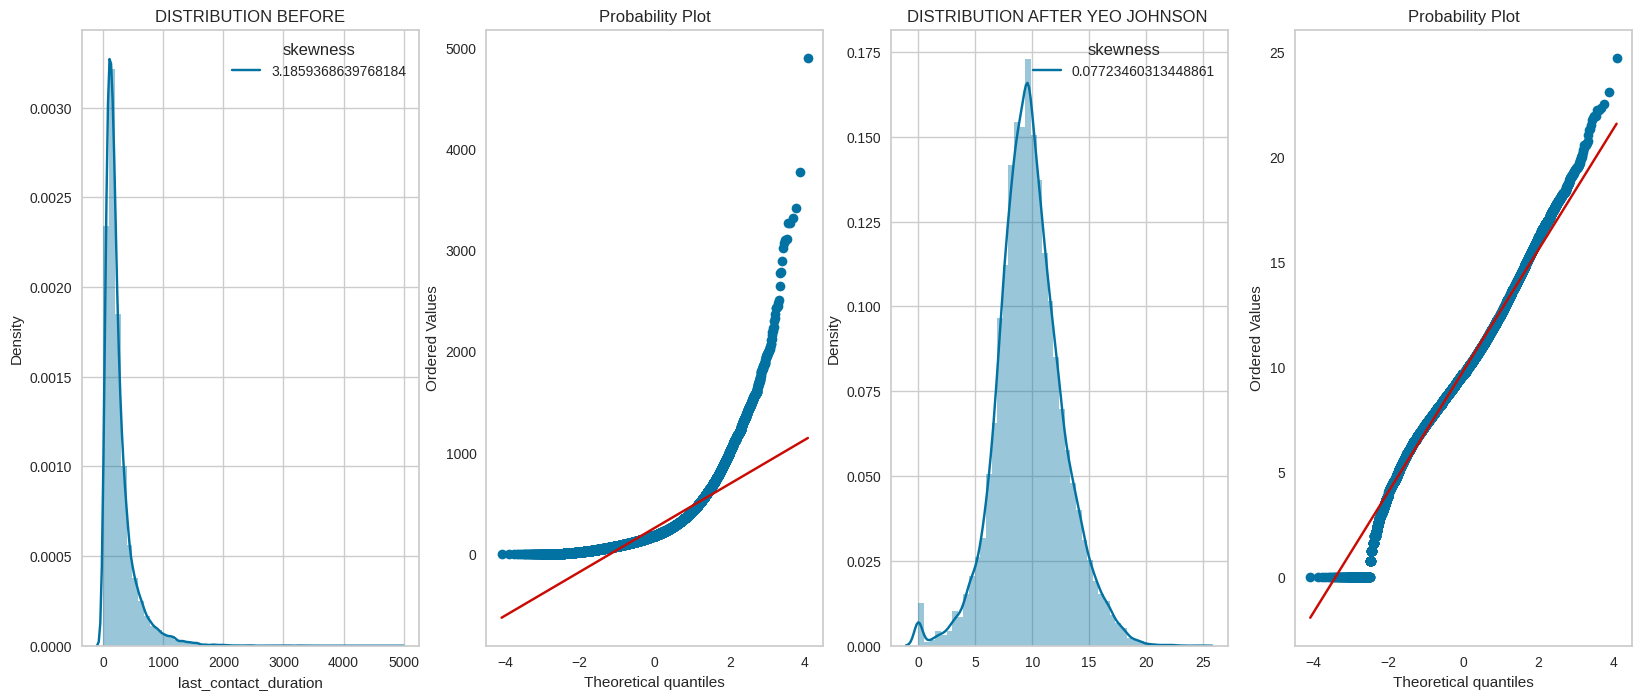

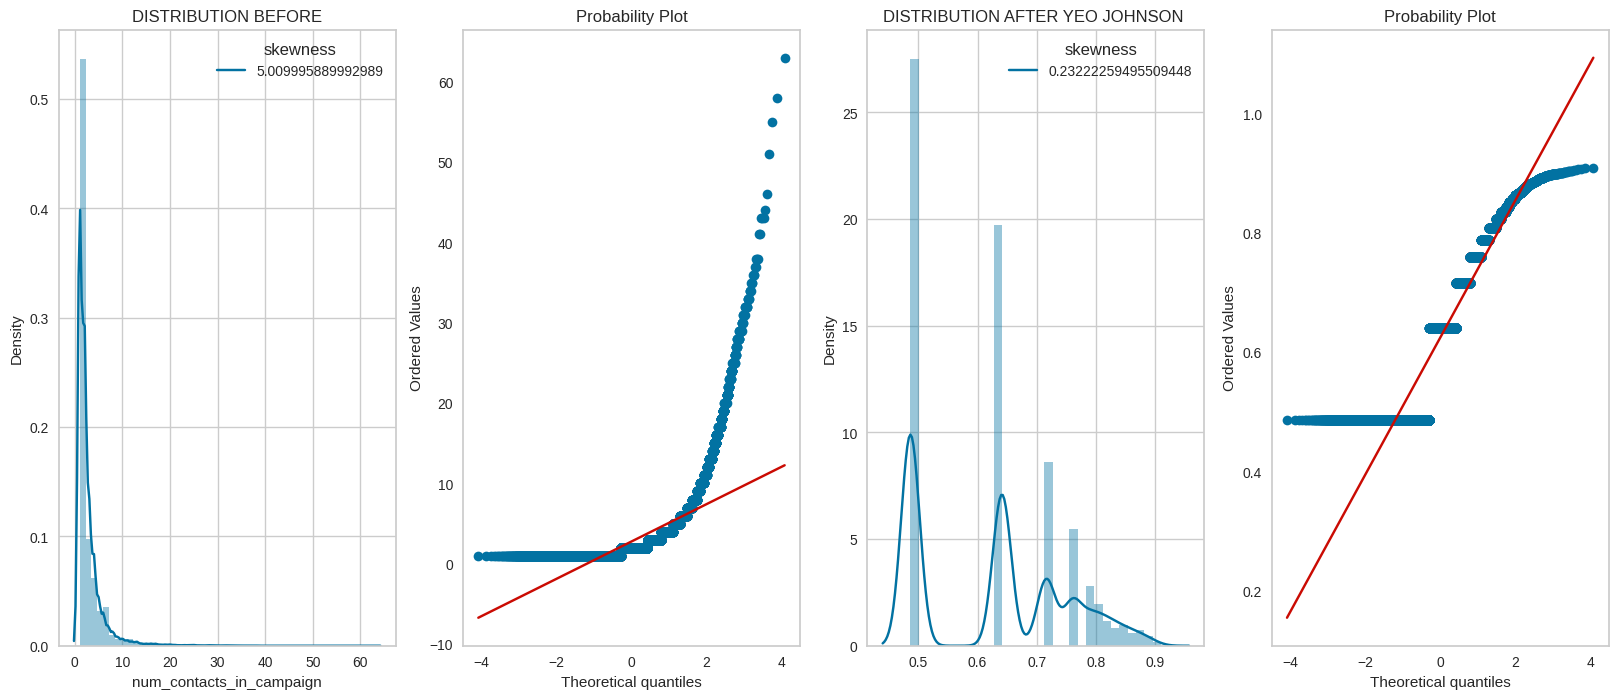

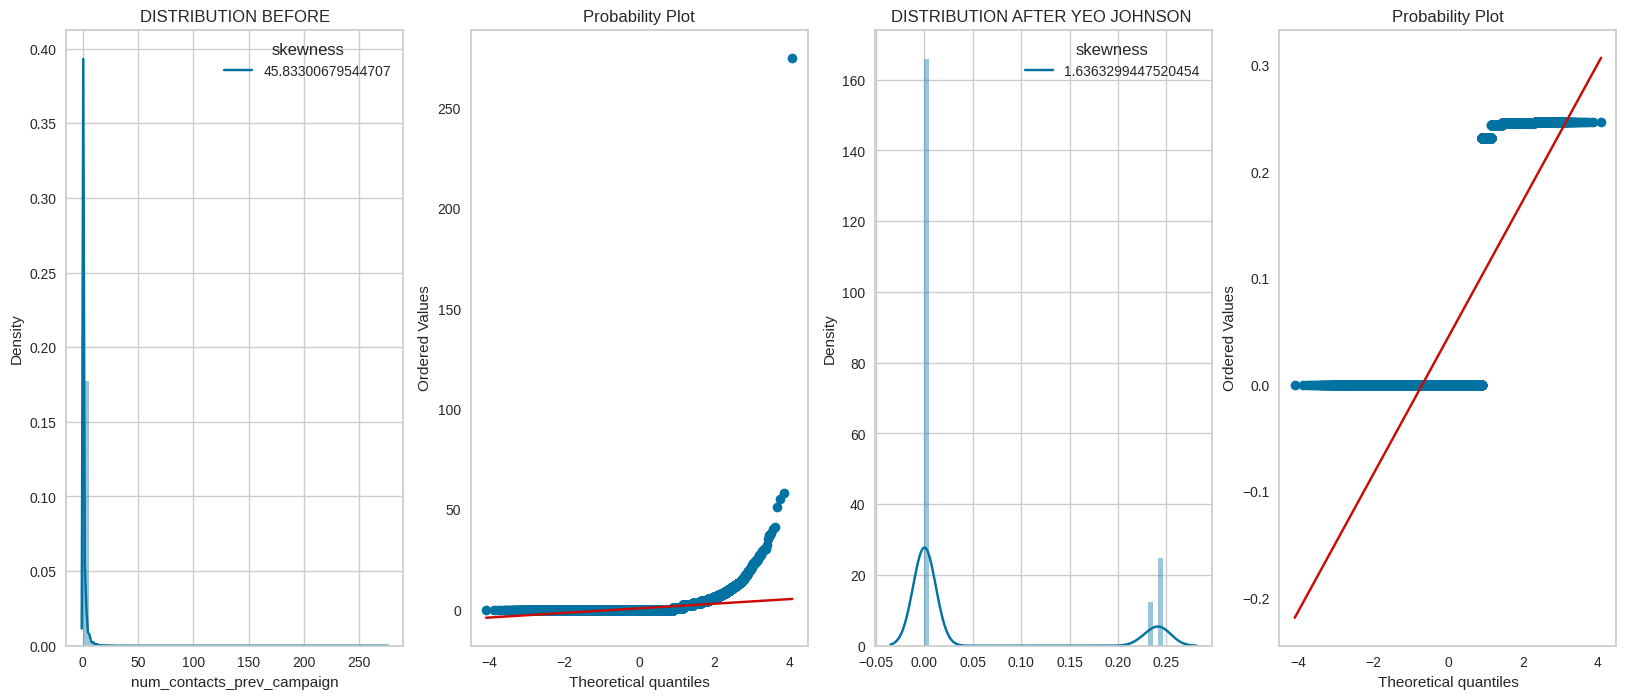

In [132]:
for i in num_train:
  plt.figure(figsize=(20,8))

  plt.subplot(1,4,1)
  sns.distplot(train2[i])
  plt.title("DISTRIBUTION BEFORE",)
  skewness=str(train2[i].skew())
  plt.legend([skewness],title=("skewness"))


  plt.subplot(1,4,2)
  stats.probplot(train2[i],dist="norm",plot=plt)
  plt.grid()

  plt.subplot(1,4,3)
  yf_target, lam = yeojohnson(train2[i])
  sns.distplot(yf_target)
  plt.title("DISTRIBUTION AFTER YEO JOHNSON ",)
  series=pd.Series(yf_target)
  skewness=str(series.skew())
  plt.legend([skewness],title=("skewness"))
  #plt.show()

  plt.subplot(1,4,4)
  stats.probplot(yf_target,dist="norm",plot=plt)
  plt.grid()

In [133]:
for i in num_train:
  train2[i],lam=yeojohnson(train2[i])
  print('skewness in',i, train2[i].skew())

skewness in customer_age 0.0033061770424405103
skewness in balance 1.0673273359058262
skewness in day_of_month -0.15805587701277282
skewness in last_contact_duration 0.07723460313448861
skewness in num_contacts_in_campaign 0.23222259495509448
skewness in num_contacts_prev_campaign 1.6363299447520454


In [134]:
train2.head()

customer_age     job_type  marital  education default     balance  \
0      2.894034   management   single   tertiary      no  133.156681   
1      3.030637  blue-collar  married  secondary      no  359.810006   
2      3.240064   technician  married  secondary      no  267.735611   
3      3.030637     services   single  secondary      no    1.798893   
4      3.160831  blue-collar  married    primary      no  490.195818   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown     12.769694   jun   
1           no           yes           cellular      9.691952   nov   
2           no            no           cellular      3.558382   feb   
3          yes            no            unknown     10.493434   may   
4          yes            no           cellular      7.564126   may   

   last_contact_duration  num_contacts_in_campaign  \
0              11.381163                  0.759899   
1               8.977898                  0.641189   
2               7.994340                  0.759899   
3               8.633593                  0.716008   
4               6.181308                  0.641189   

   num_contacts_prev_campaign prev_campaign_outcome  term_deposit_subscribed  
0                    0.000000               unknown                        0  
1                    0.231392                 other                        0  
2                    0.000000               unknown                        0  
3                    0.000000               unknown                        0  
4                    0.000000               unknown                        0

In [135]:
train2['job_type']=train2['job_type'].replace({'blue-collar':'professional','management':'professional','technician':'service','admin.':'service','services':'service',
                                 'self-employed':'entrepreneur','housemaid':'unemployed','student':'unemployed','retired':'unemployed','unknown':'unemployed'})
train2['month']=train2['month'].replace({'jan':'Q1','feb':'Q1','mar':'Q1','apr':'Q2','may':'Q2','jun':'Q2','jul':'Q3','aug':'Q3','sep':'Q3','oct':'Q4','nov':'Q4','dec':'Q4'})

In [136]:
X1=pd.get_dummies(train2,dtype=int)

In [137]:
X1.head()

customer_age     balance  day_of_month  last_contact_duration  \
0      2.894034  133.156681     12.769694              11.381163   
1      3.030637  359.810006      9.691952               8.977898   
2      3.240064  267.735611      3.558382               7.994340   
3      3.030637    1.798893     10.493434               8.633593   
4      3.160831  490.195818      7.564126               6.181308   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                  0.759899                    0.000000   
1                  0.641189                    0.231392   
2                  0.759899                    0.000000   
3                  0.716008                    0.000000   
4                  0.641189                    0.000000   

   term_deposit_subscribed  job_type_entrepreneur  job_type_professional  \
0                        0                      0                      1   
1                        0                      0                      1   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      1   

   job_type_service  ...  communication_type_telephone  \
0                 0  ...                             0   
1                 0  ...                             0   
2                 1  ...                             0   
3                 1  ...                             0   
4                 0  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           1         0         1         0         0   
1                           0         0         0         0         1   
2                           0         1         0         0         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              0  
2                              0                              1  
3                              0                              1  
4                              0                              1  

[5 rows x 35 columns]

In [138]:
X1.drop('term_deposit_subscribed',axis=1,inplace=True)

In [139]:
mm=MinMaxScaler()
X1_mm=mm.fit_transform(X1)
X1_mm=pd.DataFrame(X1_mm, columns=X1.columns)

In [140]:
X1_mm.head()

customer_age   balance  day_of_month  last_contact_duration  \
0      0.272421  0.629882      0.869682               0.460527   
1      0.390196  0.634544      0.644361               0.363282   
2      0.570758  0.632650      0.195324               0.323483   
3      0.390196  0.627180      0.703037               0.349350   
4      0.502445  0.637226      0.488583               0.250120   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                  0.645646                    0.000000   
1                  0.364935                    0.940176   
2                  0.645646                    0.000000   
3                  0.541858                    0.000000   
4                  0.364935                    0.000000   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                    0.0                    1.0               0.0   
1                    0.0                    1.0               0.0   
2                    0.0                    0.0               1.0   
3                    0.0                    0.0               1.0   
4                    0.0                    1.0               0.0   

   job_type_unemployed  ...  communication_type_telephone  \
0                  0.0  ...                           0.0   
1                  0.0  ...                           0.0   
2                  0.0  ...                           0.0   
3                  0.0  ...                           0.0   
4                  0.0  ...                           0.0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                         1.0       0.0       1.0       0.0       0.0   
1                         0.0       0.0       0.0       0.0       1.0   
2                         0.0       1.0       0.0       0.0       0.0   
3                         1.0       0.0       1.0       0.0       0.0   
4                         0.0       0.0       1.0       0.0       0.0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                            0.0                          0.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                            0.0                            1.0  
1                            0.0                            0.0  
2                            0.0                            1.0  
3                            0.0                            1.0  
4                            0.0                            1.0  

[5 rows x 34 columns]

In [141]:
Y1=X1_mm.values

In [142]:
pca=PCA().fit(Y1)

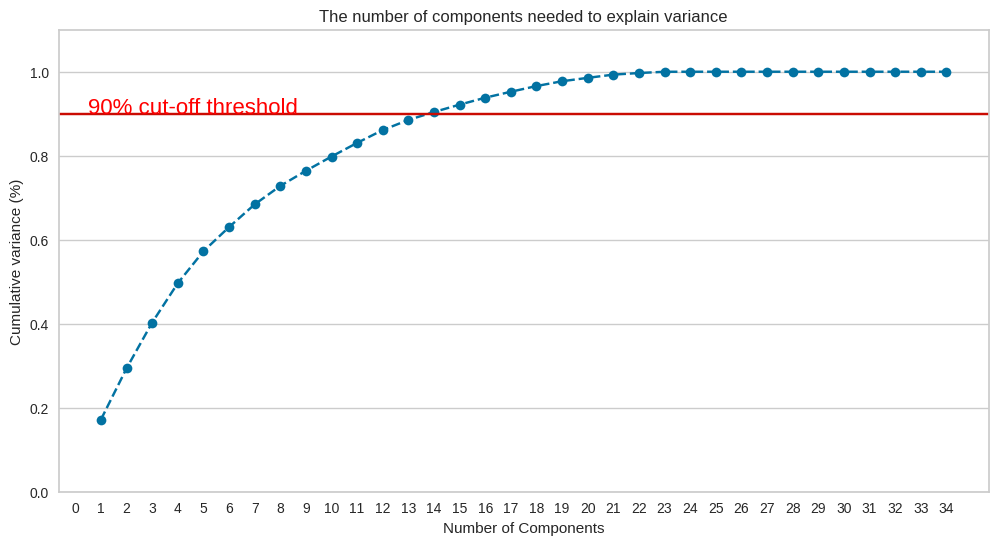

In [143]:
# to find the optimal number of components
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 35, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [144]:
pca=PCA(n_components=12)
pca.fit(Y1)
x_pca=pca.transform(Y1)

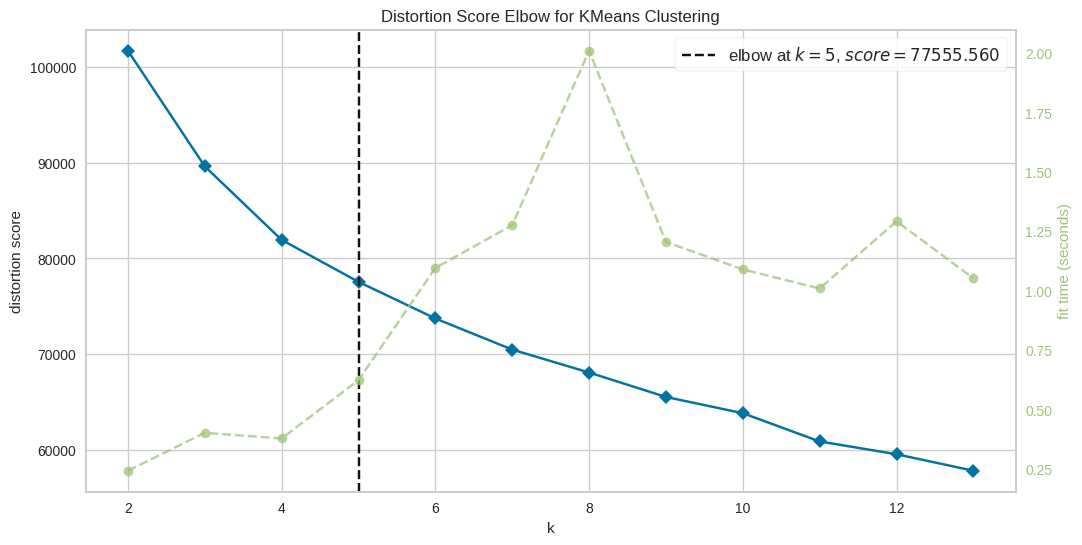

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [145]:
wcss=[]
for i in range(2,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(2,14))

visualizer.fit(x_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [146]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)
silhouette_score_avg=silhouette_score(x_pca,y_kmeans)
silhouette_score_avg

0.15721649087887482

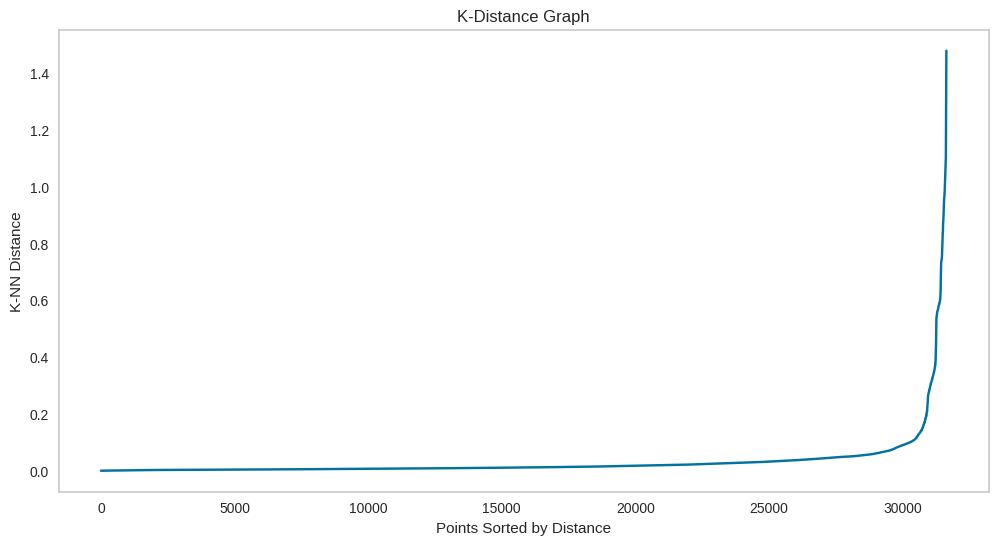

In [152]:
knn = NearestNeighbors(n_neighbors = 34)
model = knn.fit(x_pca)
distances, indices = knn.kneighbors(x_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('K-NN Distance')
plt.title('K-Distance Graph');

In [168]:
db = DBSCAN(eps=0.15, min_samples=24).fit(x_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  255
Number of Outliers :  8958


In [169]:
score = silhouette_score(x_pca, labels)
print(score)

0.444099774373417


Power Transformer with MinMaxScaler and using all features with PCA has given better score but not a satisfactory result. Reducing the number of features is improving the score.

It is considered better to omit categorical variables because all the clustering algorithms work well with numerical distances and numerical features depict a better approach to clustering.  

In [170]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31028 non-null  float64
 1   job_type                          31647 non-null  object 
 2   marital                           31497 non-null  object 
 3   education                         31647 non-null  object 
 4   default                           31647 non-null  object 
 5   balance                           31248 non-null  float64
 6   housing_loan                      31647 non-null  object 
 7   personal_loan                     31498 non-null  object 
 8   communication_type                31647 non-null  object 
 9   day_of_month                      31647 non-null  int64  
 10  month                             31647 non-null  object 
 11  last_contact_duration             31336 non-null  float64
 12  num_

**Using only the numerical features for clustering**

In [171]:
df=dtrain.select_dtypes(include=['int64','float64'])

In [172]:
df.isna().sum()

customer_age                          619
balance                               399
day_of_month                            0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
term_deposit_subscribed                 0
dtype: int64

In [173]:
df.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [174]:
df.drop('term_deposit_subscribed',axis=1,inplace=True)

In [175]:
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)
df['balance'].fillna(df['balance'].median(),inplace=True)
df['last_contact_duration'].fillna(df['last_contact_duration'].median(),inplace=True)
df['num_contacts_in_campaign'].fillna(df['num_contacts_in_campaign'].median(),inplace=True)

Removing day of month since it is just a date and the value of date should not affect the scaling.

In [176]:
df.drop('day_of_month',axis=1,inplace=True)

In [177]:
df.describe()

customer_age        balance  last_contact_duration  \
count  31647.000000   31647.000000           31647.000000   
mean      40.411066    1356.524599             255.425538   
std       10.647589    3067.545042             255.033242   
min       18.000000   -8020.000000               0.000000   
25%       32.000000      75.000000             103.000000   
50%       39.000000     449.000000             179.000000   
75%       48.000000    1394.000000             313.000000   
max       97.000000  102128.000000            4900.000000   

       num_contacts_in_campaign  num_contacts_prev_campaign  
count              31647.000000                31647.000000  
mean                   2.773881                    0.591620  
std                    3.148046                    2.499675  
min                    1.000000                    0.000000  
25%                    1.000000                    0.000000  
50%                    2.000000                    0.000000  
75%                    3.000000                    0.000000  
max                   63.000000                  275.000000

In [178]:
df.skew()

customer_age                   0.676055
balance                        8.555899
last_contact_duration          3.185937
num_contacts_in_campaign       5.009996
num_contacts_prev_campaign    45.833007
dtype: float64

In [179]:
for i in df.columns:
  df[i],lam=yeojohnson(df[i])
  print('skewness in',i, df[i].skew())

skewness in customer_age 0.0033061770424405103
skewness in balance 1.0673273359058262
skewness in last_contact_duration 0.07723460313448861
skewness in num_contacts_in_campaign 0.23222259495509448
skewness in num_contacts_prev_campaign 1.6363299447520454


In [180]:
df.describe()

customer_age       balance  last_contact_duration  \
count  31647.000000  31647.000000           31647.000000   
mean       3.125904    364.938351               9.815090   
std        0.179982    849.334991               2.893607   
min        2.578062 -30488.780517               0.000000   
25%        2.988149     43.264929               8.047779   
50%        3.126205    194.914683               9.654986   
75%        3.269212    502.891658              11.494385   
max        3.737928  18126.588297              24.713332   

       num_contacts_in_campaign  num_contacts_prev_campaign  
count              31647.000000                31647.000000  
mean                   0.624465                    0.044163  
std                    0.124138                    0.093114  
min                    0.486863                    0.000000  
25%                    0.486863                    0.000000  
50%                    0.641189                    0.000000  
75%                    0.716008                    0.000000  
max                    0.909750                    0.246116

In [181]:
sc=StandardScaler()
num_sc=sc.fit_transform(df)
num_sc=pd.DataFrame(num_sc, columns=df.columns)

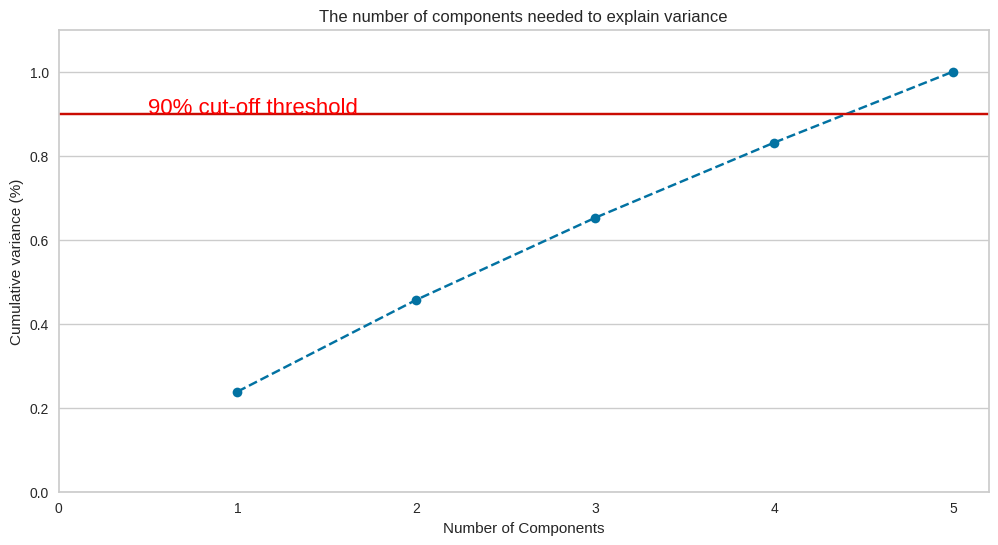

In [183]:
pcadf=PCA().fit(num_sc)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,6, step=1)
y = np.cumsum(pcadf.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [184]:
pcadf=PCA(n_components=4)
pcadf.fit(num_sc)
dfpca=pcadf.transform(num_sc)

In [185]:
dfpca

array([[ 0.68473368,  1.02908713,  0.51879709, -0.91280531],
       [-0.84215911,  0.2718298 , -1.64020016,  0.01219509],
       [ 1.3356122 , -0.56924637, -0.05314032,  0.24598449],
       ...,
       [ 0.78135307, -0.01171907, -0.1886387 ,  0.21012671],
       [ 1.05406232, -1.14947661,  0.5147711 , -0.18594914],
       [ 1.45037683, -0.18903291,  0.26234486, -0.44655341]])

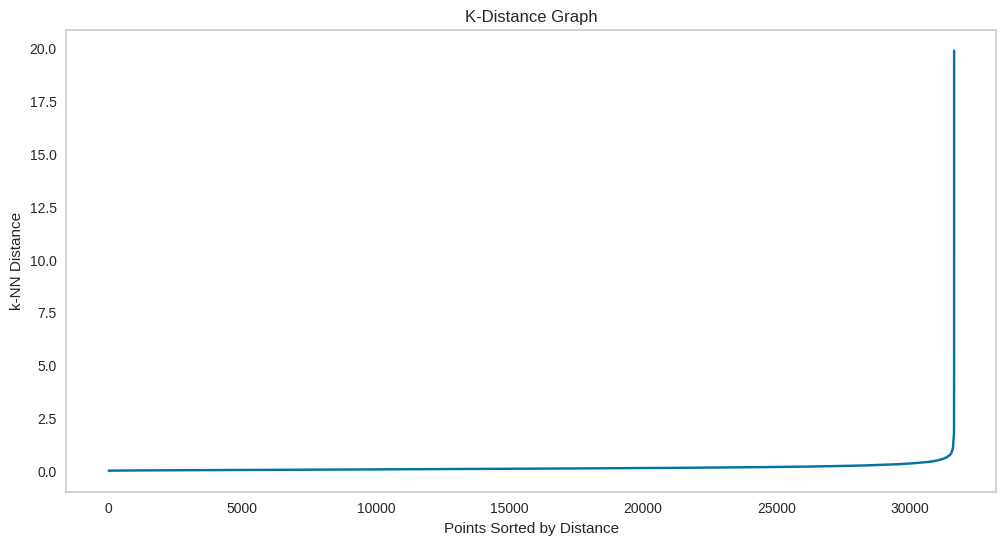

In [186]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors =10)
model = knn.fit(dfpca)
distances, indices = knn.kneighbors(dfpca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [195]:
db = DBSCAN(eps=0.9, min_samples=8).fit(dfpca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  3
Number of Outliers :  227


In [196]:
score = silhouette_score(dfpca, labels)
print(score)

0.5463872946314712


In [197]:
davb_score = davies_bouldin_score(dfpca, labels)
ch_score = calinski_harabasz_score(dfpca, labels)

In [198]:
print(f'Davies-Bouldin Score: {davb_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Davies-Bouldin Score: 2.31811417648728
Calinski-Harabasz Score: 133.38662484223323


In [199]:
dtrain['clusters']=labels
dtrain['clusters'].value_counts()

clusters
 0    31409
-1      227
 1        8
 2        3
Name: count, dtype: int64

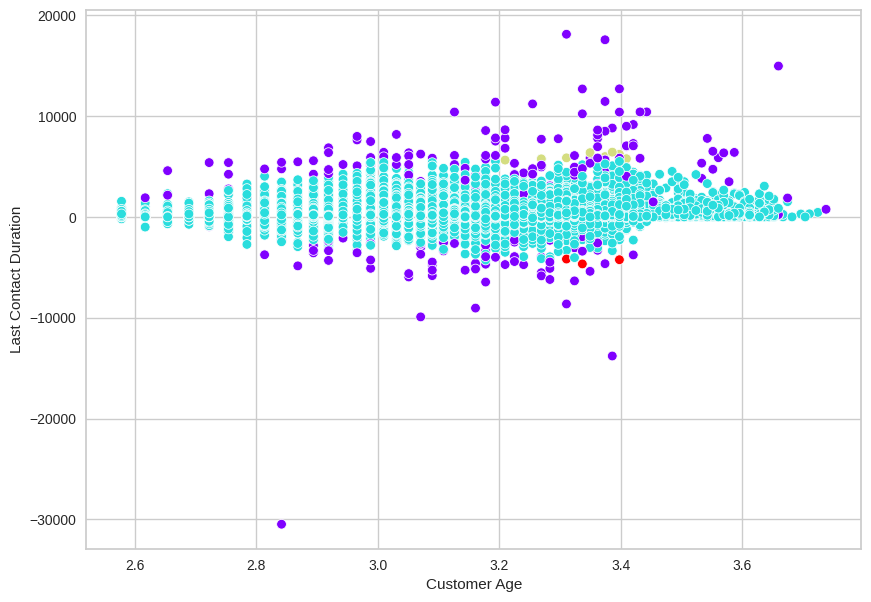

In [201]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['customer_age'], y=df['balance'], c=dtrain['clusters'], cmap='rainbow')
plt.xlabel('Customer Age')
plt.ylabel('Last Contact Duration')
plt.show()


In [203]:
dtrain[dtrain['clusters']==1]

customer_age       job_type   marital  education default  balance  \
2768           54.0     technician   married  secondary      no  29206.0   
3862           56.0     technician   married   tertiary      no  27071.0   
4150           58.0  self-employed   married  secondary      no  28316.0   
8214           51.0       services   married  secondary      no  26393.0   
8366           59.0        retired   married  secondary      no  25950.0   
16529          44.0   entrepreneur   married   tertiary      no  25201.0   
18204          48.0     management   married   tertiary      no  25854.0   
31589          57.0     management  divorced   tertiary      no  29484.0   

      housing_loan personal_loan communication_type  day_of_month month  \
2768           yes            no          telephone            21   nov   
3862            no           yes            unknown            20   jun   
4150           yes            no           cellular            14   may   
8214            no            no           cellular            25   aug   
8366            no            no           cellular            13   aug   
16529          yes           yes           cellular             6   may   
18204           no            no           cellular            14   aug   
31589           no            no           cellular            20   nov   

       last_contact_duration  num_contacts_in_campaign  \
2768                   233.0                       2.0   
3862                   183.0                       3.0   
4150                   179.0                       2.0   
8214                   191.0                       4.0   
8366                   292.0                       2.0   
16529                   89.0                       1.0   
18204                  117.0                       2.0   
31589                  132.0                       2.0   

       days_since_prev_campaign_contact  num_contacts_prev_campaign  \
2768                                NaN                           0   
3862                                NaN                           0   
4150                                NaN                           0   
8214                                NaN                           0   
8366                                NaN                           0   
16529                               NaN                           0   
18204                               NaN                           0   
31589                               NaN                           0   

      prev_campaign_outcome  term_deposit_subscribed  clusters  
2768                unknown                        0         1  
3862                unknown                        0         1  
4150                unknown                        0         1  
8214                unknown                        0         1  
8366                unknown                        0         1  
16529               unknown                        0         1  
18204               unknown                        0         1  
31589               unknown                        0         1

In [204]:
dtrain[dtrain['clusters']==2]

customer_age     job_type  marital  education default  balance  \
270           53.0       admin.  married  secondary      no  -1601.0   
2283          58.0      retired  married    primary     yes  -1477.0   
8439          51.0  blue-collar  married    primary      no  -1457.0   

     housing_loan personal_loan communication_type  day_of_month month  \
270            no           yes           cellular            13   may   
2283          yes            no            unknown             2   jun   
8439          yes            no            unknown            23   may   

      last_contact_duration  num_contacts_in_campaign  \
270                   100.0                       2.0   
2283                  330.0                       5.0   
8439                  176.0                       2.0   

      days_since_prev_campaign_contact  num_contacts_prev_campaign  \
270                                NaN                           0   
2283                               NaN                           0   
8439                               NaN                           0   

     prev_campaign_outcome  term_deposit_subscribed  clusters  
270                unknown                        0         2  
2283               unknown                        0         2  
8439               unknown                        0         2

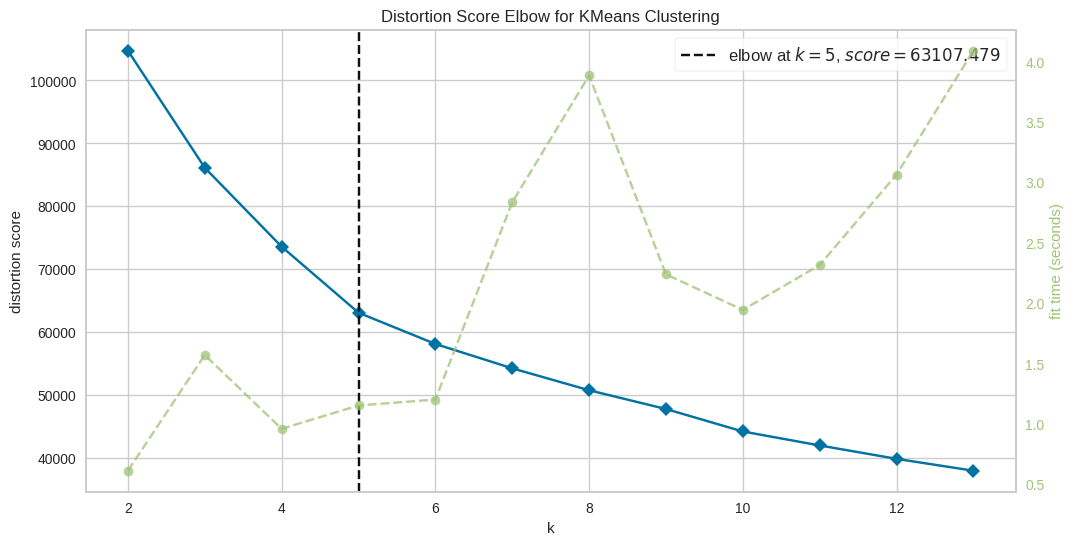

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [205]:
wcss=[]
for i in range(2,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(dfpca)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(2,14))

visualizer.fit(dfpca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [206]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(dfpca)
silhouette_score_avg=silhouette_score(dfpca,y_kmeans)
silhouette_score_avg

0.2531669366518172

**Analyse Clusters in Test Dataset**

In [207]:
dtest=pd.read_csv('/content/Test.csv')

In [208]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [209]:
dtest.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [210]:
dtest['customer_age'].fillna(dtest['customer_age'].median(),inplace=True)
dtest['balance'].fillna(dtest['balance'].median(),inplace=True)
dtest['last_contact_duration'].fillna(dtest['last_contact_duration'].median(),inplace=True)
dtest['num_contacts_in_campaign'].fillna(dtest['num_contacts_in_campaign'].median(),inplace=True)
dtest['marital'].fillna(dtest['marital'].mode()[0],inplace=True)
dtest['personal_loan'].fillna(dtest['personal_loan'].mode()[0],inplace=True)

In [211]:
dtest.isna().sum()

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

In [212]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13564 non-null  object 
 1   customer_age                13564 non-null  float64
 2   job_type                    13564 non-null  object 
 3   marital                     13564 non-null  object 
 4   education                   13564 non-null  object 
 5   default                     13564 non-null  object 
 6   balance                     13564 non-null  float64
 7   housing_loan                13564 non-null  object 
 8   personal_loan               13564 non-null  object 
 9   communication_type          13564 non-null  object 
 10  day_of_month                13564 non-null  int64  
 11  month                       13564 non-null  object 
 12  last_contact_duration       13564 non-null  float64
 13  num_contacts_in_campaign    135

In [213]:
dtest.drop('id',axis=1,inplace=True)

In [214]:
test_new=dtest.select_dtypes(include=['int64','float64'])

In [215]:
test_new.describe()

customer_age       balance  day_of_month  last_contact_duration  \
count  13564.000000  13564.000000  13564.000000           13564.000000   
mean      40.421557   1329.470436     15.778089             260.458935   
std       10.642292   2822.525982      8.321562             260.125592   
min       18.000000  -6849.000000      1.000000               0.000000   
25%       32.000000     75.000000      8.000000             102.000000   
50%       39.000000    447.000000     16.000000             182.000000   
75%       48.000000   1435.250000     21.000000             323.000000   
max       94.000000  71187.000000     31.000000            3863.000000   

       num_contacts_in_campaign  num_contacts_prev_campaign  
count              13564.000000                13564.000000  
mean                   2.728546                    0.553966  
std                    2.936755                    1.762402  
min                    1.000000                    0.000000  
25%                    1.000000                    0.000000  
50%                    2.000000                    0.000000  
75%                    3.000000                    0.000000  
max                   50.000000                   38.000000

In [216]:
test_new.drop('day_of_month',axis=1,inplace=True)

In [217]:
test_new.skew()

customer_age                  0.681168
balance                       6.812522
last_contact_duration         3.079672
num_contacts_in_campaign      4.444608
num_contacts_prev_campaign    6.261693
dtype: float64

In [218]:
for i in test_new.columns:
  test_new[i],lam=yeojohnson(test_new[i])
  print('skewness in',i, test_new[i].skew())

skewness in customer_age 0.004744002276663932
skewness in balance 0.881684189442052
skewness in last_contact_duration 0.06769292754708438
skewness in num_contacts_in_campaign 0.2238323480972172
skewness in num_contacts_prev_campaign 1.6692133972466912


In [219]:
sc=StandardScaler()
T_sc=sc.fit_transform(test_new)
T_sc=pd.DataFrame(T_sc, columns=test_new.columns)

In [220]:
T_sc.head()

customer_age   balance  last_contact_duration  num_contacts_in_campaign  \
0      1.310161  1.991733              -0.747168                  0.134058   
1     -1.911453 -0.341944              -1.061065                  0.134058   
2      0.636399 -0.360610               0.092976                 -1.114876   
3      1.377446  1.665344              -1.548303                 -1.114876   
4      1.755251  0.693991              -0.420025                 -1.114876   

   num_contacts_prev_campaign  
0                   -0.468288  
1                   -0.468288  
2                   -0.468288  
3                   -0.468288  
4                    2.046133

In [221]:
Z=T_sc.values

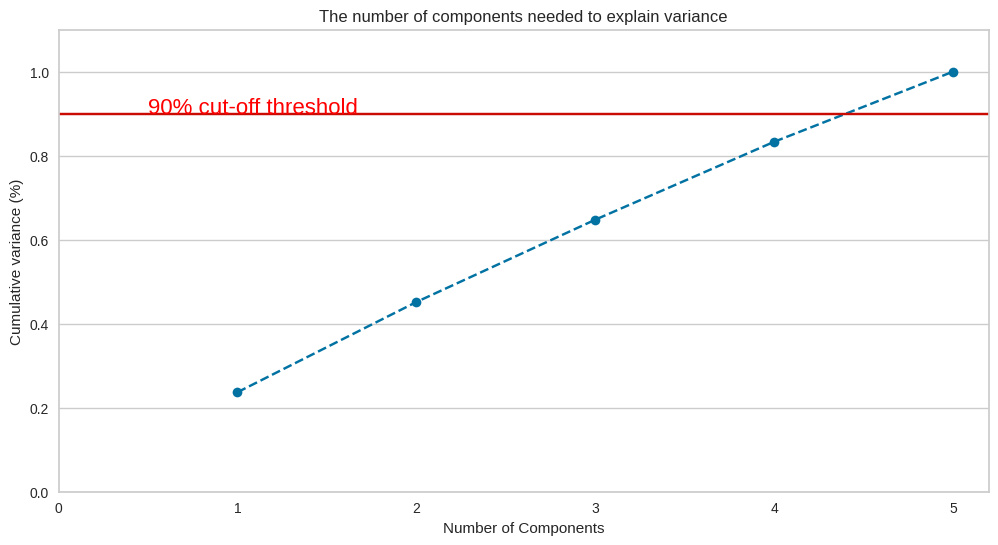

In [222]:
tpca=PCA().fit(Z)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(tpca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [223]:
tpca=PCA(n_components=4)
tpca.fit(Z)
x_pca_test=tpca.transform(Z)

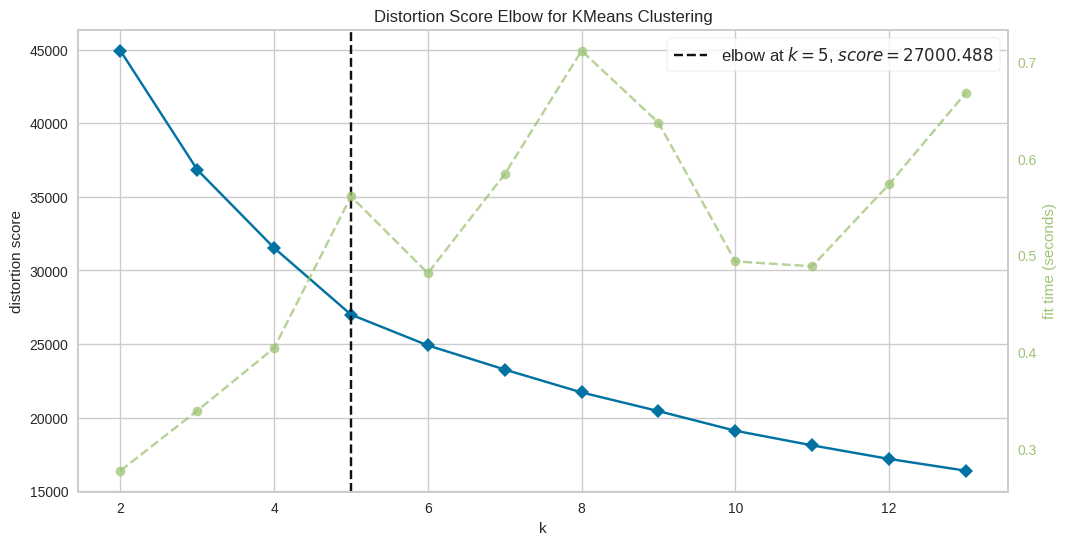

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [224]:
wcss=[]
for i in range(2,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca_test)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(2,14))

visualizer.fit(x_pca_test)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [225]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca_test)
silhouette_score_avg=silhouette_score(x_pca_test,y_kmeans)
silhouette_score_avg

0.2515883293487741

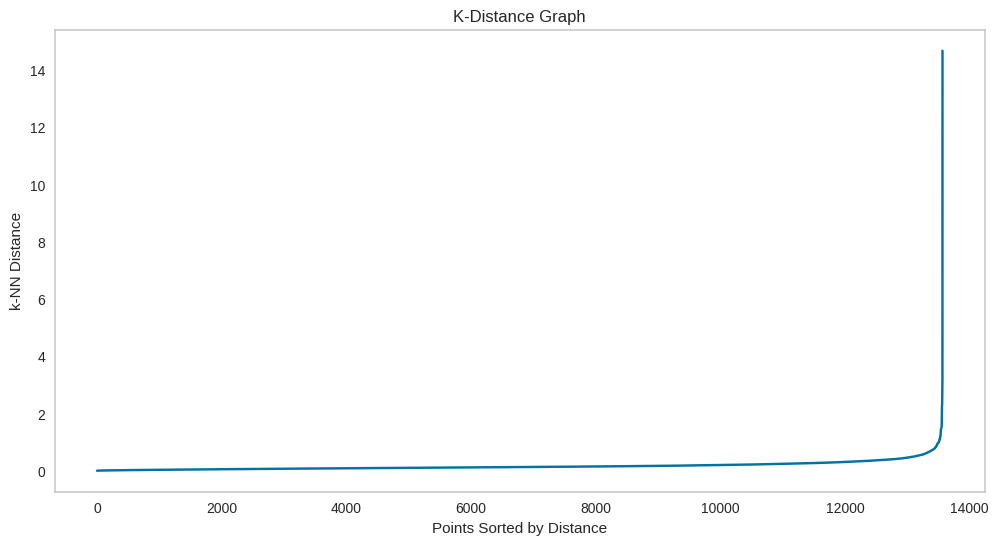

In [226]:
knn = NearestNeighbors(n_neighbors =10)
model = knn.fit(x_pca_test)
distances, indices = knn.kneighbors(x_pca_test)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [230]:
db = DBSCAN(eps=0.8, min_samples=8).fit(x_pca_test)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  2
Number of Outliers :  277


In [231]:
score = silhouette_score(x_pca_test, labels)
print(score)

0.482597475808219


In [232]:
davb_score = davies_bouldin_score(x_pca_test, labels)
ch_score = calinski_harabasz_score(x_pca_test, labels)

In [233]:
print(f'Davies-Bouldin Score: {davb_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Davies-Bouldin Score: 2.9364361453111996
Calinski-Harabasz Score: 132.2354792288009


In [234]:
dtest['clusters']=labels
dtest['clusters'].value_counts()

clusters
 0    13277
-1      277
 1       10
Name: count, dtype: int64

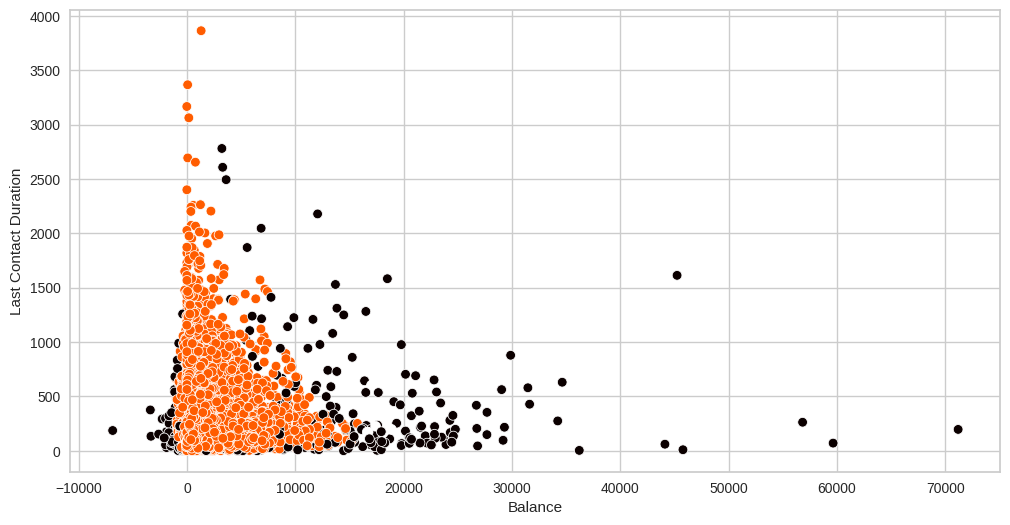

In [235]:
sns.scatterplot(x=dtest['balance'], y=dtest['last_contact_duration'], c=dtest['clusters'], cmap='hot')
plt.xlabel('Balance')
plt.ylabel('Last Contact Duration')
plt.show()

In [236]:
pd.options.display.float_format = "{:.0f}".format
summary = dtest[['customer_age', 'balance', 'clusters']]
summary.set_index("clusters", inplace = True)
summary = summary.groupby('clusters').describe().transpose()
summary

clusters              -1     0     1
customer_age count   277 13277    10
             mean     42    40    38
             std      14    11     5
             min      18    18    31
             25%      32    32    35
             50%      40    39    36
             75%      52    48    40
             max      91    94    49
balance      count   277 13277    10
             mean  10398  1128 17310
             std   11593  1843   809
             min   -6849 -1093 16397
             25%    -579    76 16669
             50%    9298   447 17226
             75%   16987  1374 17827
             max   71187 15744 18876

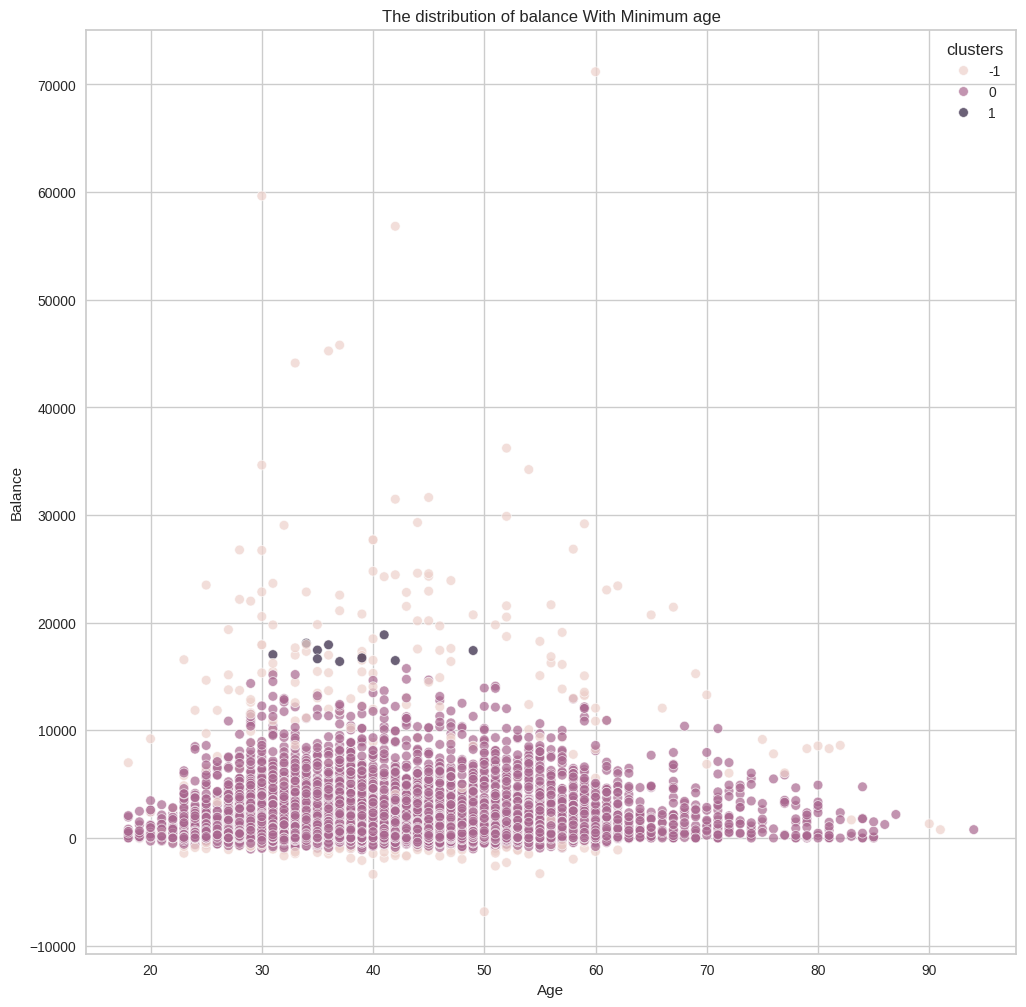

In [237]:
plt.rcParams['figure.figsize'] = [12, 12]
ax = sns.scatterplot(x = dtest["customer_age"],
                     y = dtest["balance"],
                     hue = dtest.clusters,
                     alpha = .7)

ax.set_title("The distribution of balance With Minimum age")
ax.set_xlabel("Age")
ax.set_ylabel("Balance")
plt.show()

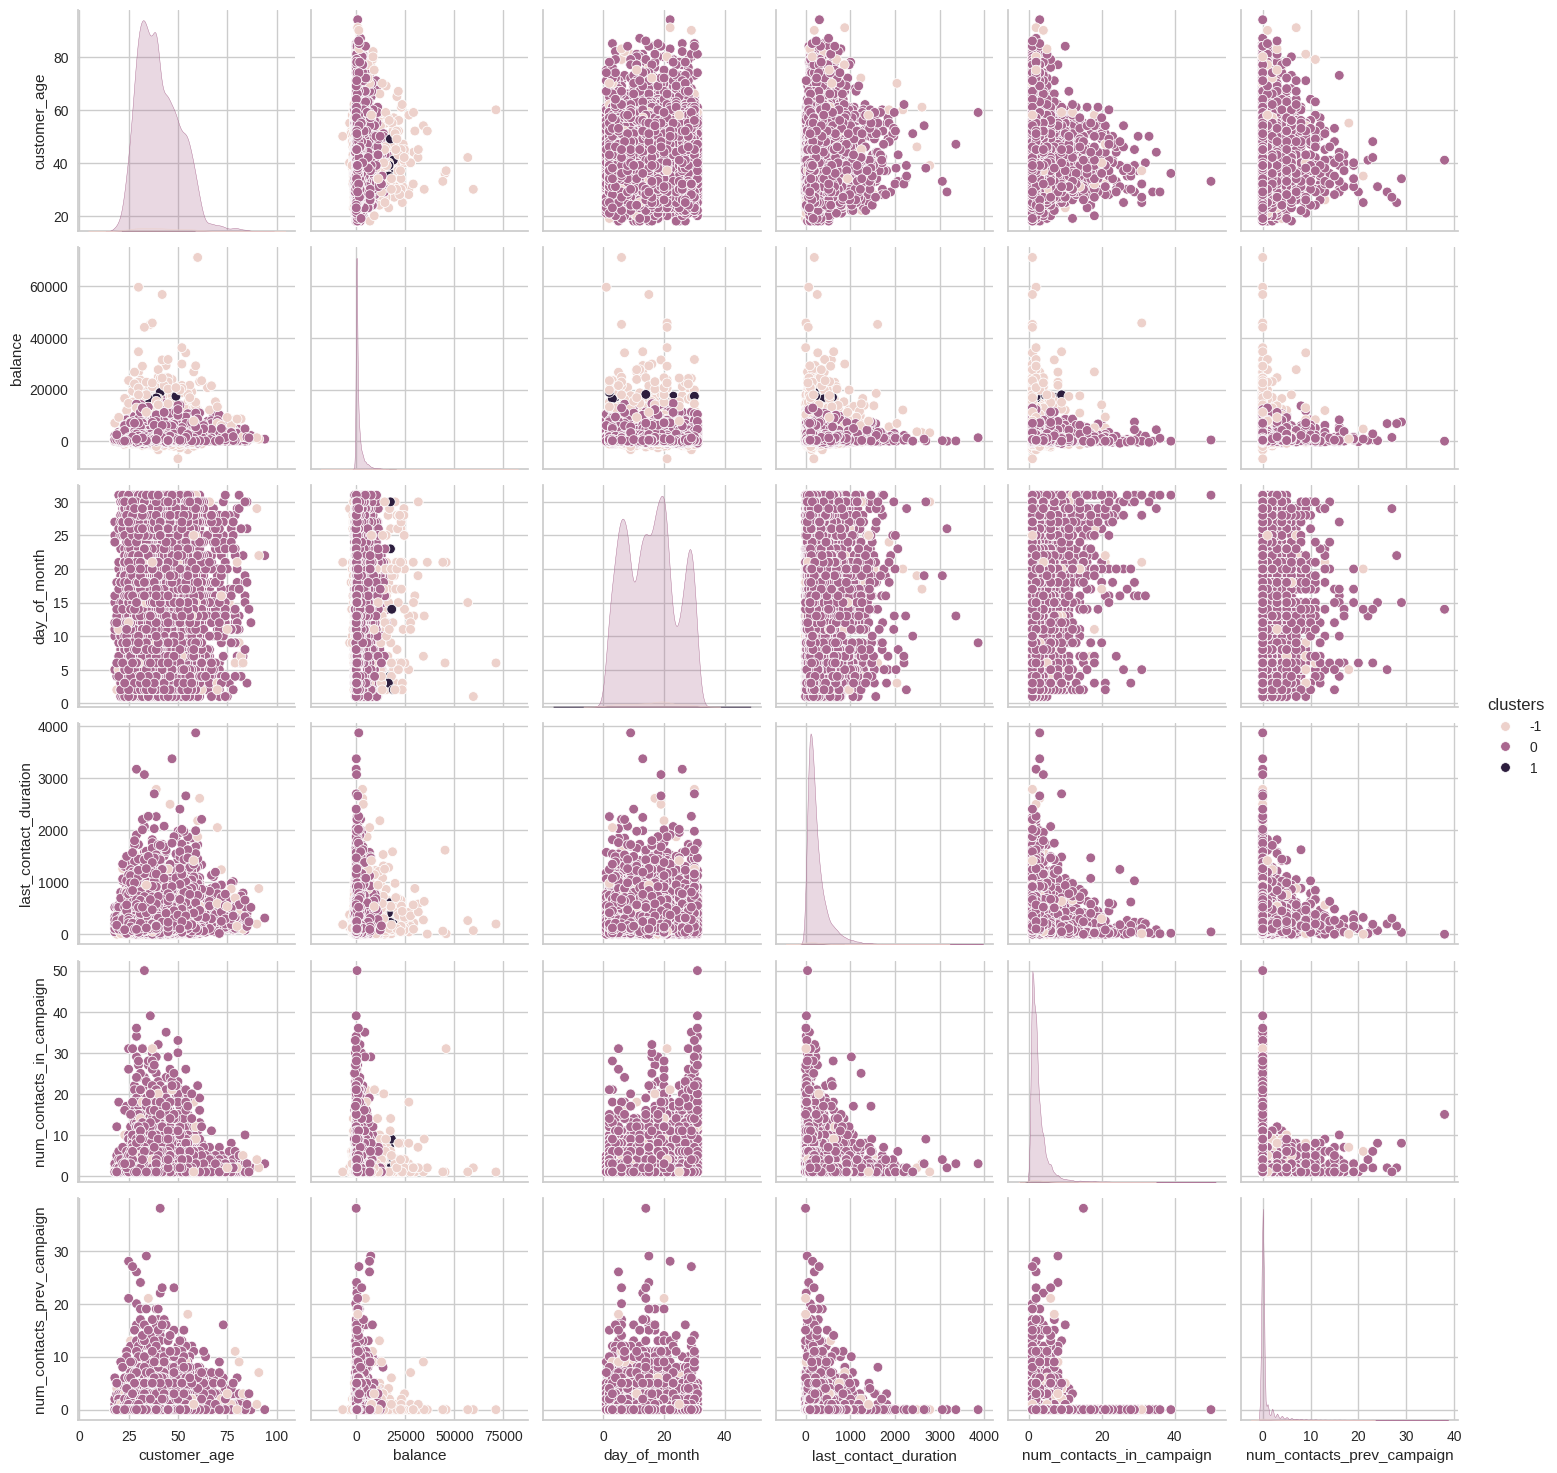

In [238]:
sns.pairplot(dtest, hue='clusters')
plt.show()

In [249]:
dtest.head()

customer_age     job_type   marital  education default  balance  \
0            55      retired   married   tertiary      no     7136   
1            24  blue-collar    single  secondary      no      179   
2            46   technician  divorced  secondary      no      143   
3            56    housemaid    single    unknown      no     6023   
4            62      retired   married  secondary      no     2913   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                     90                         2   
1                     63                         2   
2                    208                         1   
3                     34                         1   
4                    127                         1   

   num_contacts_prev_campaign prev_campaign_outcome  clusters  
0                           0               unknown         0  
1                           0               unknown         0  
2                           0               unknown         0  
3                           0               unknown         0  
4                           1               success         0

### **Customer Segmentation Analysis of TEST DATASET**

In [250]:
# Show value on top bar plot function

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            sum = 0
            for x in ax.patches : sum = sum + x.get_height()
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height()/sum *100) + '%'
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            sum = 0
            for x in ax.patches : sum = sum + x.get_width()
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width()/sum *100) + '%'
                ax.text(_x, _y, value, ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

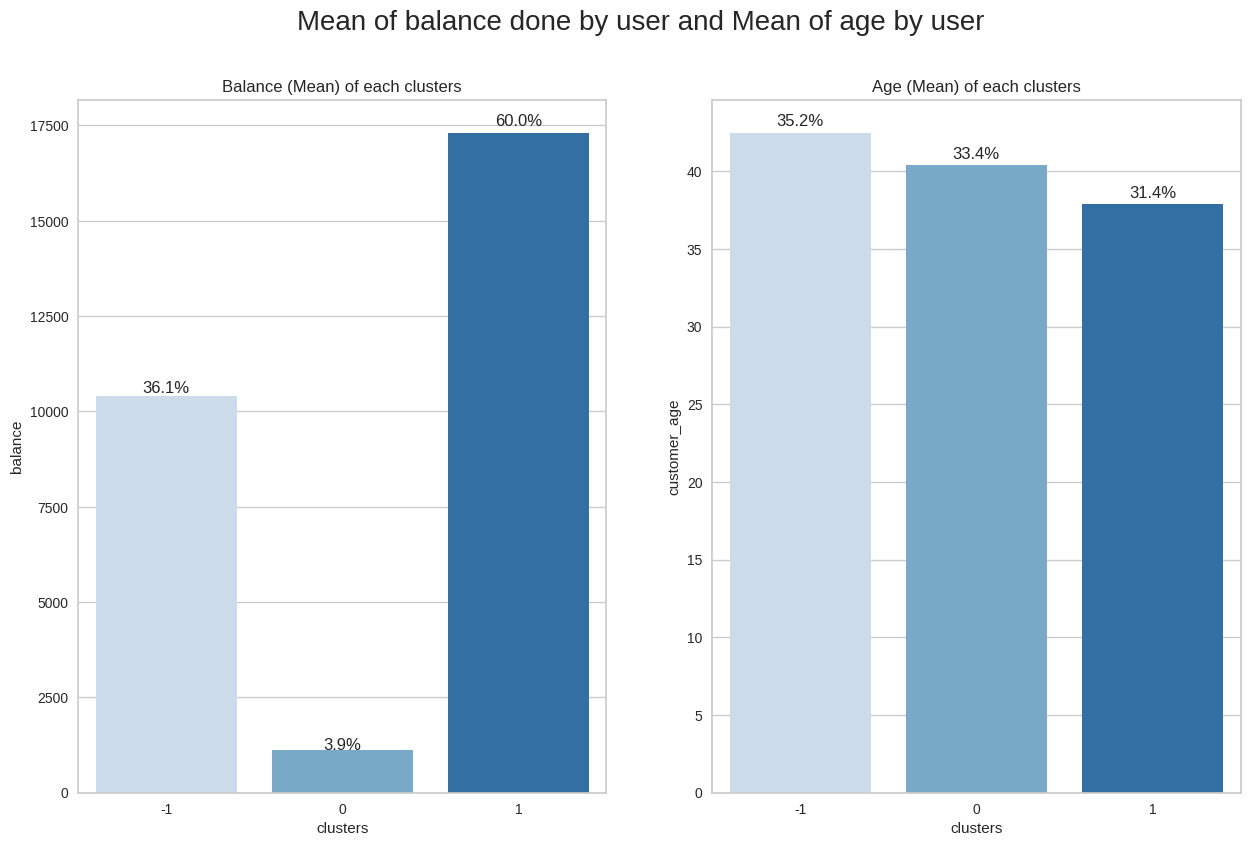

In [252]:
fig, ax = plt.subplots(1,2, figsize = (15, 9))

bar0 = sns.barplot(ax = ax[0], x = dtest['clusters'], y = dtest["balance"], palette = "Blues", errorbar=None)
bar1 = sns.barplot(ax = ax[1], x = dtest['clusters'], y = dtest["customer_age"], palette = "Blues", errorbar=None)

ax[0].set_title("Balance (Mean) of each clusters")
ax[1].set_title("Age (Mean) of each clusters")

fig.suptitle("Mean of balance done by user and Mean of age by user", fontsize = 20)

show_values(bar0)
show_values(bar1)

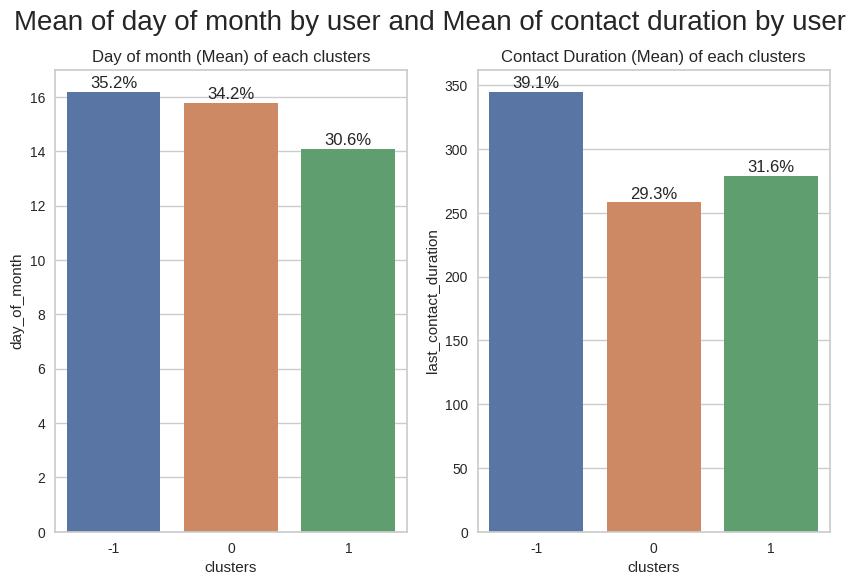

In [259]:
fig, ax = plt.subplots(1,2, figsize = (10, 6))

bar0 = sns.barplot(ax = ax[0], x = dtest['clusters'], y = dtest["day_of_month"], palette = "deep", errorbar=None)
bar1 = sns.barplot(ax = ax[1], x = dtest['clusters'], y = dtest["last_contact_duration"], palette = "deep", errorbar=None)

ax[0].set_title("Day of month (Mean) of each clusters")
ax[1].set_title("Contact Duration (Mean) of each clusters")

fig.suptitle("Mean of day of month by user and Mean of contact duration by user", fontsize = 20)

show_values(bar0)
show_values(bar1)

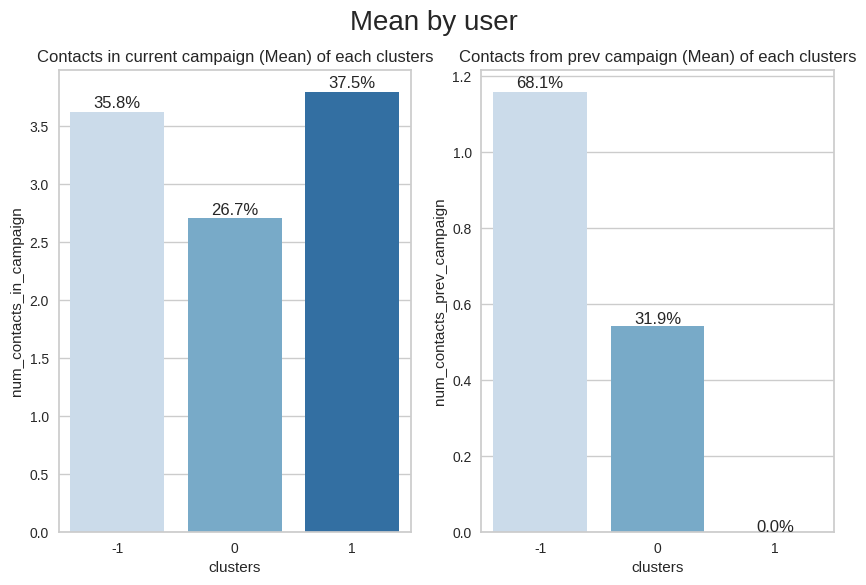

In [260]:
fig, ax = plt.subplots(1,2, figsize = (10, 6))

bar0 = sns.barplot(ax = ax[0], x = dtest['clusters'],y = dtest["num_contacts_in_campaign"], palette = "Blues", errorbar=None)
bar1 = sns.barplot(ax = ax[1], x = dtest['clusters'], y = dtest["num_contacts_prev_campaign"], palette = "Blues", errorbar=None)

ax[0].set_title("Contacts in current campaign (Mean) of each clusters")
ax[1].set_title("Contacts from prev campaign (Mean) of each clusters")

fig.suptitle("Mean by user", fontsize = 20)

show_values(bar0)
show_values(bar1)

In [273]:
def count_plot(col) :
    fig, ax = plt.subplots(1,3, figsize = (30, 11))

    bar0 = sns.countplot(ax = ax[0], data = dtest.loc[dtest.clusters == 0], x=col, palette = "Blues")

    bar1 = sns.countplot(ax = ax[1], data = dtest.loc[dtest.clusters == 1], x=col, palette = "Blues")

    bar2 = sns.countplot(ax = ax[2], data = dtest.loc[dtest.clusters == -1], x=col, palette = "Blues")

    ax[0].set_title("Cluster 0")
    ax[1].set_title("Cluster 1")
    ax[2].set_title("Cluster -1")

    fig.suptitle(col+" by clusters", fontsize = 15)

    show_values(bar0, space=0)
    show_values(bar1, space=0)
    show_values(bar2, space=0)

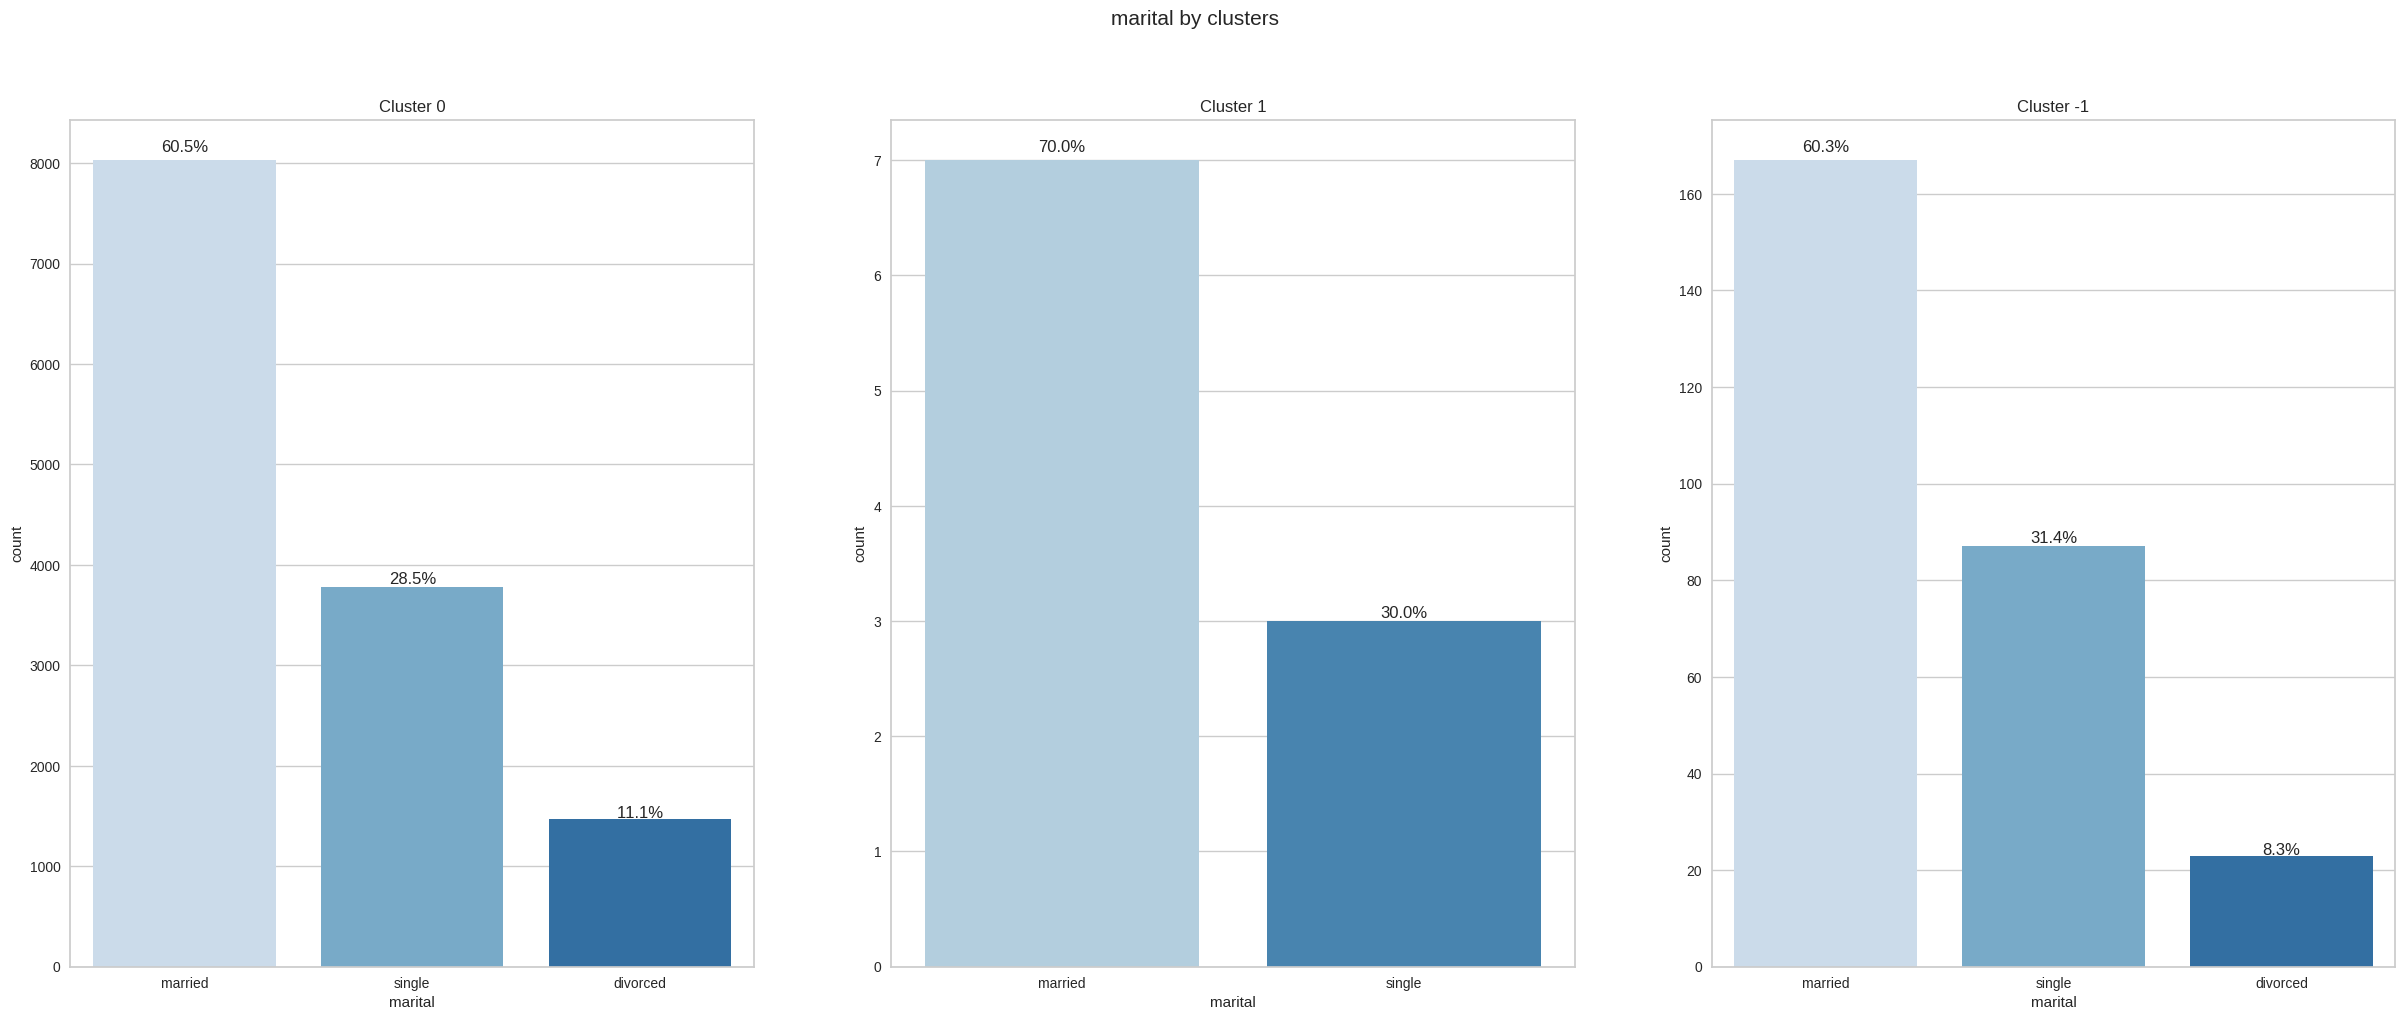

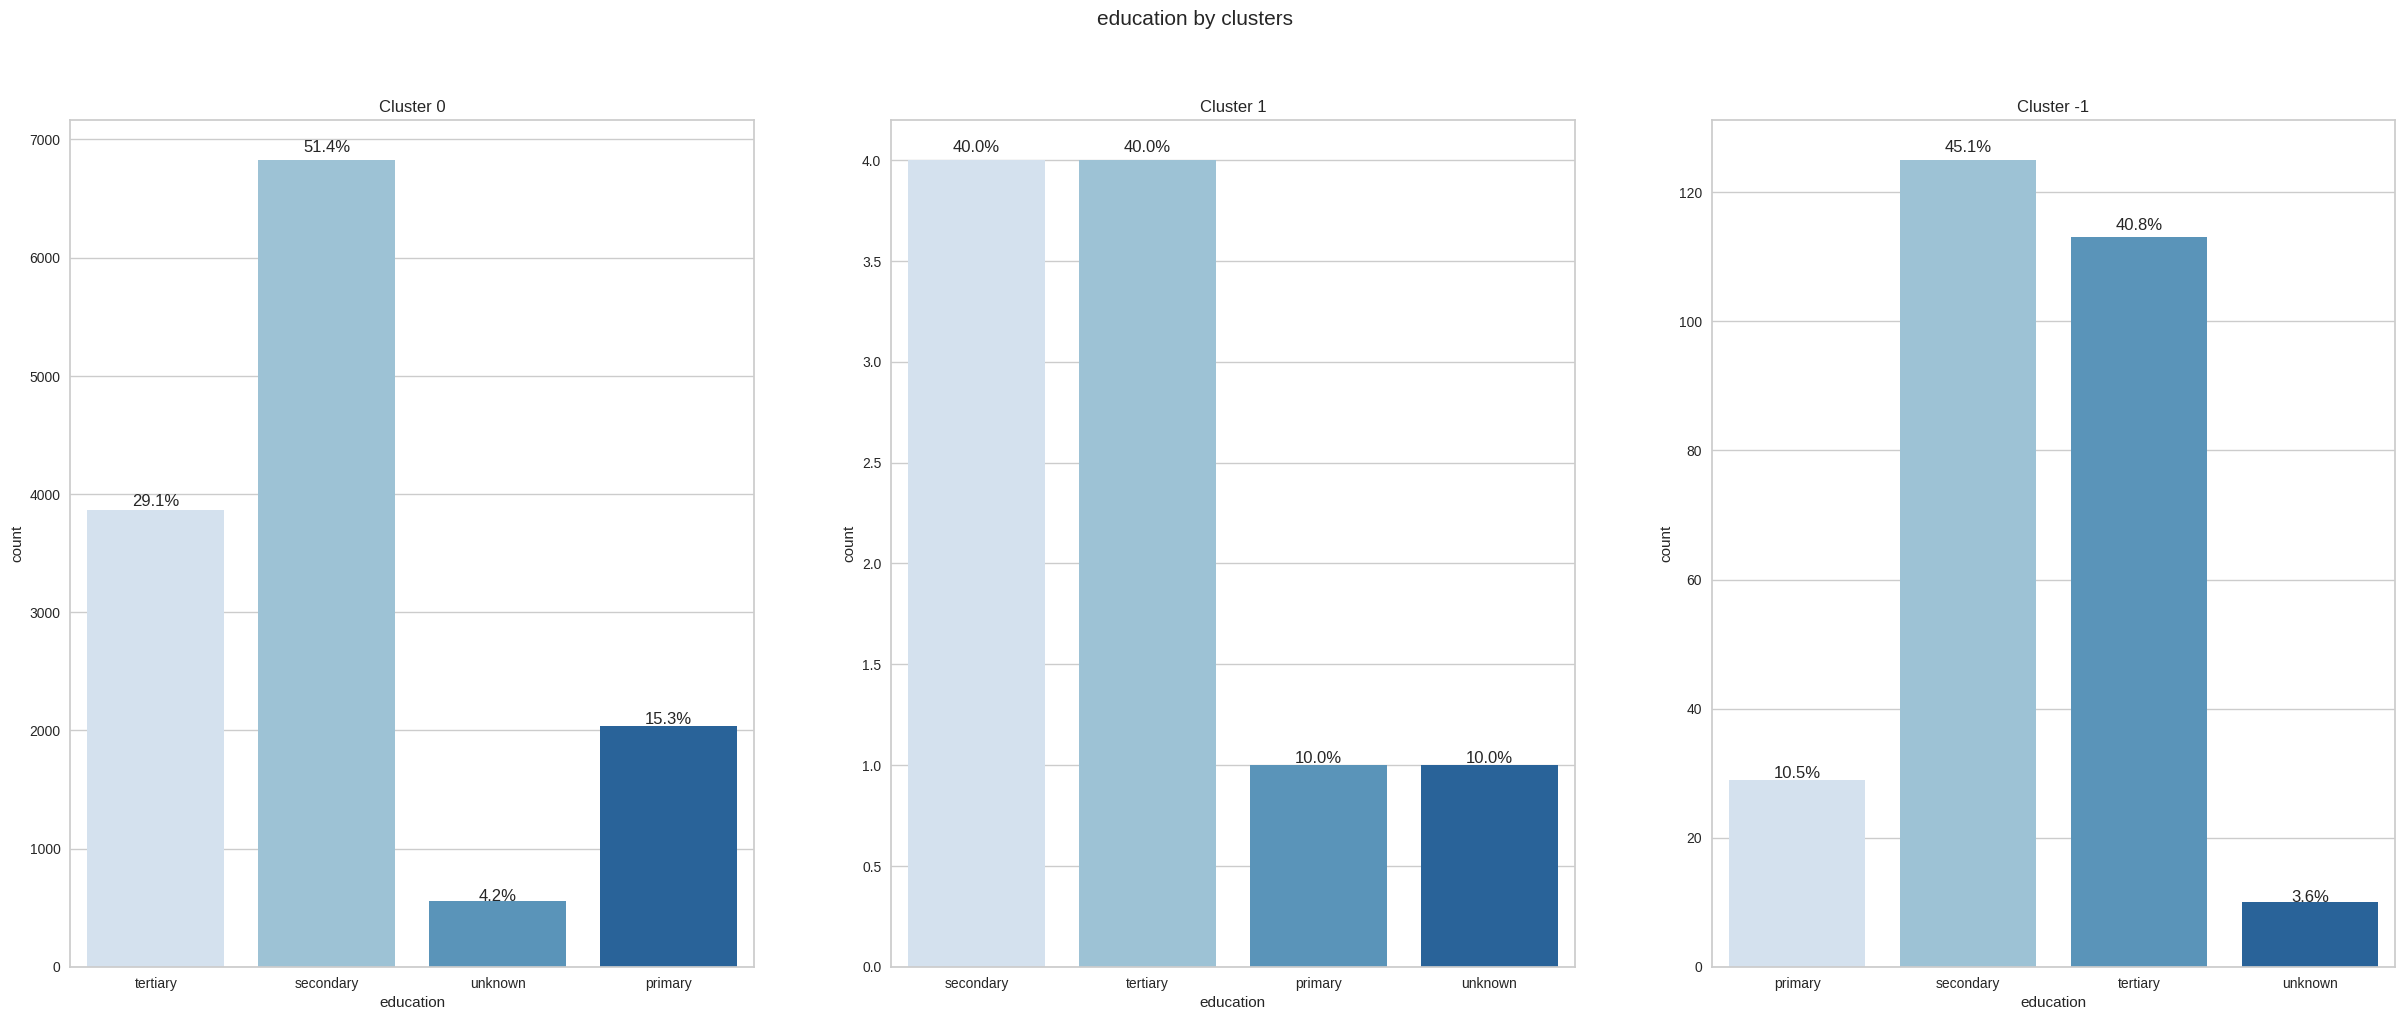

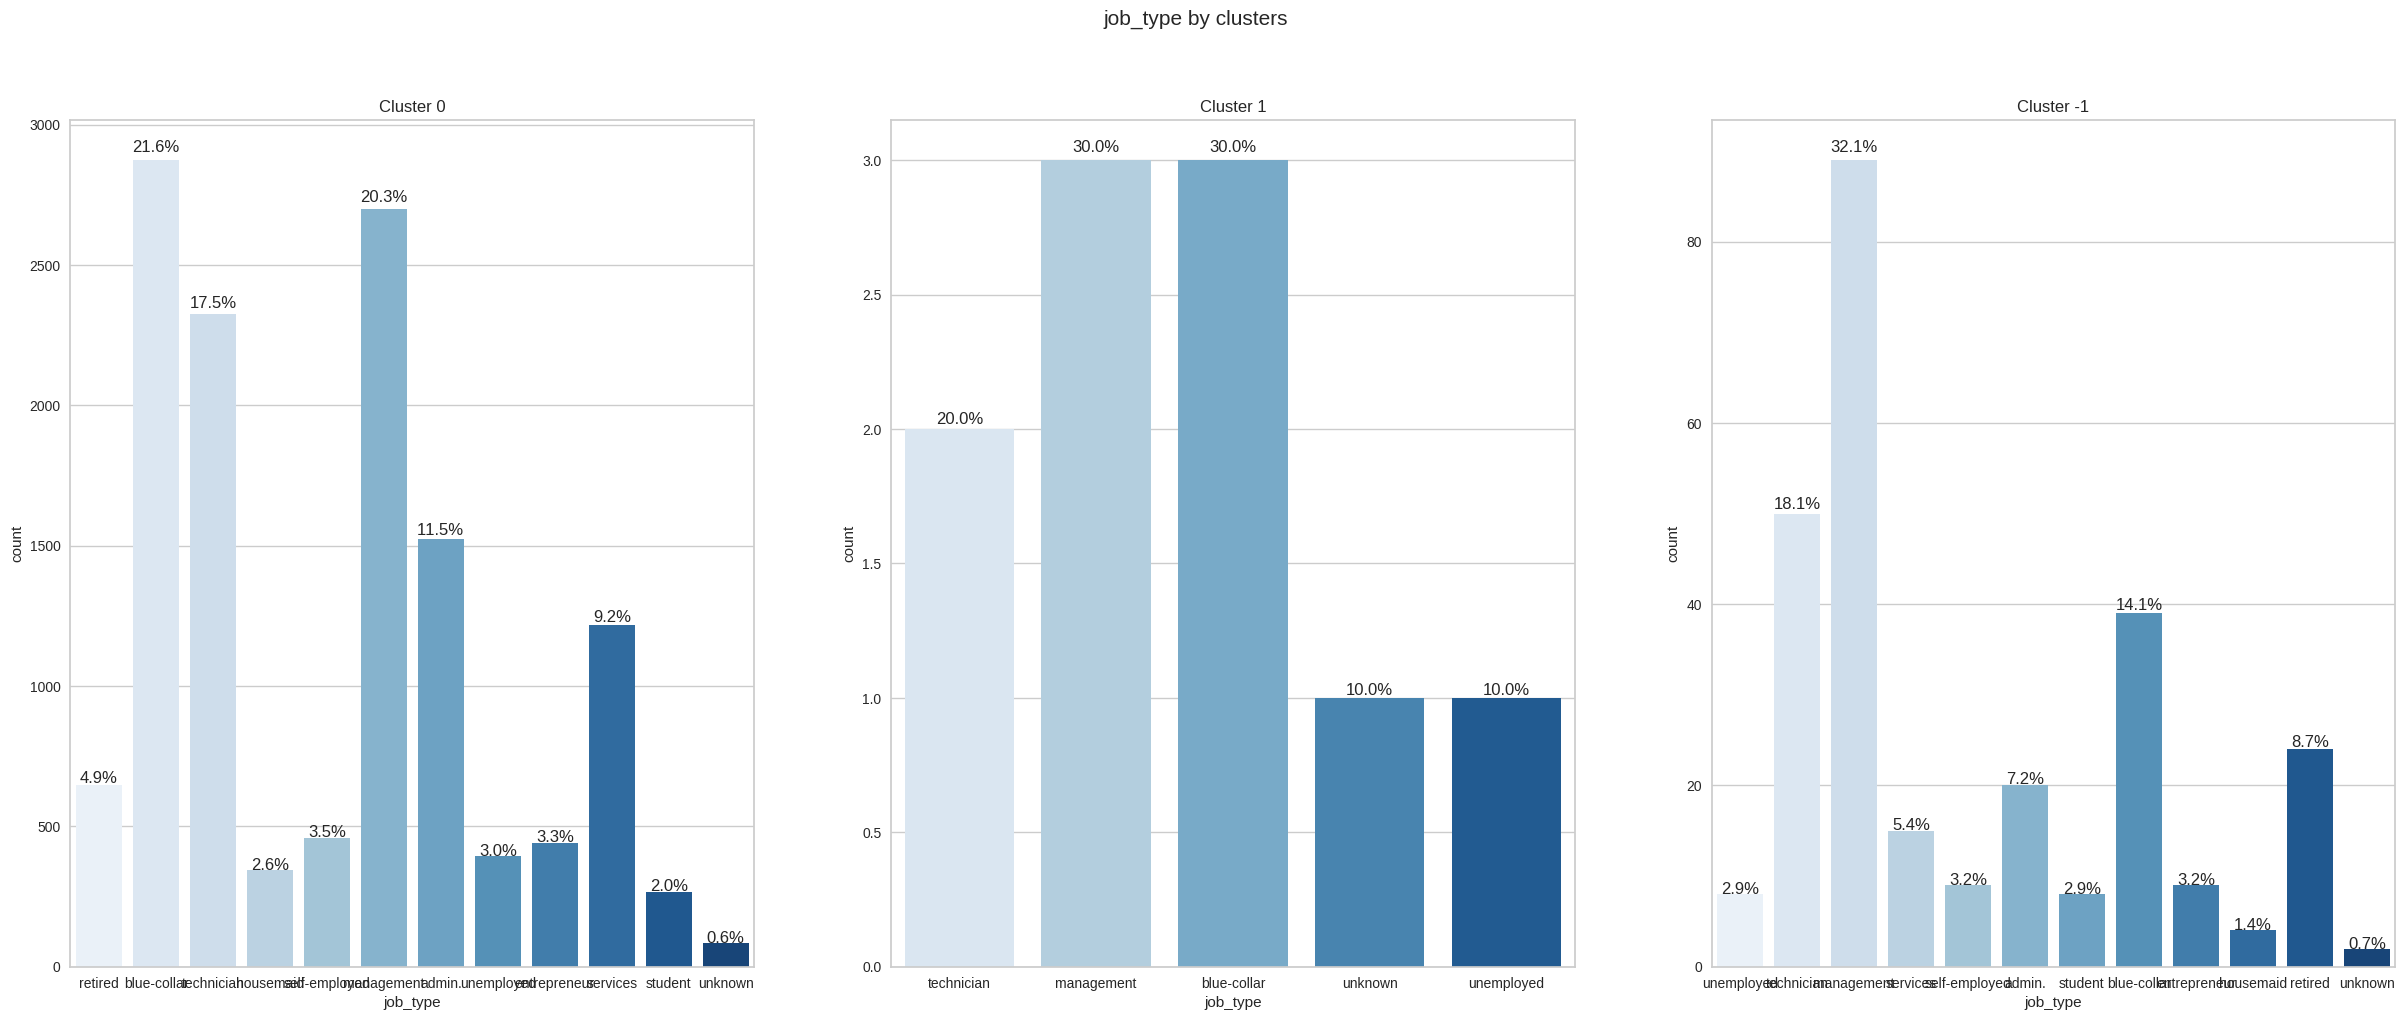

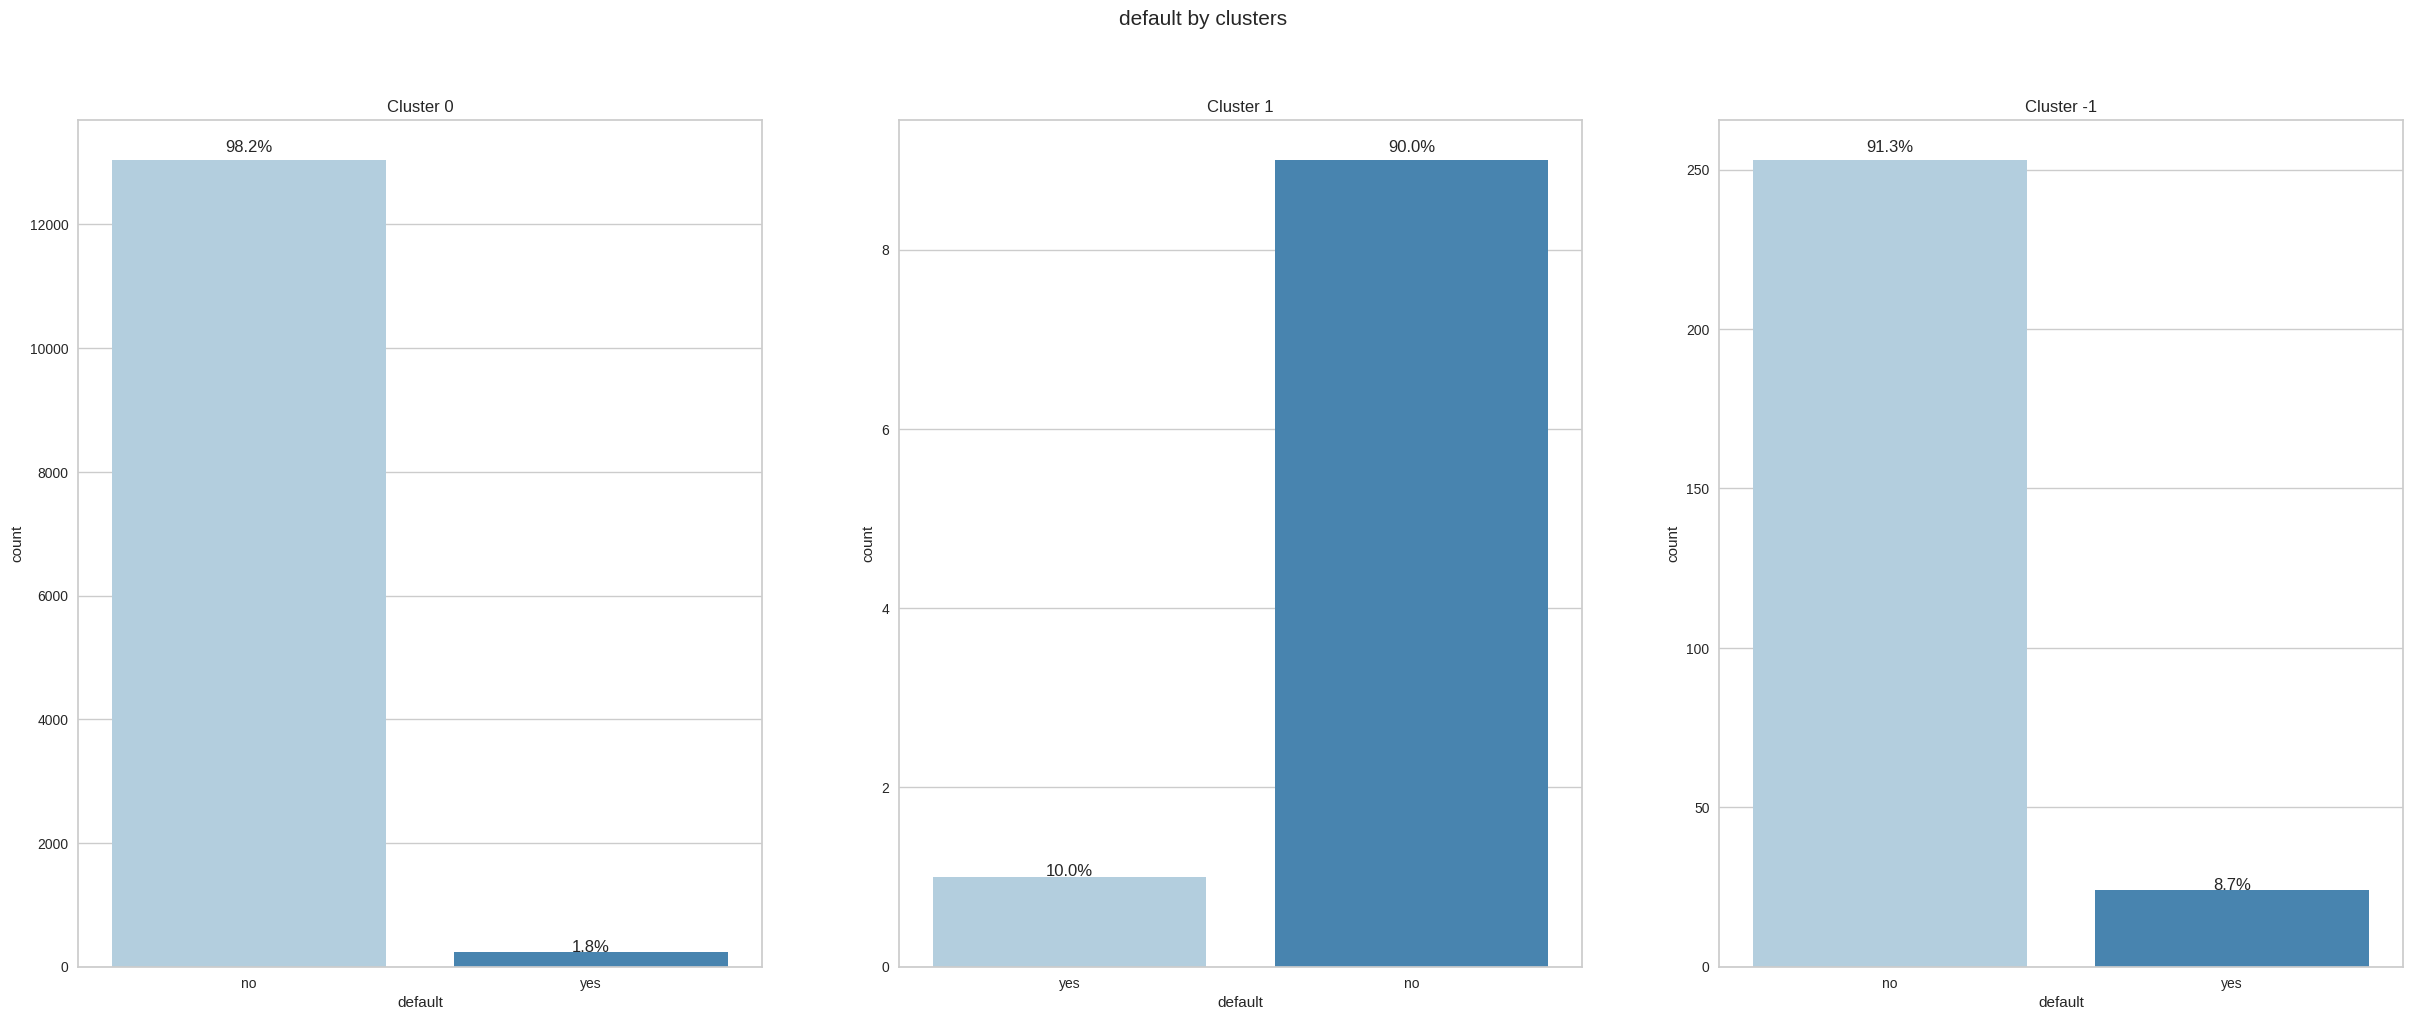

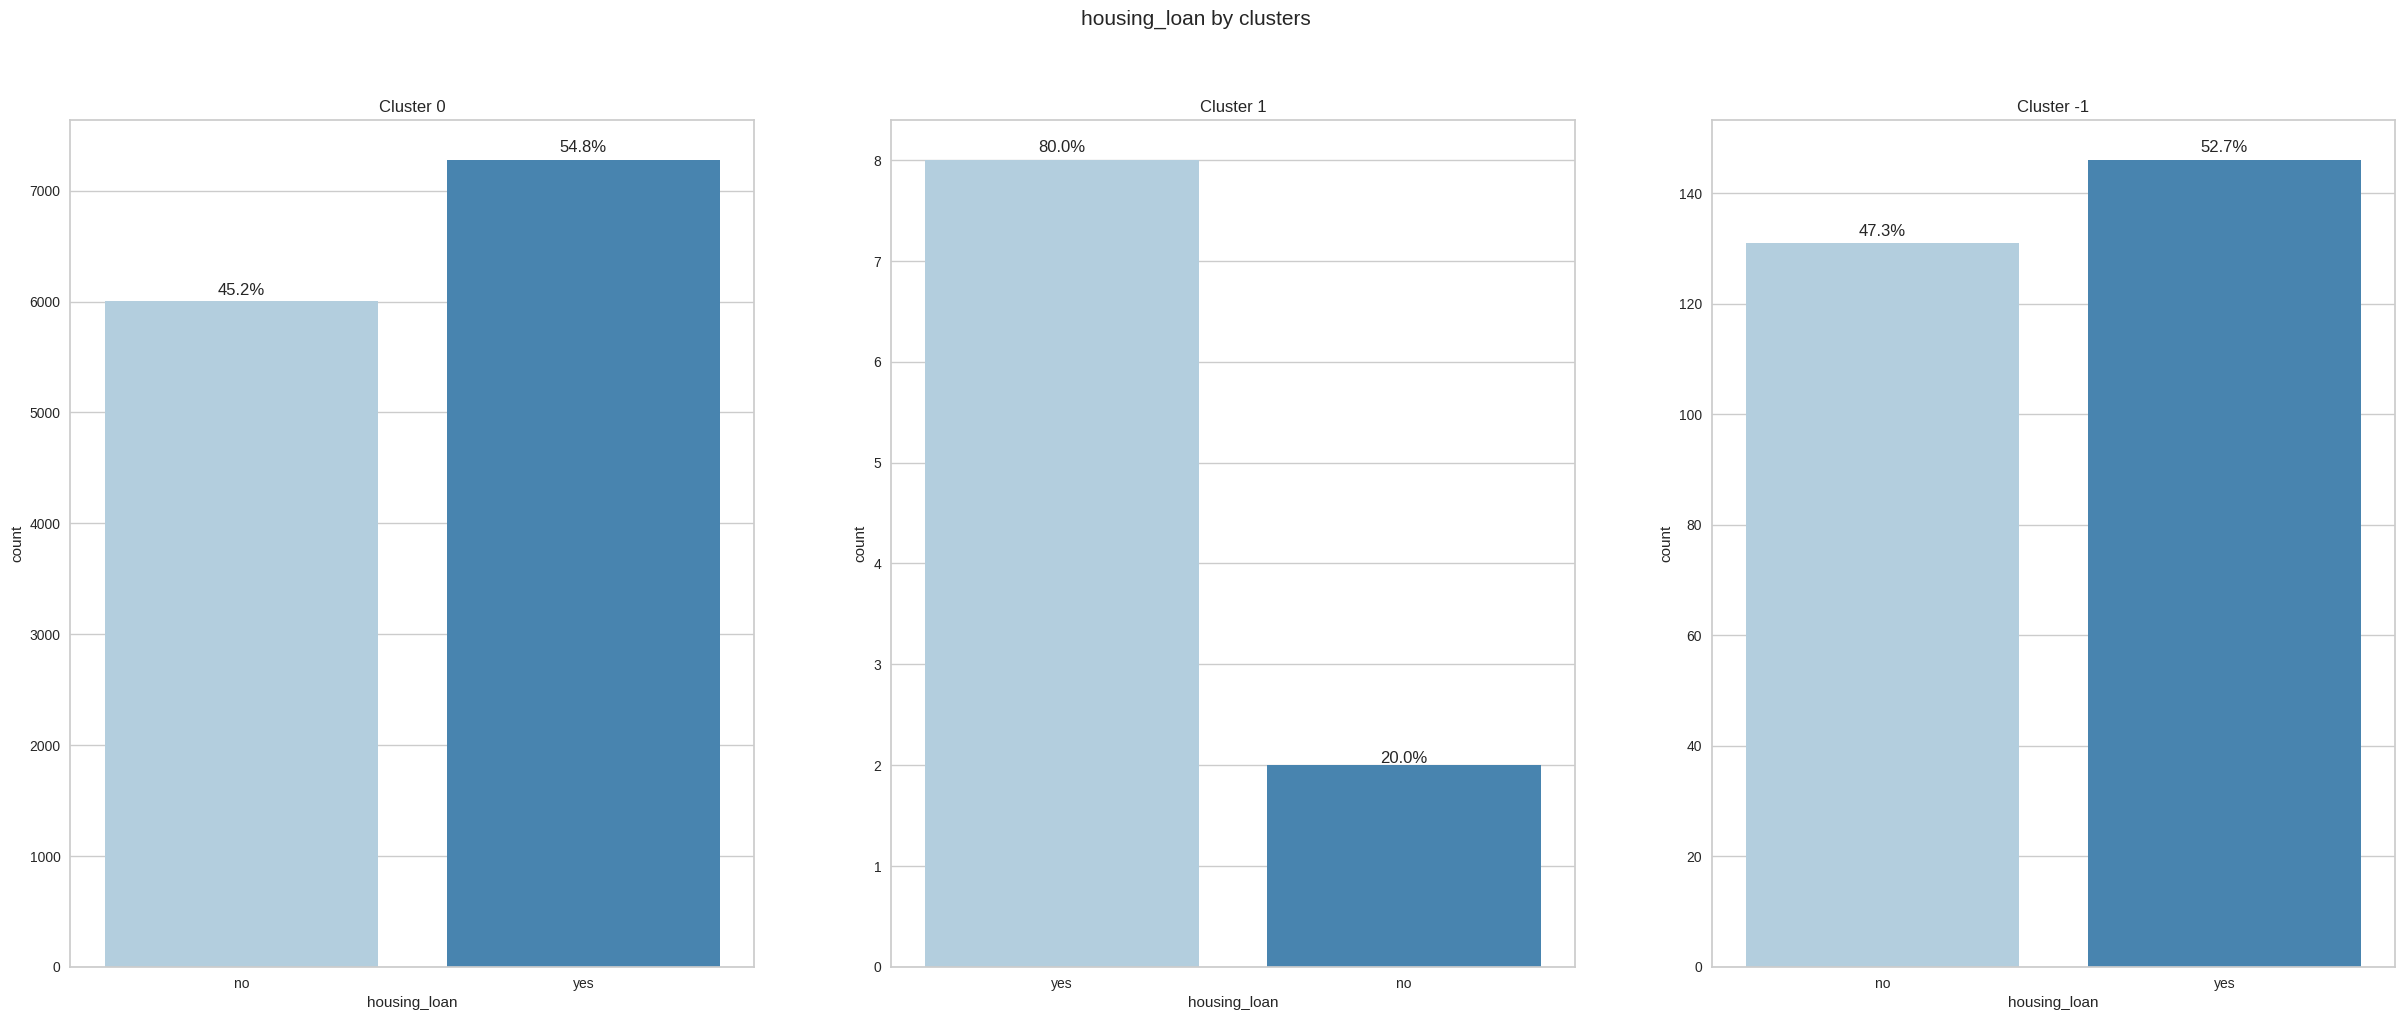

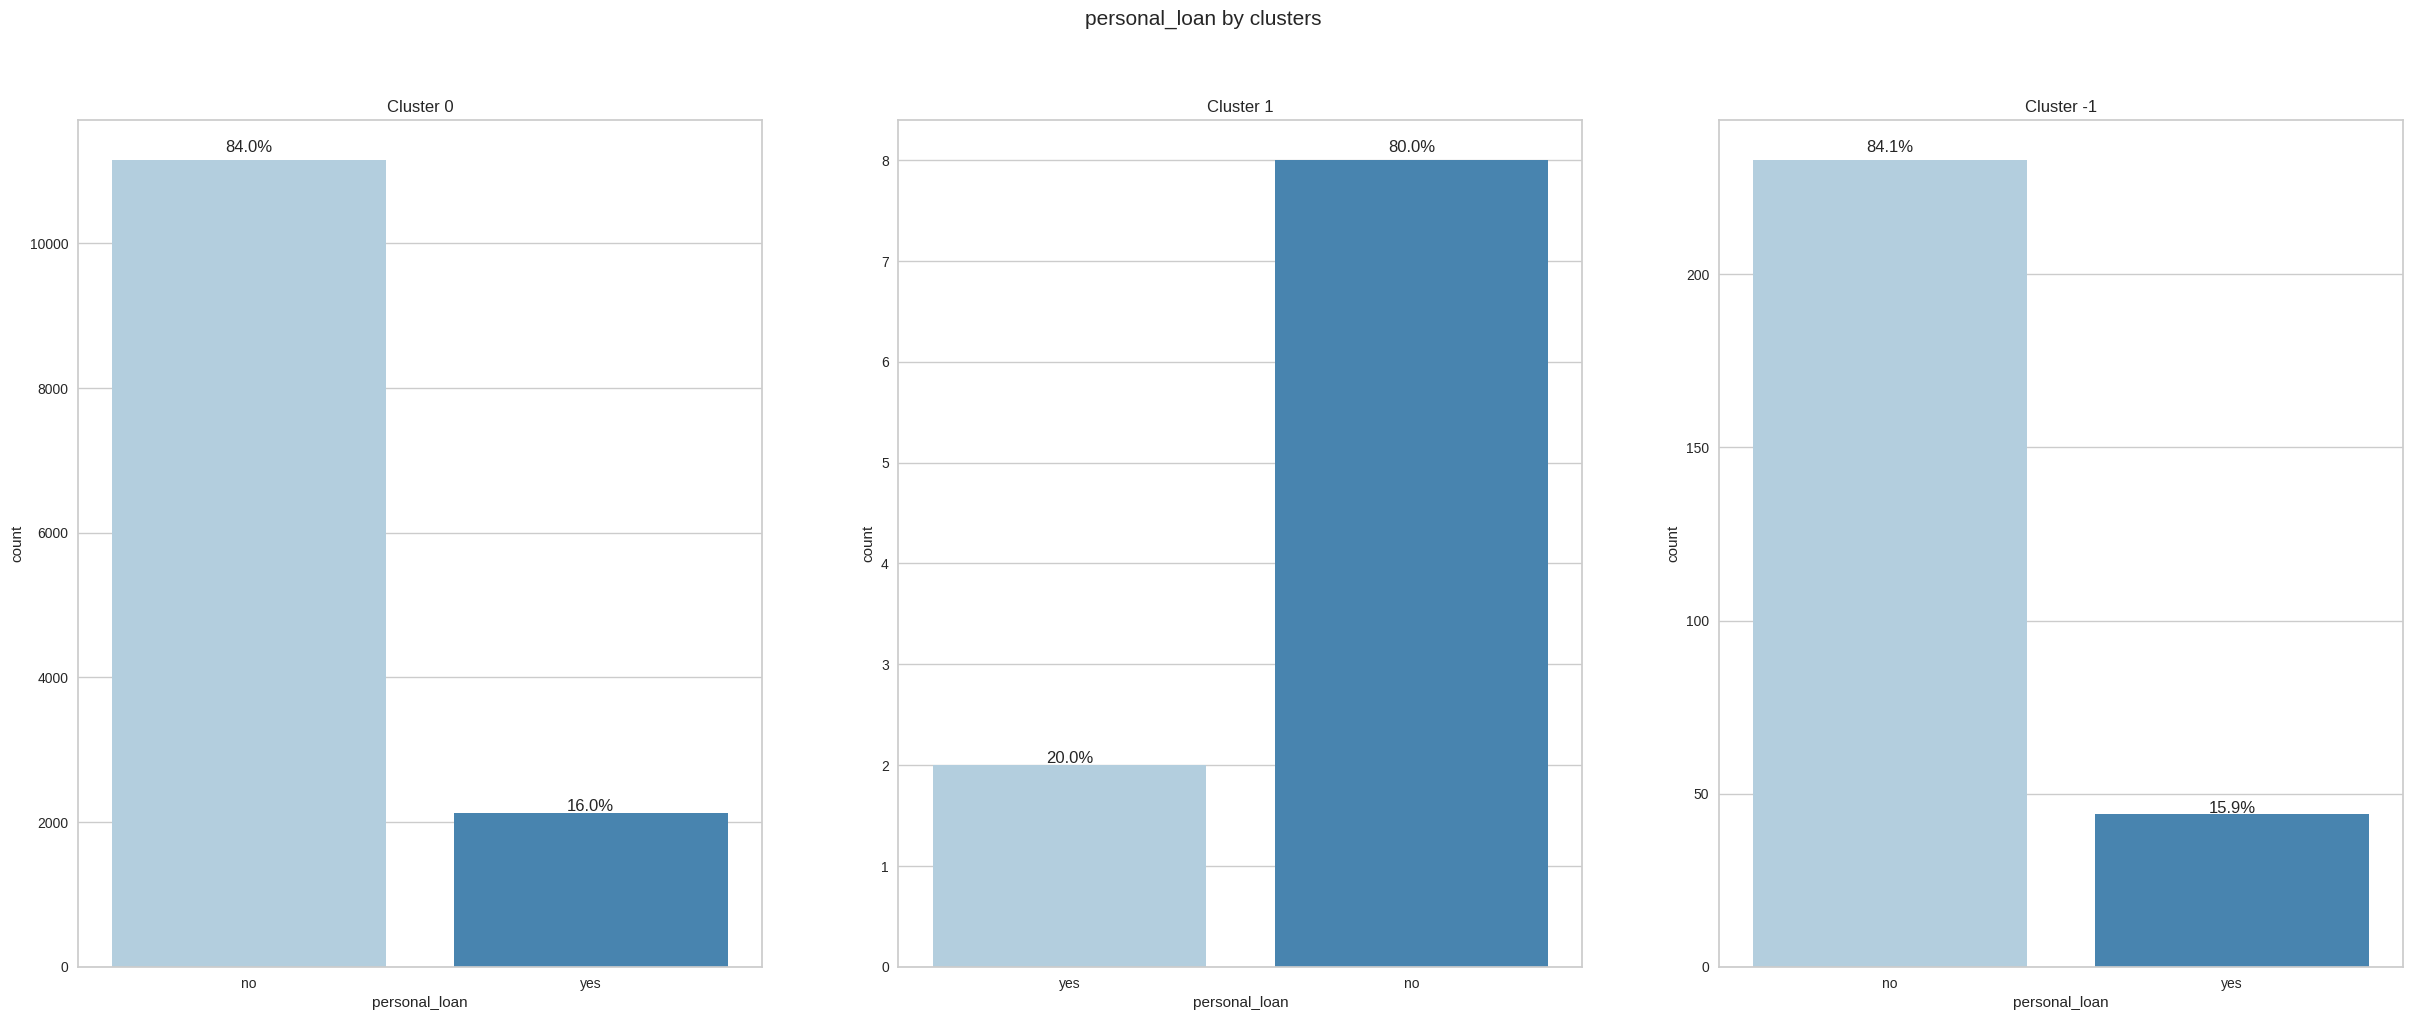

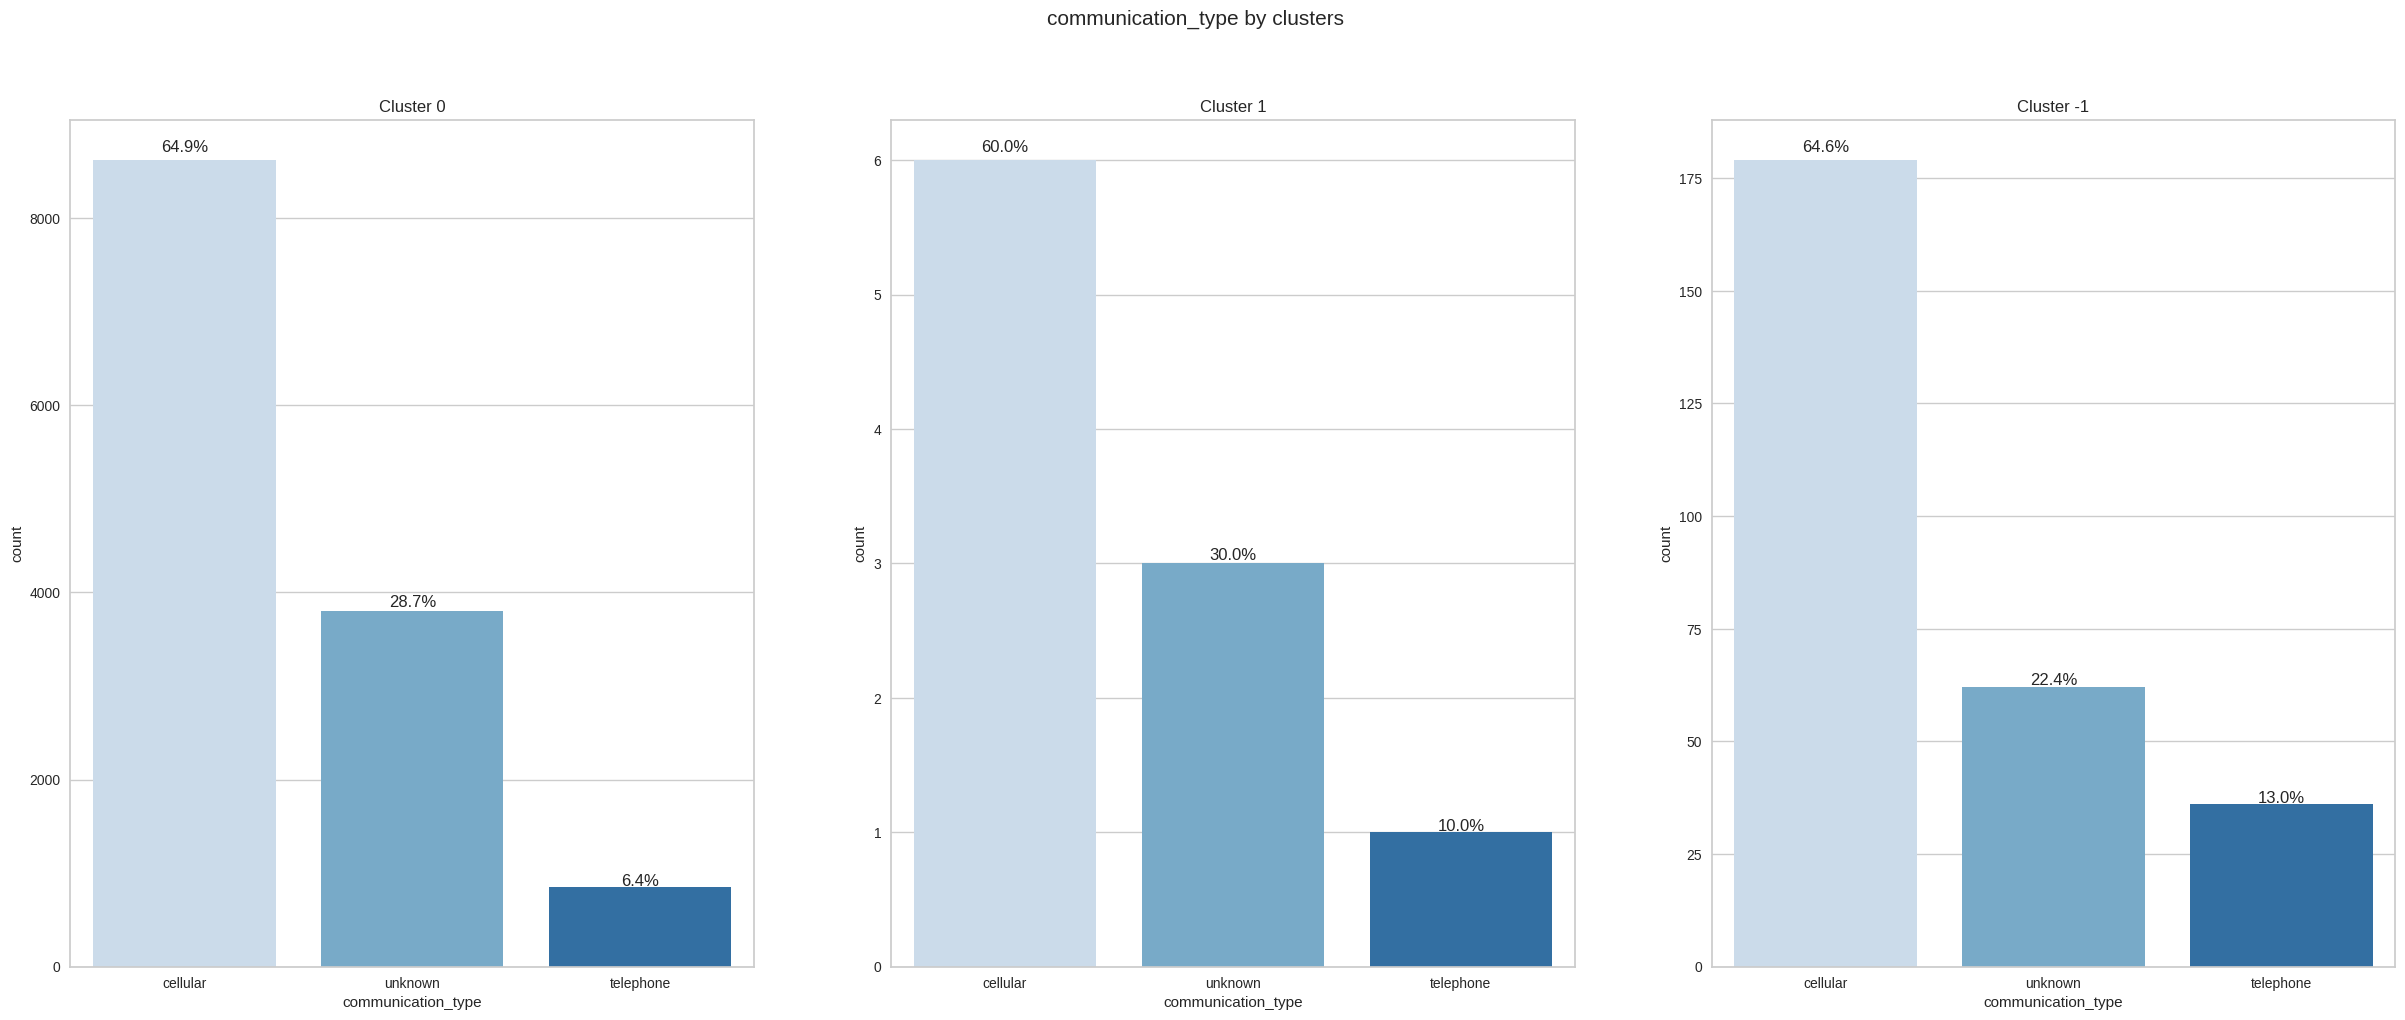

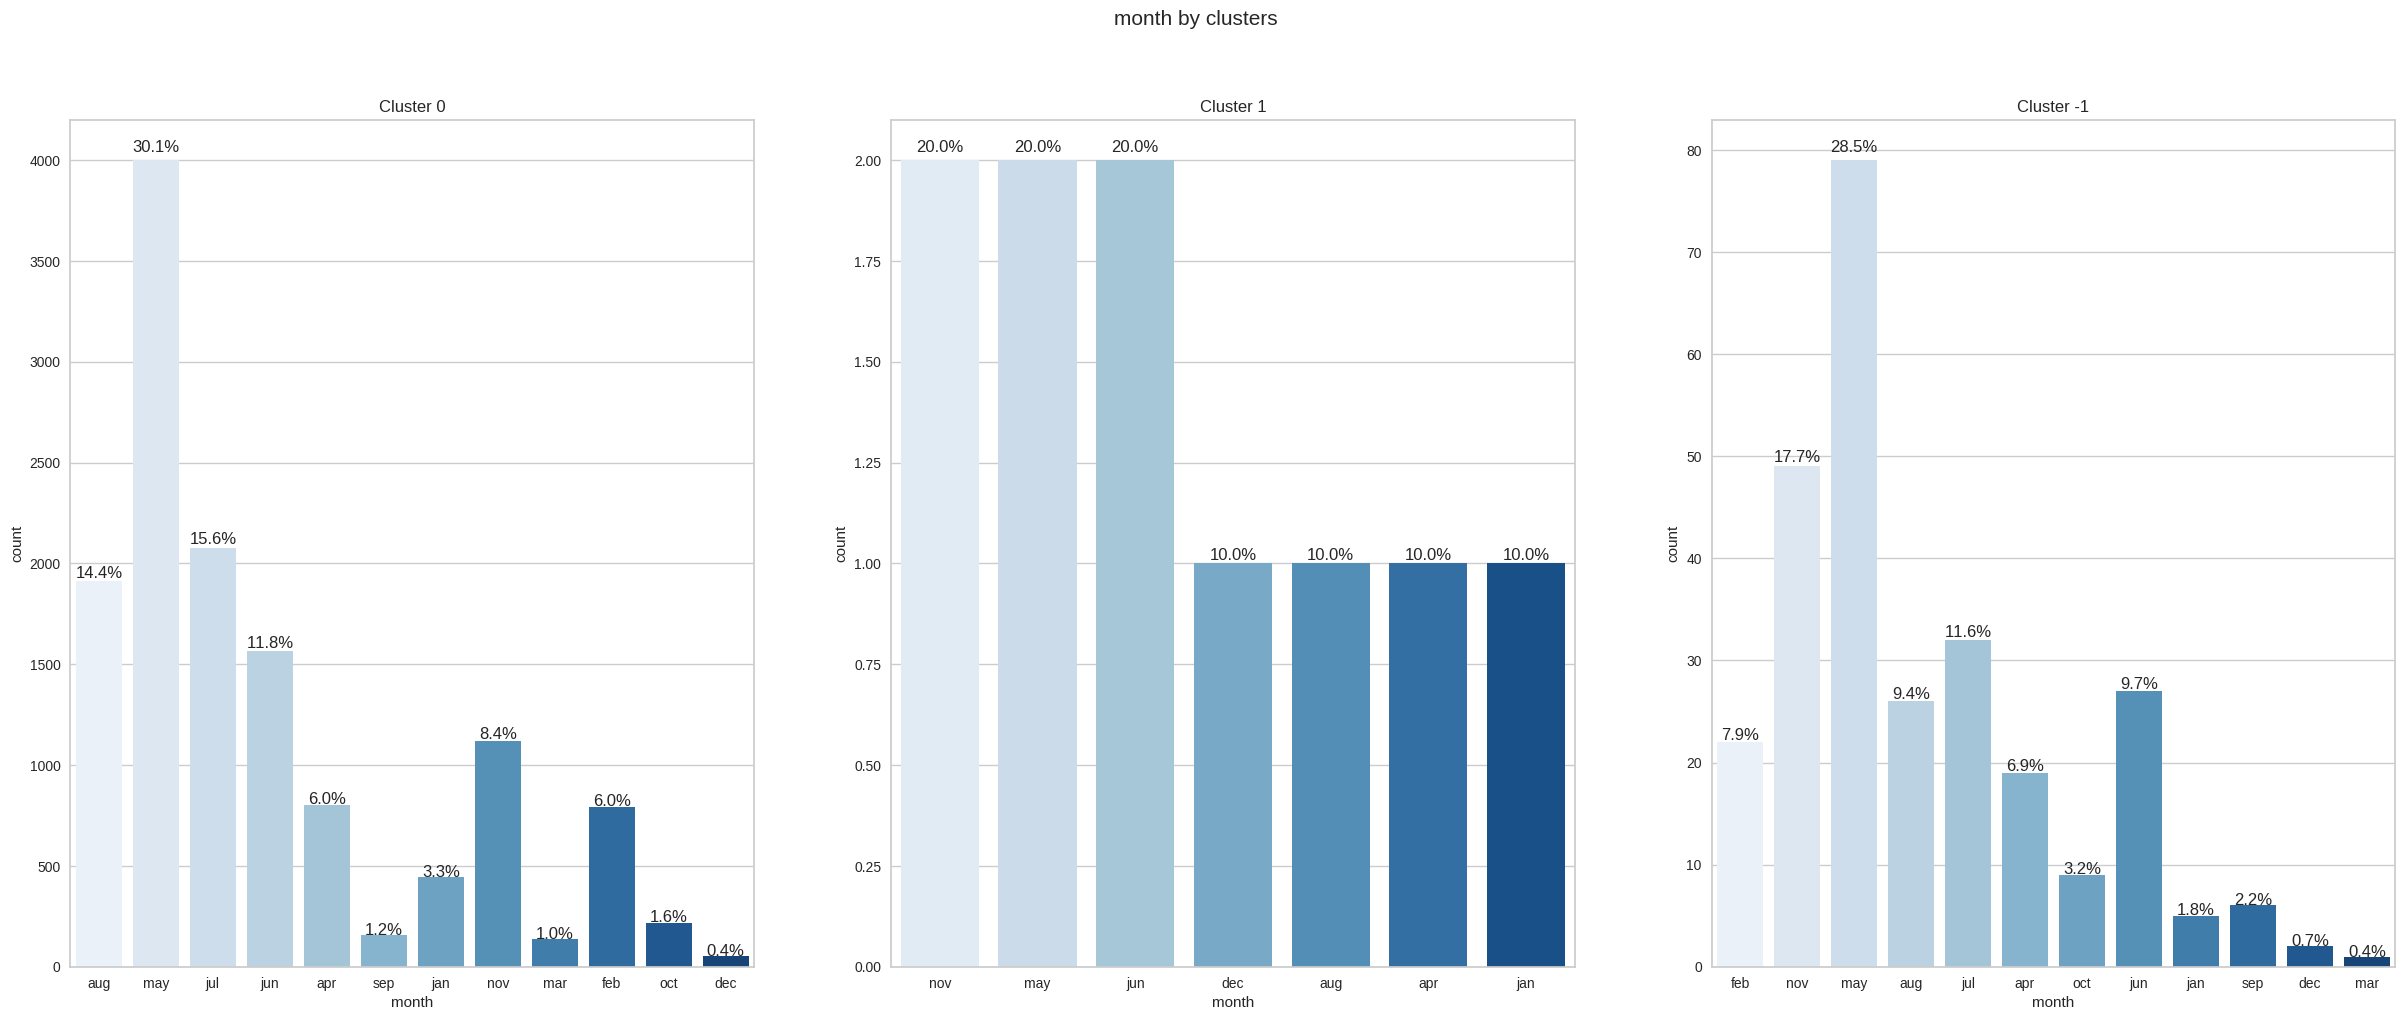

In [274]:
col = ['marital', 'education', 'job_type', 'default', 'housing_loan', 'personal_loan','communication_type','month']
for c in col :
    count_plot(col=c)

DBSCAN Clustering Algorithm has helped in generating 2 clusters.

Cluster 0 : represents those who are not likely to subscribe to Term Deposits

Cluster 1 : represents those who are more likely to subscribe to Term Deposits

Cluster -1 : represents the outliers

Cluster wise plot for both numerical and categorical features is as listed above.



**Those who are likely to subscribe to Term deposits:**
1. Maintain higher balances above 15k
2. Age between 35-40
3. Contacted mid of the month
4. Contact duration lasted more than 250 sec
5. Contacted more than 3.5 times in the current campaign
6. Majority are married
7. Those who had secondary and tertiary level of education
8. Holding management and blue collar jobs
9. Having no default in loan
10. Who opted for housing loan and not personal loan
11. Contacted in the months of Nov, June, May
12. Contacted via cellular communication

**Marketing Strategy:**

1. Key to a successful marketing campaign is to maintain a **regular connect** with
the customer.

2. For that as the data suggests : maintain regular contact with those clients who maintain higher balances.

3. Approach the blue collar and management professionals who are well educated with secondary or tertiary degrees and who have higher balances. Although their risk appetite is high, for liquidity we can suggest them to invest in Term deposits as well.

4. Those who have less debt, have more disposable income and hence approach those whose liability towards home loan and personal loan is less.

5. Bank should provide attractive interest rates inorder to attract the senior citizens. Retirement corpus for these clients will be on the higher side and they tend to invest in Term deposits and hence attractive interest rate will draw them in.

6. Contact around the 2nd week of the month and not wait till the month end when customers tend to pay any outstanding bills.

7. Approach customers in May, June and November as well, May and June being the mid year and November is before the winter holiday expenses.

8. Married folks are most likely earning double income (couple) and hence for liquidity and to inculcate savings Term Deposits are a good investment option.



